<a href="https://colab.research.google.com/github/chevy-67/DL-Architecture-Performance-Analysis/blob/main/Case_Study_CV_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maxsee/v6-6500")

print("Path to dataset files:", path)

100%|██████████| 10.5G/10.5G [02:00<00:00, 93.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/maxsee/v6-6500/versions/1


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.utils import image_dataset_from_directory
import os
from PIL import Image
import time

2025-08-05 18:23:03.709025: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-05 18:23:03.712776: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-05 18:23:03.761727: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-05 18:23:03.761767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-05 18:23:03.763354: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

**DATASET PREPROCESSING**

In [3]:
import os
from PIL import Image

input_dir1 = 'V5Minor100/Natural'
output_dir1 = 'V5Minor100/Natural_P'
input_dir2 = 'V5Minor100/Synthetic'
output_dir2 = 'V5Minor100/Synthetic_P'
target_size = (224, 224)

def resize(inp_dir, out_dir):
    os.makedirs(out_dir, exist_ok=True)

    image_files = [f for f in os.listdir(inp_dir) if f.lower().endswith(('.jpg', '.png'))]
    total = len(image_files)

    for i, filename in enumerate(image_files, start=1):
        img_path = os.path.join(inp_dir, filename)
        output_path = os.path.join(out_dir, filename)

        try:
            with Image.open(img_path) as img:
                resized_img = img.resize(target_size)
                resized_img.save(output_path)
                print(f'\rCompleted {i}/{total}', end='', flush=True)
        except Exception as e:
            print(f"\nFailed to process {filename}: {e}")

resize(input_dir1, output_dir1)
resize(input_dir2, output_dir2)

Completed 680/3275

/opt/intel/oneapi/intelpython/envs/tensorflow-gpu/lib/python3.11/site-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed 1023/3275
Failed to process 115pufn.jpg: cannot write mode RGBA as JPEG
Completed 1369/3275
Failed to process 5zs9c8.jpg: cannot identify image file '/home/23alr009/snap/snapd-desktop-integration/cv_case/DL-Architecture-Performance-Analysis/V5Minor100/Natural/5zs9c8.jpg'

Failed to process 115sokv.jpg: cannot write mode RGBA as JPEG

Failed to process 112xvt4.jpg: cannot identify image file '/home/23alr009/snap/snapd-desktop-integration/cv_case/DL-Architecture-Performance-Analysis/V5Minor100/Natural/112xvt4.jpg'
Completed 2402/3275

/opt/intel/oneapi/intelpython/envs/tensorflow-gpu/lib/python3.11/site-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (123221280 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed 2789/3275
Failed to process 113uncy.jpg: cannot write mode RGBA as JPEG

Done!

Failed to process 10henz5.jpg: cannot write mode RGBA as JPEG

Failed to process yv22zs.jpg: cannot write mode RGBA as JPEG
Completed 2475/3268
Failed to process zb9gtk.jpg: cannot write mode RGBA as JPEG

Done!
ed 3268/3268

In [ ]:
import shutil

shutil.rmtree(input_dir1)
shutil.rmtree(input_dir2)
print('Removed old data')

#**Loading the Dataset**

In [6]:
train_path = 'V5Minor100'

In [7]:
train = image_dataset_from_directory(
    train_path,
    labels='inferred',
    batch_size=32,
    image_size=(224, 224),
    seed=42,
    validation_split=0.2,
    subset="training"
)

validation = image_dataset_from_directory(
    train_path,
    labels='inferred',
    batch_size=32,
    image_size=(224, 224),
    seed=42,
    validation_split=0.2,
    subset="validation"
)

Found 6536 files belonging to 2 classes.
Using 5229 files for training.
Found 6536 files belonging to 2 classes.
Using 1307 files for validation.


##AlexNet Architecture

In [8]:
alexnet = Sequential([
    Conv2D(96, kernel_size=(11, 11), strides=5, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(3, 3), strides=2),

    Conv2D(256, kernel_size=(11, 11), strides=1,padding='same',activation='relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),
    BatchNormalization(),

    Conv2D(384, kernel_size=(3, 3), strides=1,padding='same' ,activation='relu'),
    BatchNormalization(),

    Conv2D(384, kernel_size=(3, 3), strides=1,padding='same' ,activation='relu'),
    BatchNormalization(),

    Conv2D(256, kernel_size=(3, 3), strides=1,padding='same' ,activation='relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),
    BatchNormalization(),

    Flatten(),
    Dropout(0.3),
    Dense(4096, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(4096, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [9]:
alexnet.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
alex_start_time = time.time()
alex_hist = alexnet.fit(train,validation_data=validation,epochs=10,batch_size=32)
alex_end_time = time.time()

In [12]:
alexnet_time = alex_end_time-alex_start_time
print(f"AlexNet Model Training Duration : {alexnet_time/60:.2f} Min")

AlexNet Model Training Duration : 9.82 Min


In [19]:
alexnet.save('models/alexnet.keras')

##EfficientNet Model

In [14]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,GlobalAvgPool2D

In [15]:
input_shape = (224,224,3)
effnet_base_model = EfficientNetB0(weights='imagenet',include_top=False,input_shape=input_shape)
effnet_base_model.trainable = False

In [16]:
inputs = Input(shape=input_shape)
x = effnet_base_model(inputs, training=False)
x = GlobalAvgPool2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

efficient_model = Model(inputs, outputs)

In [17]:
efficient_model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [18]:
effnet_start_time = time.time()
effnet_hist = efficient_model.fit(train,validation_data=validation,epochs=10,batch_size=32)
effnet_end_time = time.time()

Epoch 1/10


2025-08-05 18:42:13.725032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:13.734458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:13.742666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:13.746784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:13.747157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:13.750073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:13.751984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:13.763620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:13.767698: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 12:23 - loss: 0.6766 - accuracy: 0.5625

2025-08-05 18:42:14.091866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 42s - loss: 0.6464 - accuracy: 0.6094  

2025-08-05 18:42:14.354263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 34s - loss: 0.6969 - accuracy: 0.5573

2025-08-05 18:42:15.192908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:15.193444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:15.194008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 36s - loss: 0.6855 - accuracy: 0.5625

2025-08-05 18:42:15.733207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:15.734804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 37s - loss: 0.6860 - accuracy: 0.5556

2025-08-05 18:42:16.018058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 38s - loss: 0.6677 - accuracy: 0.5682

2025-08-05 18:42:16.609466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 39s - loss: 0.6670 - accuracy: 0.5871

2025-08-05 18:42:17.489489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 39s - loss: 0.6614 - accuracy: 0.5918

2025-08-05 18:42:18.076402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:18.084580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 39s - loss: 0.6587 - accuracy: 0.5993

2025-08-05 18:42:18.389255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 39s - loss: 0.6587 - accuracy: 0.6007

2025-08-05 18:42:18.688511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:18.689753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 39s - loss: 0.6450 - accuracy: 0.6161

2025-08-05 18:42:19.556619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 38s - loss: 0.6375 - accuracy: 0.6250

2025-08-05 18:42:19.846150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 38s - loss: 0.6382 - accuracy: 0.6264

2025-08-05 18:42:20.129612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:20.129773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 38s - loss: 0.6313 - accuracy: 0.6328

2025-08-05 18:42:20.442154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 38s - loss: 0.6262 - accuracy: 0.6400

2025-08-05 18:42:20.727214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 37s - loss: 0.6080 - accuracy: 0.6487

2025-08-05 18:42:21.884902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 37s - loss: 0.6044 - accuracy: 0.6521

2025-08-05 18:42:22.185846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 37s - loss: 0.6009 - accuracy: 0.6532

2025-08-05 18:42:22.481604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:22.482121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:22.482469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 36s - loss: 0.5915 - accuracy: 0.6600

2025-08-05 18:42:23.091577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 36s - loss: 0.5831 - accuracy: 0.6673

2025-08-05 18:42:23.375809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 36s - loss: 0.5810 - accuracy: 0.6696

2025-08-05 18:42:23.660591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 35s - loss: 0.5830 - accuracy: 0.6723

2025-08-05 18:42:24.228841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 34s - loss: 0.5742 - accuracy: 0.6805

2025-08-05 18:42:25.093106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 33s - loss: 0.5648 - accuracy: 0.6918

2025-08-05 18:42:26.249263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:26.250358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 33s - loss: 0.5652 - accuracy: 0.6909

2025-08-05 18:42:26.822985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.5669 - accuracy: 0.6969

2025-08-05 18:42:27.971207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.5658 - accuracy: 0.6979

2025-08-05 18:42:28.251018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:28.254362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 31s - loss: 0.5630 - accuracy: 0.7007

2025-08-05 18:42:28.539326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.5619 - accuracy: 0.7011

2025-08-05 18:42:28.827105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 30s - loss: 0.5604 - accuracy: 0.7028

2025-08-05 18:42:29.404257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.5570 - accuracy: 0.7061

2025-08-05 18:42:29.978912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.5540 - accuracy: 0.7074

2025-08-05 18:42:30.265003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:30.268384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.5547 - accuracy: 0.7083

2025-08-05 18:42:30.833664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.5535 - accuracy: 0.7100

2025-08-05 18:42:31.112774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 28s - loss: 0.5524 - accuracy: 0.7107

2025-08-05 18:42:31.394304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 27s - loss: 0.5456 - accuracy: 0.7159

2025-08-05 18:42:32.548261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.5429 - accuracy: 0.7169

2025-08-05 18:42:32.836327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.5396 - accuracy: 0.7192

2025-08-05 18:42:33.417157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 26s - loss: 0.5365 - accuracy: 0.7210

2025-08-05 18:42:33.707426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 25s - loss: 0.5347 - accuracy: 0.7205

2025-08-05 18:42:34.561118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.5343 - accuracy: 0.7213

2025-08-05 18:42:34.857480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.5342 - accuracy: 0.7208

2025-08-05 18:42:35.146554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:35.146754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:35.147315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 24s - loss: 0.5308 - accuracy: 0.7240

2025-08-05 18:42:35.721372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 23s - loss: 0.5269 - accuracy: 0.7266

2025-08-05 18:42:36.572548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.5290 - accuracy: 0.7253

2025-08-05 18:42:36.854989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 21s - loss: 0.5244 - accuracy: 0.7288

2025-08-05 18:42:38.574605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:38.576542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.5225 - accuracy: 0.7305

2025-08-05 18:42:38.858190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:38.859772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5232 - accuracy: 0.7302

2025-08-05 18:42:39.422339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:39.422510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.5233 - accuracy: 0.7296

2025-08-05 18:42:39.998245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.5200 - accuracy: 0.7316

2025-08-05 18:42:40.855036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.5193 - accuracy: 0.7321

2025-08-05 18:42:41.149802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5183 - accuracy: 0.7329

2025-08-05 18:42:41.455236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.5184 - accuracy: 0.7325

2025-08-05 18:42:41.741627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.5155 - accuracy: 0.7344

2025-08-05 18:42:42.306938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:42.307159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.5132 - accuracy: 0.7356

2025-08-05 18:42:42.886850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.5113 - accuracy: 0.7373

2025-08-05 18:42:43.167046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.5109 - accuracy: 0.7372

2025-08-05 18:42:43.751054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:43.759827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 15s - loss: 0.5104 - accuracy: 0.7384

2025-08-05 18:42:44.615662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5098 - accuracy: 0.7393

2025-08-05 18:42:45.490464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:45.495727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.5093 - accuracy: 0.7398

2025-08-05 18:42:46.048558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.5079 - accuracy: 0.7419

2025-08-05 18:42:46.911374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:46.911497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:46.914552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5078 - accuracy: 0.7423

2025-08-05 18:42:47.198757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 11s - loss: 0.5066 - accuracy: 0.7436

2025-08-05 18:42:48.616375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.5041 - accuracy: 0.7460

2025-08-05 18:42:49.778583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5024 - accuracy: 0.7473

2025-08-05 18:42:50.348815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5044 - accuracy: 0.7464 

2025-08-05 18:42:51.206980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:51.207385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:51.207730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:51.214795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5027 - accuracy: 0.7481

2025-08-05 18:42:52.063018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:52.063154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5020 - accuracy: 0.7493

2025-08-05 18:42:52.357036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:52.357957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5003 - accuracy: 0.7505

2025-08-05 18:42:53.225554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5013 - accuracy: 0.7500

2025-08-05 18:42:53.514419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.4999 - accuracy: 0.7509

2025-08-05 18:42:53.800391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.4998 - accuracy: 0.7516

2025-08-05 18:42:54.097151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.4978 - accuracy: 0.7528

2025-08-05 18:42:54.662940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:54.663071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:54.665953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.4976 - accuracy: 0.7528

2025-08-05 18:42:54.944089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.4965 - accuracy: 0.7551

2025-08-05 18:42:55.513200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.4961 - accuracy: 0.7555

2025-08-05 18:42:55.796830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.4955 - accuracy: 0.7557

2025-08-05 18:42:56.078819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.4937 - accuracy: 0.7577

2025-08-05 18:42:56.944138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:56.944318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:56.946736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:56.947802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.4924 - accuracy: 0.7586

2025-08-05 18:42:57.235839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:57.235951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:42:57.238226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.4881 - accuracy: 0.7615

2025-08-05 18:43:02.216822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:02.224217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:02.232894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:02.238760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:02.250273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:02.250375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:02.251190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:02.262947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:02.273051: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 64s 366ms/step - loss: 0.4881 - accuracy: 0.7615 - val_loss: 0.4336 - val_accuracy: 0.7850
Epoch 2/10


2025-08-05 18:43:13.830377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:13.840456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:13.850542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:13.852040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:13.852152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:13.858026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:13.858099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:13.871139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:13.877014: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:02 - loss: 0.2890 - accuracy: 0.8750

2025-08-05 18:43:14.186180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 45s - loss: 0.3189 - accuracy: 0.8750 

2025-08-05 18:43:14.475502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.3864 - accuracy: 0.8021

2025-08-05 18:43:15.625307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:15.625702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:15.628573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.4155 - accuracy: 0.7852

2025-08-05 18:43:16.195451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:16.197234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.4199 - accuracy: 0.7847

2025-08-05 18:43:16.479784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 0.4055 - accuracy: 0.7955

2025-08-05 18:43:17.051551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.4240 - accuracy: 0.7924

2025-08-05 18:43:17.921107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.4387 - accuracy: 0.7852

2025-08-05 18:43:18.496904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:18.499365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.4276 - accuracy: 0.7941

2025-08-05 18:43:18.778256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 41s - loss: 0.4301 - accuracy: 0.7951

2025-08-05 18:43:19.072946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:19.073052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.4270 - accuracy: 0.8021

2025-08-05 18:43:19.935643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.4228 - accuracy: 0.8040

2025-08-05 18:43:20.231595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.4214 - accuracy: 0.8057

2025-08-05 18:43:20.521431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:20.524016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.4227 - accuracy: 0.8060

2025-08-05 18:43:20.806239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.4233 - accuracy: 0.8037

2025-08-05 18:43:21.097894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.4180 - accuracy: 0.8093

2025-08-05 18:43:22.249138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.4124 - accuracy: 0.8146

2025-08-05 18:43:22.543044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.4083 - accuracy: 0.8185

2025-08-05 18:43:22.834302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:22.834440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:22.835194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.4067 - accuracy: 0.8182

2025-08-05 18:43:23.410024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.4038 - accuracy: 0.8208

2025-08-05 18:43:23.695649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.4074 - accuracy: 0.8188

2025-08-05 18:43:23.980429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.4085 - accuracy: 0.8167

2025-08-05 18:43:24.554662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.4040 - accuracy: 0.8188

2025-08-05 18:43:25.439899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.4000 - accuracy: 0.8253

2025-08-05 18:43:26.578567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:26.579741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.4037 - accuracy: 0.8220

2025-08-05 18:43:27.165879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.3996 - accuracy: 0.8231

2025-08-05 18:43:28.301863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.3991 - accuracy: 0.8229

2025-08-05 18:43:28.588089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:28.590928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.3991 - accuracy: 0.8239

2025-08-05 18:43:28.879553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.4001 - accuracy: 0.8225

2025-08-05 18:43:29.170751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.3969 - accuracy: 0.8250

2025-08-05 18:43:29.749376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.4002 - accuracy: 0.8229

2025-08-05 18:43:30.334895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.4010 - accuracy: 0.8211

2025-08-05 18:43:30.605866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:30.607551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.4008 - accuracy: 0.8203

2025-08-05 18:43:31.182284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.4030 - accuracy: 0.8192

2025-08-05 18:43:31.474398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.4012 - accuracy: 0.8201

2025-08-05 18:43:31.763184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.4041 - accuracy: 0.8191

2025-08-05 18:43:32.913854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.4033 - accuracy: 0.8186

2025-08-05 18:43:33.204217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.4024 - accuracy: 0.8197

2025-08-05 18:43:33.771966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.4034 - accuracy: 0.8183

2025-08-05 18:43:34.057189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.4005 - accuracy: 0.8193

2025-08-05 18:43:34.923230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.4008 - accuracy: 0.8188

2025-08-05 18:43:35.210515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.4022 - accuracy: 0.8167

2025-08-05 18:43:35.495952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:35.498505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:35.498811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.4000 - accuracy: 0.8182

2025-08-05 18:43:36.060311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.3984 - accuracy: 0.8180

2025-08-05 18:43:36.937283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.3983 - accuracy: 0.8183

2025-08-05 18:43:37.224165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.3979 - accuracy: 0.8200

2025-08-05 18:43:38.931181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:38.933752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.3962 - accuracy: 0.8210

2025-08-05 18:43:39.206668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:39.209731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.3959 - accuracy: 0.8212

2025-08-05 18:43:39.769891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:39.771072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.3982 - accuracy: 0.8193

2025-08-05 18:43:40.339083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.3961 - accuracy: 0.8211

2025-08-05 18:43:41.190645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.3968 - accuracy: 0.8206

2025-08-05 18:43:41.480312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.3950 - accuracy: 0.8215

2025-08-05 18:43:41.778343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.3944 - accuracy: 0.8224

2025-08-05 18:43:42.060389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.3935 - accuracy: 0.8228

2025-08-05 18:43:42.626706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:42.629169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.3911 - accuracy: 0.8238

2025-08-05 18:43:43.209487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.3900 - accuracy: 0.8246

2025-08-05 18:43:43.474777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.3912 - accuracy: 0.8241

2025-08-05 18:43:44.042484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:44.050453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.3899 - accuracy: 0.8249

2025-08-05 18:43:44.892205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.3910 - accuracy: 0.8235

2025-08-05 18:43:45.741925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:45.748935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.3906 - accuracy: 0.8236

2025-08-05 18:43:46.309685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.3902 - accuracy: 0.8249

2025-08-05 18:43:47.176432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:47.176545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:47.179736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.3903 - accuracy: 0.8253

2025-08-05 18:43:47.454027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.3908 - accuracy: 0.8230

2025-08-05 18:43:48.875245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.3926 - accuracy: 0.8227

2025-08-05 18:43:50.025626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.3933 - accuracy: 0.8225

2025-08-05 18:43:50.591667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.3922 - accuracy: 0.8225 

2025-08-05 18:43:51.437757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:51.438738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:51.441009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:51.445959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.3909 - accuracy: 0.8230

2025-08-05 18:43:52.299335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:52.299794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.3908 - accuracy: 0.8227

2025-08-05 18:43:52.586439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:52.590073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.3911 - accuracy: 0.8227

2025-08-05 18:43:53.428383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.3919 - accuracy: 0.8219

2025-08-05 18:43:53.706866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.3906 - accuracy: 0.8228

2025-08-05 18:43:53.988869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.3909 - accuracy: 0.8225

2025-08-05 18:43:54.279446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.3905 - accuracy: 0.8230

2025-08-05 18:43:54.854612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:54.856764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:54.857434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.3908 - accuracy: 0.8225

2025-08-05 18:43:55.149035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.3911 - accuracy: 0.8221

2025-08-05 18:43:55.714586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.3922 - accuracy: 0.8214

2025-08-05 18:43:55.996046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.3913 - accuracy: 0.8216

2025-08-05 18:43:56.300190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.3912 - accuracy: 0.8224

2025-08-05 18:43:57.157402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:57.158647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:57.159092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:57.161162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.3912 - accuracy: 0.8226

2025-08-05 18:43:57.447158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:57.447953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:43:57.449021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.3846 - accuracy: 0.8267

2025-08-05 18:44:00.849925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:00.857359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:00.869745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:00.876391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:00.886456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:00.886965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:00.889250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:00.902654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:00.910794: W tensorflow/core/lib/png/png_io.cc:88] PNG 

151/164 [==========================>...] - ETA: 3s - loss: 0.3419 - accuracy: 0.8471

2025-08-05 18:44:55.805943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:55.807116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:55.807419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:55.809230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.3413 - accuracy: 0.8475

2025-08-05 18:44:56.087897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:56.088111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:56.092754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.3386 - accuracy: 0.8495

2025-08-05 18:44:59.513091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:59.518871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:59.531549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:59.538492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:59.547575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:59.547796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:59.551615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:59.564232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:44:59.572870: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 358ms/step - loss: 0.3386 - accuracy: 0.8495 - val_loss: 0.4144 - val_accuracy: 0.8049
Epoch 4/10


2025-08-05 18:45:11.090079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:11.099873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:11.107900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:11.111660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:11.111892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:11.117283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:11.118437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:11.132475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:11.138052: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:02 - loss: 0.2594 - accuracy: 0.8750

2025-08-05 18:45:11.447042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 45s - loss: 0.3387 - accuracy: 0.8438 

2025-08-05 18:45:11.730630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 44s - loss: 0.3503 - accuracy: 0.8281

2025-08-05 18:45:12.863645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:12.863800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:12.865204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.3466 - accuracy: 0.8320

2025-08-05 18:45:13.438791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:13.438935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.3366 - accuracy: 0.8299

2025-08-05 18:45:13.727968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 0.3399 - accuracy: 0.8295

2025-08-05 18:45:14.303049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 42s - loss: 0.3482 - accuracy: 0.8259

2025-08-05 18:45:15.172765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.3423 - accuracy: 0.8262

2025-08-05 18:45:15.739263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:15.740196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.3559 - accuracy: 0.8217

2025-08-05 18:45:16.019407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 41s - loss: 0.3588 - accuracy: 0.8160

2025-08-05 18:45:16.307676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:16.311309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.3696 - accuracy: 0.8155

2025-08-05 18:45:17.192713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.3722 - accuracy: 0.8168

2025-08-05 18:45:17.476482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.3658 - accuracy: 0.8234

2025-08-05 18:45:17.770448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:17.770636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.3660 - accuracy: 0.8255

2025-08-05 18:45:18.060439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 0.3619 - accuracy: 0.8288

2025-08-05 18:45:18.346300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.3559 - accuracy: 0.8330

2025-08-05 18:45:19.493328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.3550 - accuracy: 0.8323

2025-08-05 18:45:19.778811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.3522 - accuracy: 0.8357

2025-08-05 18:45:20.057386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:20.058538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:20.060669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.3531 - accuracy: 0.8333

2025-08-05 18:45:20.637086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.3522 - accuracy: 0.8336

2025-08-05 18:45:20.921705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.3502 - accuracy: 0.8357

2025-08-05 18:45:21.221353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.3498 - accuracy: 0.8328

2025-08-05 18:45:21.795794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.3487 - accuracy: 0.8336

2025-08-05 18:45:22.661531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.3471 - accuracy: 0.8324

2025-08-05 18:45:23.792039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:23.793900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 33s - loss: 0.3450 - accuracy: 0.8342

2025-08-05 18:45:24.370218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.3414 - accuracy: 0.8375

2025-08-05 18:45:25.543416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.3396 - accuracy: 0.8388

2025-08-05 18:45:25.830413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:25.835023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.3436 - accuracy: 0.8365

2025-08-05 18:45:26.132757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.3423 - accuracy: 0.8379

2025-08-05 18:45:26.425519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.3439 - accuracy: 0.8386

2025-08-05 18:45:26.991339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.3443 - accuracy: 0.8388

2025-08-05 18:45:27.568598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.3436 - accuracy: 0.8394

2025-08-05 18:45:27.844081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:27.846888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.3393 - accuracy: 0.8422

2025-08-05 18:45:28.417345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.3361 - accuracy: 0.8443

2025-08-05 18:45:28.696596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.3354 - accuracy: 0.8453

2025-08-05 18:45:28.985064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.3337 - accuracy: 0.8475

2025-08-05 18:45:30.121797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.3341 - accuracy: 0.8465

2025-08-05 18:45:30.405232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.3352 - accuracy: 0.8460

2025-08-05 18:45:30.969191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 26s - loss: 0.3332 - accuracy: 0.8478

2025-08-05 18:45:31.251890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.3285 - accuracy: 0.8497

2025-08-05 18:45:32.100987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.3276 - accuracy: 0.8505

2025-08-05 18:45:32.390033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.3262 - accuracy: 0.8512

2025-08-05 18:45:32.681445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:32.682407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:32.682954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 24s - loss: 0.3251 - accuracy: 0.8527

2025-08-05 18:45:33.260252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.3264 - accuracy: 0.8508

2025-08-05 18:45:34.122514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.3253 - accuracy: 0.8507

2025-08-05 18:45:34.416200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.3251 - accuracy: 0.8499

2025-08-05 18:45:36.128845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:36.131875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.3253 - accuracy: 0.8494

2025-08-05 18:45:36.426474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:36.429178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.3243 - accuracy: 0.8493

2025-08-05 18:45:37.000390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:37.000978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.3220 - accuracy: 0.8516

2025-08-05 18:45:37.589087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.3193 - accuracy: 0.8526

2025-08-05 18:45:38.433424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.3171 - accuracy: 0.8542

2025-08-05 18:45:38.726962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.3164 - accuracy: 0.8547

2025-08-05 18:45:39.017073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.3163 - accuracy: 0.8540

2025-08-05 18:45:39.299519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.3150 - accuracy: 0.8550

2025-08-05 18:45:39.854356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:39.856879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.3141 - accuracy: 0.8557

2025-08-05 18:45:40.425744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.3138 - accuracy: 0.8565

2025-08-05 18:45:40.710853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.3162 - accuracy: 0.8560

2025-08-05 18:45:41.283747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:41.292062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.3148 - accuracy: 0.8556

2025-08-05 18:45:42.143648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.3182 - accuracy: 0.8547

2025-08-05 18:45:43.017044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:43.025742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.3170 - accuracy: 0.8554

2025-08-05 18:45:43.569852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.3176 - accuracy: 0.8556

2025-08-05 18:45:44.421653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:44.421794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:44.421934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.3181 - accuracy: 0.8558

2025-08-05 18:45:44.708343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.3171 - accuracy: 0.8555

2025-08-05 18:45:46.163657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.3164 - accuracy: 0.8557

2025-08-05 18:45:47.310213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.3166 - accuracy: 0.8562

2025-08-05 18:45:47.871063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.3171 - accuracy: 0.8566 

2025-08-05 18:45:48.722035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:48.722433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:48.722824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:48.727396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.3169 - accuracy: 0.8566

2025-08-05 18:45:49.580761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:49.580867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.3170 - accuracy: 0.8567

2025-08-05 18:45:49.864848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:49.867389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.3172 - accuracy: 0.8567

2025-08-05 18:45:50.718122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.3170 - accuracy: 0.8566

2025-08-05 18:45:50.993036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.3166 - accuracy: 0.8569

2025-08-05 18:45:51.280860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.3159 - accuracy: 0.8575

2025-08-05 18:45:51.570548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.3151 - accuracy: 0.8577

2025-08-05 18:45:52.126321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:52.126611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:52.127433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.3138 - accuracy: 0.8585

2025-08-05 18:45:52.419149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.3134 - accuracy: 0.8587

2025-08-05 18:45:52.995247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.3132 - accuracy: 0.8586

2025-08-05 18:45:53.279045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.3132 - accuracy: 0.8583

2025-08-05 18:45:53.571280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.3121 - accuracy: 0.8593

2025-08-05 18:45:54.422649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:54.425029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:54.425303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:54.425925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.3118 - accuracy: 0.8598

2025-08-05 18:45:54.712688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:54.712813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:54.714468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.3085 - accuracy: 0.8619

2025-08-05 18:45:58.107123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:58.112580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:58.124599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:58.131395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:58.141652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:58.141874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:58.144478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:58.153959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:45:58.166467: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 357ms/step - loss: 0.3085 - accuracy: 0.8619 - val_loss: 0.4112 - val_accuracy: 0.8049
Epoch 5/10


2025-08-05 18:46:09.624030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:09.633844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:09.641779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:09.646606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:09.646812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:09.649177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:09.652889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:09.664833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:09.670423: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:03 - loss: 0.2101 - accuracy: 0.9375

2025-08-05 18:46:09.981425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 46s - loss: 0.3110 - accuracy: 0.8906 

2025-08-05 18:46:10.270509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.2919 - accuracy: 0.9062

2025-08-05 18:46:11.411340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:11.413781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:11.414132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.3108 - accuracy: 0.8867

2025-08-05 18:46:11.974805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:11.974966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.3178 - accuracy: 0.8819

2025-08-05 18:46:12.254752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 0.2973 - accuracy: 0.8864

2025-08-05 18:46:12.837314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.3027 - accuracy: 0.8772

2025-08-05 18:46:13.721005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.3115 - accuracy: 0.8750

2025-08-05 18:46:14.296163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:14.299831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.3090 - accuracy: 0.8787

2025-08-05 18:46:14.593967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.3018 - accuracy: 0.8819

2025-08-05 18:46:14.881598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:14.885008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.3033 - accuracy: 0.8810

2025-08-05 18:46:15.740224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.2963 - accuracy: 0.8835

2025-08-05 18:46:16.018066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.2948 - accuracy: 0.8859

2025-08-05 18:46:16.305966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:16.307101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.2975 - accuracy: 0.8841

2025-08-05 18:46:16.599358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 0.3051 - accuracy: 0.8800

2025-08-05 18:46:16.883076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.2937 - accuracy: 0.8815

2025-08-05 18:46:18.037919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.2920 - accuracy: 0.8823

2025-08-05 18:46:18.325142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.2909 - accuracy: 0.8831

2025-08-05 18:46:18.621261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:18.622626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:18.622728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.2874 - accuracy: 0.8816

2025-08-05 18:46:19.205505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.2860 - accuracy: 0.8814

2025-08-05 18:46:19.501033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.2930 - accuracy: 0.8768

2025-08-05 18:46:19.788311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.2959 - accuracy: 0.8733

2025-08-05 18:46:20.362205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.2912 - accuracy: 0.8766

2025-08-05 18:46:21.232729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.2892 - accuracy: 0.8786

2025-08-05 18:46:22.388747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:22.389094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.2876 - accuracy: 0.8784

2025-08-05 18:46:22.955479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.2936 - accuracy: 0.8756

2025-08-05 18:46:24.103219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.2920 - accuracy: 0.8775

2025-08-05 18:46:24.392248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:24.393663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.2914 - accuracy: 0.8780

2025-08-05 18:46:24.676846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.2884 - accuracy: 0.8797

2025-08-05 18:46:24.975649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.2894 - accuracy: 0.8795

2025-08-05 18:46:25.555771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.2868 - accuracy: 0.8816

2025-08-05 18:46:26.145483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.2857 - accuracy: 0.8825

2025-08-05 18:46:26.424317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:26.427416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.2844 - accuracy: 0.8823

2025-08-05 18:46:26.995791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.2834 - accuracy: 0.8832

2025-08-05 18:46:27.277939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.2834 - accuracy: 0.8836

2025-08-05 18:46:27.551032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.2815 - accuracy: 0.8849

2025-08-05 18:46:28.696799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.2824 - accuracy: 0.8843

2025-08-05 18:46:28.987849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.2813 - accuracy: 0.8845

2025-08-05 18:46:29.566050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.2822 - accuracy: 0.8844

2025-08-05 18:46:29.859814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.2803 - accuracy: 0.8853

2025-08-05 18:46:30.710959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.2778 - accuracy: 0.8868

2025-08-05 18:46:30.998777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.2774 - accuracy: 0.8863

2025-08-05 18:46:31.278940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:31.279677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:31.279930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.2770 - accuracy: 0.8856

2025-08-05 18:46:31.841220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.2745 - accuracy: 0.8871

2025-08-05 18:46:32.702027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.2747 - accuracy: 0.8870

2025-08-05 18:46:32.995796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.2718 - accuracy: 0.8879

2025-08-05 18:46:34.712551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:34.712714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.2724 - accuracy: 0.8878

2025-08-05 18:46:35.000136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:35.001672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.2709 - accuracy: 0.8889

2025-08-05 18:46:35.571654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:35.573340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.2691 - accuracy: 0.8886

2025-08-05 18:46:36.143851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.2712 - accuracy: 0.8882

2025-08-05 18:46:37.001333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.2704 - accuracy: 0.8883

2025-08-05 18:46:37.296519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.2691 - accuracy: 0.8892

2025-08-05 18:46:37.591570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.2688 - accuracy: 0.8893

2025-08-05 18:46:37.875833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.2673 - accuracy: 0.8897

2025-08-05 18:46:38.444510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:38.446940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.2676 - accuracy: 0.8891

2025-08-05 18:46:39.033689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.2682 - accuracy: 0.8880

2025-08-05 18:46:39.315780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.2689 - accuracy: 0.8875

2025-08-05 18:46:39.887601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:39.895664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.2703 - accuracy: 0.8872

2025-08-05 18:46:40.753775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.2711 - accuracy: 0.8865

2025-08-05 18:46:41.621458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:41.627925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.2713 - accuracy: 0.8861

2025-08-05 18:46:42.202482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.2723 - accuracy: 0.8863

2025-08-05 18:46:43.059111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:43.059668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:43.061153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.2723 - accuracy: 0.8862

2025-08-05 18:46:43.338534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.2724 - accuracy: 0.8858

2025-08-05 18:46:44.744122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.2711 - accuracy: 0.8872

2025-08-05 18:46:45.886411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.2713 - accuracy: 0.8867

2025-08-05 18:46:46.464204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.2701 - accuracy: 0.8872 

2025-08-05 18:46:47.315064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:47.317254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:47.317766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:47.324342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.2711 - accuracy: 0.8869

2025-08-05 18:46:48.161400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:48.163770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.2704 - accuracy: 0.8875

2025-08-05 18:46:48.444315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:48.448283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.2706 - accuracy: 0.8872

2025-08-05 18:46:49.324215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.2704 - accuracy: 0.8876

2025-08-05 18:46:49.619906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.2703 - accuracy: 0.8877

2025-08-05 18:46:49.903860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.2703 - accuracy: 0.8879

2025-08-05 18:46:50.201599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.2689 - accuracy: 0.8885

2025-08-05 18:46:50.779233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:50.779344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:50.779555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.2687 - accuracy: 0.8889

2025-08-05 18:46:51.061730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.2672 - accuracy: 0.8898

2025-08-05 18:46:51.627829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.2671 - accuracy: 0.8892

2025-08-05 18:46:51.911516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.2673 - accuracy: 0.8889

2025-08-05 18:46:52.194911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.2682 - accuracy: 0.8885

2025-08-05 18:46:53.056677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:53.057270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:53.057465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:53.058431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.2677 - accuracy: 0.8886

2025-08-05 18:46:53.349364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:53.349488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:53.350324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.2652 - accuracy: 0.8902

2025-08-05 18:46:56.764246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:56.771370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:56.783059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:56.788551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:56.799238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:56.799685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:56.800336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:56.811271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:46:56.819752: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 357ms/step - loss: 0.2652 - accuracy: 0.8902 - val_loss: 0.4188 - val_accuracy: 0.8072
Epoch 6/10


2025-08-05 18:47:08.275973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:08.285492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:08.292904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:08.297824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:08.297987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:08.303463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:08.303677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:08.314676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:08.320387: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:02 - loss: 0.3849 - accuracy: 0.8438

2025-08-05 18:47:08.626468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 46s - loss: 0.3441 - accuracy: 0.8750 

2025-08-05 18:47:08.919267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.2689 - accuracy: 0.8958

2025-08-05 18:47:10.067911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:10.068021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:10.068523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.2634 - accuracy: 0.8945

2025-08-05 18:47:10.634433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:10.634601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.2683 - accuracy: 0.8924

2025-08-05 18:47:10.926346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 0.2885 - accuracy: 0.8835

2025-08-05 18:47:11.493177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 42s - loss: 0.3006 - accuracy: 0.8728

2025-08-05 18:47:12.357492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.2897 - accuracy: 0.8789

2025-08-05 18:47:12.931634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:12.935111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.2923 - accuracy: 0.8787

2025-08-05 18:47:13.214200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 41s - loss: 0.2893 - accuracy: 0.8767

2025-08-05 18:47:13.502552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:13.503174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.2821 - accuracy: 0.8795

2025-08-05 18:47:14.369493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.2846 - accuracy: 0.8764

2025-08-05 18:47:14.654552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.2859 - accuracy: 0.8750

2025-08-05 18:47:14.936614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:14.939353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.2835 - accuracy: 0.8776

2025-08-05 18:47:15.230422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 0.2821 - accuracy: 0.8775

2025-08-05 18:47:15.520539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.2782 - accuracy: 0.8804

2025-08-05 18:47:16.666931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.2747 - accuracy: 0.8823

2025-08-05 18:47:16.955426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.2741 - accuracy: 0.8831

2025-08-05 18:47:17.244296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:17.245371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:17.245643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.2694 - accuracy: 0.8845

2025-08-05 18:47:17.830040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.2671 - accuracy: 0.8860

2025-08-05 18:47:18.128825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.2665 - accuracy: 0.8875

2025-08-05 18:47:18.421583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.2685 - accuracy: 0.8860

2025-08-05 18:47:18.995288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.2649 - accuracy: 0.8859

2025-08-05 18:47:19.845852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.2638 - accuracy: 0.8871

2025-08-05 18:47:20.986146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:20.986879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 33s - loss: 0.2637 - accuracy: 0.8859

2025-08-05 18:47:21.565181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.2615 - accuracy: 0.8863

2025-08-05 18:47:22.721939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.2631 - accuracy: 0.8842

2025-08-05 18:47:23.004266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:23.007175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.2636 - accuracy: 0.8840

2025-08-05 18:47:23.278003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.2631 - accuracy: 0.8844

2025-08-05 18:47:23.568300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.2591 - accuracy: 0.8858

2025-08-05 18:47:24.121589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.2568 - accuracy: 0.8882

2025-08-05 18:47:24.702428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.2546 - accuracy: 0.8890

2025-08-05 18:47:24.988134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:24.988304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.2535 - accuracy: 0.8896

2025-08-05 18:47:25.557157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.2521 - accuracy: 0.8904

2025-08-05 18:47:25.845099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.2507 - accuracy: 0.8911

2025-08-05 18:47:26.127172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.2454 - accuracy: 0.8949

2025-08-05 18:47:27.296428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.2450 - accuracy: 0.8946

2025-08-05 18:47:27.579842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.2449 - accuracy: 0.8945

2025-08-05 18:47:28.155084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 26s - loss: 0.2450 - accuracy: 0.8942

2025-08-05 18:47:28.439318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.2413 - accuracy: 0.8960

2025-08-05 18:47:29.290367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.2434 - accuracy: 0.8940

2025-08-05 18:47:29.589246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.2431 - accuracy: 0.8938

2025-08-05 18:47:29.873665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:29.873840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:29.876940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 24s - loss: 0.2420 - accuracy: 0.8945

2025-08-05 18:47:30.452367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.2431 - accuracy: 0.8949

2025-08-05 18:47:31.303822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.2450 - accuracy: 0.8943

2025-08-05 18:47:31.586153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.2432 - accuracy: 0.8966

2025-08-05 18:47:33.303680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:33.304009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.2431 - accuracy: 0.8967

2025-08-05 18:47:33.600030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:33.600383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.2417 - accuracy: 0.8972

2025-08-05 18:47:34.177860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:34.177945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.2408 - accuracy: 0.8978

2025-08-05 18:47:34.759116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.2409 - accuracy: 0.8970

2025-08-05 18:47:35.615224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.2408 - accuracy: 0.8965

2025-08-05 18:47:35.907103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.2405 - accuracy: 0.8963

2025-08-05 18:47:36.199596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.2403 - accuracy: 0.8964

2025-08-05 18:47:36.489608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.2387 - accuracy: 0.8972

2025-08-05 18:47:37.059188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:37.059596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.2393 - accuracy: 0.8968

2025-08-05 18:47:37.641379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.2381 - accuracy: 0.8975

2025-08-05 18:47:37.921474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.2390 - accuracy: 0.8976

2025-08-05 18:47:38.496097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:38.501659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.2382 - accuracy: 0.8967

2025-08-05 18:47:39.358295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.2389 - accuracy: 0.8975

2025-08-05 18:47:40.207934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:40.214773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.2371 - accuracy: 0.8988

2025-08-05 18:47:40.780156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.2373 - accuracy: 0.8987

2025-08-05 18:47:41.635294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:41.635643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:41.637728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.2371 - accuracy: 0.8993

2025-08-05 18:47:41.923170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.2381 - accuracy: 0.8996

2025-08-05 18:47:43.357478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.2383 - accuracy: 0.8998

2025-08-05 18:47:44.494503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.2373 - accuracy: 0.9006

2025-08-05 18:47:45.068806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.2374 - accuracy: 0.9003 

2025-08-05 18:47:45.949619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:45.950738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:45.953097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:45.957154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.2370 - accuracy: 0.9000

2025-08-05 18:47:46.806446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:46.808971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.2378 - accuracy: 0.8995

2025-08-05 18:47:47.088003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:47.089156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.2369 - accuracy: 0.8999

2025-08-05 18:47:47.941084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.2362 - accuracy: 0.9002

2025-08-05 18:47:48.237687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.2360 - accuracy: 0.9004

2025-08-05 18:47:48.527925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.2365 - accuracy: 0.9000

2025-08-05 18:47:48.818952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.2367 - accuracy: 0.9003

2025-08-05 18:47:49.384795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:49.385213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:49.385328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.2359 - accuracy: 0.9010

2025-08-05 18:47:49.673276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.2363 - accuracy: 0.9011

2025-08-05 18:47:50.242683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.2372 - accuracy: 0.9007

2025-08-05 18:47:50.536454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.2383 - accuracy: 0.9003

2025-08-05 18:47:50.825564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.2391 - accuracy: 0.8994

2025-08-05 18:47:51.672749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:51.672957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:51.673264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:51.676745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.2388 - accuracy: 0.8997

2025-08-05 18:47:51.954759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:51.955912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:51.957683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.2333 - accuracy: 0.9027

2025-08-05 18:47:55.365209: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:55.372625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:55.384848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:55.390604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:55.400452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:55.400586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:55.403508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:55.415993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:47:55.423157: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 358ms/step - loss: 0.2333 - accuracy: 0.9027 - val_loss: 0.4195 - val_accuracy: 0.8087
Epoch 7/10


2025-08-05 18:48:06.971071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:06.979868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:06.988570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:06.989930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:06.991105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:06.996010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:06.996920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:07.008349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:07.014030: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:01 - loss: 0.3261 - accuracy: 0.8125

2025-08-05 18:48:07.317674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 46s - loss: 0.3055 - accuracy: 0.8594 

2025-08-05 18:48:07.612302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.3026 - accuracy: 0.8594

2025-08-05 18:48:08.747612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:08.749869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:08.750314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.3075 - accuracy: 0.8633

2025-08-05 18:48:09.335050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:09.335541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.3118 - accuracy: 0.8611

2025-08-05 18:48:09.631132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 44s - loss: 0.3008 - accuracy: 0.8636

2025-08-05 18:48:10.211368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.2862 - accuracy: 0.8728

2025-08-05 18:48:11.079226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.2731 - accuracy: 0.8828

2025-08-05 18:48:11.629129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:11.635264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.2769 - accuracy: 0.8768

2025-08-05 18:48:11.915423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.2708 - accuracy: 0.8802

2025-08-05 18:48:12.209117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:12.212692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.2623 - accuracy: 0.8854

2025-08-05 18:48:13.081375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.2614 - accuracy: 0.8892

2025-08-05 18:48:13.367531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.2573 - accuracy: 0.8927

2025-08-05 18:48:13.659230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:13.662269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.2581 - accuracy: 0.8906

2025-08-05 18:48:13.948851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.2525 - accuracy: 0.8925

2025-08-05 18:48:14.242875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.2467 - accuracy: 0.8976

2025-08-05 18:48:15.386133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.2451 - accuracy: 0.8969

2025-08-05 18:48:15.672270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.2436 - accuracy: 0.8982

2025-08-05 18:48:15.946109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:15.948814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:15.949022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.2396 - accuracy: 0.9006

2025-08-05 18:48:16.516055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.2414 - accuracy: 0.8989

2025-08-05 18:48:16.804684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.2399 - accuracy: 0.8991

2025-08-05 18:48:17.094689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.2381 - accuracy: 0.8995

2025-08-05 18:48:17.663763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.2342 - accuracy: 0.9000

2025-08-05 18:48:18.516593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.2327 - accuracy: 0.9006

2025-08-05 18:48:19.647051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:19.647741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 33s - loss: 0.2311 - accuracy: 0.9022

2025-08-05 18:48:20.210092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.2350 - accuracy: 0.9000

2025-08-05 18:48:21.367955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.2349 - accuracy: 0.9007

2025-08-05 18:48:21.660873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:21.664415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.2348 - accuracy: 0.9002

2025-08-05 18:48:21.949414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.2335 - accuracy: 0.9015

2025-08-05 18:48:22.243205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.2319 - accuracy: 0.9034

2025-08-05 18:48:22.810633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.2343 - accuracy: 0.9030

2025-08-05 18:48:23.391739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.2346 - accuracy: 0.9036

2025-08-05 18:48:23.676433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:23.681444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.2320 - accuracy: 0.9036

2025-08-05 18:48:24.250521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.2306 - accuracy: 0.9042

2025-08-05 18:48:24.542298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.2293 - accuracy: 0.9047

2025-08-05 18:48:24.826683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.2299 - accuracy: 0.9039

2025-08-05 18:48:25.975854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.2298 - accuracy: 0.9039

2025-08-05 18:48:26.262976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.2292 - accuracy: 0.9049

2025-08-05 18:48:26.840693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 26s - loss: 0.2289 - accuracy: 0.9049

2025-08-05 18:48:27.132080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.2272 - accuracy: 0.9050

2025-08-05 18:48:27.969098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.2260 - accuracy: 0.9058

2025-08-05 18:48:28.254945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.2256 - accuracy: 0.9062

2025-08-05 18:48:28.556064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:28.556273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:28.556695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 24s - loss: 0.2260 - accuracy: 0.9054

2025-08-05 18:48:29.128026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.2294 - accuracy: 0.9027

2025-08-05 18:48:30.002268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.2277 - accuracy: 0.9039

2025-08-05 18:48:30.274913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.2266 - accuracy: 0.9041

2025-08-05 18:48:31.980214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:31.982165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.2264 - accuracy: 0.9048

2025-08-05 18:48:32.265147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:32.265519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.2261 - accuracy: 0.9056

2025-08-05 18:48:32.830781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:32.834047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.2264 - accuracy: 0.9052

2025-08-05 18:48:33.416592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.2241 - accuracy: 0.9072

2025-08-05 18:48:34.273196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.2240 - accuracy: 0.9072

2025-08-05 18:48:34.564573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.2243 - accuracy: 0.9066

2025-08-05 18:48:34.860504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.2243 - accuracy: 0.9062

2025-08-05 18:48:35.146284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.2235 - accuracy: 0.9066

2025-08-05 18:48:35.699582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:35.700040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.2245 - accuracy: 0.9056

2025-08-05 18:48:36.283521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.2253 - accuracy: 0.9053

2025-08-05 18:48:36.567106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.2242 - accuracy: 0.9060

2025-08-05 18:48:37.147100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:37.153106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.2230 - accuracy: 0.9065

2025-08-05 18:48:38.013074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.2228 - accuracy: 0.9077

2025-08-05 18:48:38.892714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:38.897089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.2238 - accuracy: 0.9071

2025-08-05 18:48:39.457909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.2231 - accuracy: 0.9076

2025-08-05 18:48:40.319162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:40.319436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:40.321202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.2228 - accuracy: 0.9073

2025-08-05 18:48:40.606506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.2223 - accuracy: 0.9083

2025-08-05 18:48:42.064808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.2230 - accuracy: 0.9085

2025-08-05 18:48:43.216248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.2220 - accuracy: 0.9089

2025-08-05 18:48:43.780520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.2208 - accuracy: 0.9096 

2025-08-05 18:48:44.623672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:44.624499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:44.627250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:44.632227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.2186 - accuracy: 0.9109

2025-08-05 18:48:45.489205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:45.489381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.2186 - accuracy: 0.9111

2025-08-05 18:48:45.790608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:45.793370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.2182 - accuracy: 0.9110

2025-08-05 18:48:46.654344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.2184 - accuracy: 0.9105

2025-08-05 18:48:46.940532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.2175 - accuracy: 0.9112

2025-08-05 18:48:47.240476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.2168 - accuracy: 0.9116

2025-08-05 18:48:47.526638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.2160 - accuracy: 0.9119

2025-08-05 18:48:48.091129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:48.091317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:48.092280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.2152 - accuracy: 0.9121

2025-08-05 18:48:48.370890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.2149 - accuracy: 0.9122

2025-08-05 18:48:48.943325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.2144 - accuracy: 0.9126

2025-08-05 18:48:49.230472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.2154 - accuracy: 0.9122

2025-08-05 18:48:49.525038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.2150 - accuracy: 0.9125

2025-08-05 18:48:50.378383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:50.378889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:50.379446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:50.379989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.2152 - accuracy: 0.9124

2025-08-05 18:48:50.666680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:50.669370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:50.669916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.2120 - accuracy: 0.9149

2025-08-05 18:48:54.072077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:54.079648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:54.091552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:54.097973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:54.106932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:54.108961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:54.110897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:54.122396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:48:54.130165: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 358ms/step - loss: 0.2120 - accuracy: 0.9149 - val_loss: 0.4344 - val_accuracy: 0.8171
Epoch 8/10


2025-08-05 18:49:05.665251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:05.675265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:05.683971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:05.686810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:05.686974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:05.692921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:05.693707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:05.704753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:05.710387: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:02 - loss: 0.2101 - accuracy: 0.9062

2025-08-05 18:49:06.021995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 46s - loss: 0.2399 - accuracy: 0.8906 

2025-08-05 18:49:06.310773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.2740 - accuracy: 0.8750

2025-08-05 18:49:07.451653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:07.454348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:07.454596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.2588 - accuracy: 0.8867

2025-08-05 18:49:08.010800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:08.013156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.2551 - accuracy: 0.8958

2025-08-05 18:49:08.305972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 0.2476 - accuracy: 0.8977

2025-08-05 18:49:08.888960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.2421 - accuracy: 0.8973

2025-08-05 18:49:09.764346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.2326 - accuracy: 0.9043

2025-08-05 18:49:10.338019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:10.342822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.2331 - accuracy: 0.9062

2025-08-05 18:49:10.624620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 41s - loss: 0.2358 - accuracy: 0.9062

2025-08-05 18:49:10.906092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:10.907007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.2323 - accuracy: 0.9077

2025-08-05 18:49:11.760249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.2303 - accuracy: 0.9077

2025-08-05 18:49:12.040258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.2269 - accuracy: 0.9103

2025-08-05 18:49:12.335168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:12.335835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.2302 - accuracy: 0.9076

2025-08-05 18:49:12.622016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 0.2269 - accuracy: 0.9087

2025-08-05 18:49:12.910259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.2184 - accuracy: 0.9149

2025-08-05 18:49:14.055017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.2158 - accuracy: 0.9167

2025-08-05 18:49:14.336211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.2141 - accuracy: 0.9183

2025-08-05 18:49:14.629919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:14.631110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:14.631245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.2193 - accuracy: 0.9167

2025-08-05 18:49:15.197582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.2205 - accuracy: 0.9164

2025-08-05 18:49:15.483399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 36s - loss: 0.2176 - accuracy: 0.9179

2025-08-05 18:49:15.773293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.2138 - accuracy: 0.9198

2025-08-05 18:49:16.343359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.2104 - accuracy: 0.9211

2025-08-05 18:49:17.216867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.2041 - accuracy: 0.9247

2025-08-05 18:49:18.377968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:18.378322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 33s - loss: 0.2033 - accuracy: 0.9253

2025-08-05 18:49:18.945510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.2126 - accuracy: 0.9225

2025-08-05 18:49:20.084967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.2110 - accuracy: 0.9234

2025-08-05 18:49:20.359855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:20.362201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.2092 - accuracy: 0.9249

2025-08-05 18:49:20.648683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.2092 - accuracy: 0.9245

2025-08-05 18:49:20.942587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.2072 - accuracy: 0.9256

2025-08-05 18:49:21.502572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.2054 - accuracy: 0.9265

2025-08-05 18:49:22.094325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.2040 - accuracy: 0.9267

2025-08-05 18:49:22.374071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:22.374220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.2029 - accuracy: 0.9271

2025-08-05 18:49:22.944474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.2019 - accuracy: 0.9278

2025-08-05 18:49:23.235525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.2046 - accuracy: 0.9264

2025-08-05 18:49:23.520050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.2000 - accuracy: 0.9285

2025-08-05 18:49:24.665889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.1989 - accuracy: 0.9291

2025-08-05 18:49:24.948070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.1981 - accuracy: 0.9293

2025-08-05 18:49:25.528428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 26s - loss: 0.1983 - accuracy: 0.9295

2025-08-05 18:49:25.827655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.1974 - accuracy: 0.9298

2025-08-05 18:49:26.699137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.1957 - accuracy: 0.9307

2025-08-05 18:49:26.989483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.1954 - accuracy: 0.9312

2025-08-05 18:49:27.275649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:27.276879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:27.277813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 24s - loss: 0.1939 - accuracy: 0.9314

2025-08-05 18:49:27.848147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.1949 - accuracy: 0.9297

2025-08-05 18:49:28.714337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.1955 - accuracy: 0.9290

2025-08-05 18:49:29.009772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.1943 - accuracy: 0.9285

2025-08-05 18:49:30.730133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:30.733103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.1942 - accuracy: 0.9286

2025-08-05 18:49:31.015824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:31.015940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.1957 - accuracy: 0.9278

2025-08-05 18:49:31.581280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:31.584733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.1952 - accuracy: 0.9276

2025-08-05 18:49:32.151831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.1932 - accuracy: 0.9276

2025-08-05 18:49:32.993384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.1930 - accuracy: 0.9281

2025-08-05 18:49:33.288868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.1920 - accuracy: 0.9285

2025-08-05 18:49:33.593590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.1929 - accuracy: 0.9279

2025-08-05 18:49:33.881301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.1925 - accuracy: 0.9278

2025-08-05 18:49:34.448658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:34.451471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.1912 - accuracy: 0.9286

2025-08-05 18:49:35.023010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.1907 - accuracy: 0.9284

2025-08-05 18:49:35.312072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.1902 - accuracy: 0.9283

2025-08-05 18:49:35.891593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:35.900162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.1905 - accuracy: 0.9280

2025-08-05 18:49:36.750324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.1916 - accuracy: 0.9276

2025-08-05 18:49:37.613836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:37.622521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.1922 - accuracy: 0.9273

2025-08-05 18:49:38.208393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.1908 - accuracy: 0.9281

2025-08-05 18:49:39.086943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:39.088010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:39.088182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.1914 - accuracy: 0.9282

2025-08-05 18:49:39.376823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.1922 - accuracy: 0.9273

2025-08-05 18:49:40.821022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.1916 - accuracy: 0.9271

2025-08-05 18:49:41.980146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.1923 - accuracy: 0.9272

2025-08-05 18:49:42.554047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.1917 - accuracy: 0.9280 

2025-08-05 18:49:43.418976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:43.421406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:43.421731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:43.427978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.1917 - accuracy: 0.9275

2025-08-05 18:49:44.267433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:44.270379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.1913 - accuracy: 0.9275

2025-08-05 18:49:44.556378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:44.557700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.1900 - accuracy: 0.9280

2025-08-05 18:49:45.431466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.1904 - accuracy: 0.9278

2025-08-05 18:49:45.729277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.1900 - accuracy: 0.9279

2025-08-05 18:49:46.020831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.1900 - accuracy: 0.9284

2025-08-05 18:49:46.306740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.1892 - accuracy: 0.9288

2025-08-05 18:49:46.864088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:46.864198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:46.865942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.1889 - accuracy: 0.9286

2025-08-05 18:49:47.146635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.1886 - accuracy: 0.9289

2025-08-05 18:49:47.712679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.1890 - accuracy: 0.9286

2025-08-05 18:49:47.995518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.1885 - accuracy: 0.9288

2025-08-05 18:49:48.287659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.1870 - accuracy: 0.9296

2025-08-05 18:49:49.168193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:49.170574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:49.171010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:49.171206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.1868 - accuracy: 0.9297

2025-08-05 18:49:49.466544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:49.466663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:49.471050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.1838 - accuracy: 0.9321

2025-08-05 18:49:52.862844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:52.870332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:52.882752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:52.889064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:52.899833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:52.900042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:52.901092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:52.914488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:49:52.922556: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 358ms/step - loss: 0.1838 - accuracy: 0.9321 - val_loss: 0.4464 - val_accuracy: 0.8064
Epoch 9/10


2025-08-05 18:50:04.415432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:04.425324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:04.434896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:04.437983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:04.438106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:04.441535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:04.443961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:04.457223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:04.461406: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:04 - loss: 0.2063 - accuracy: 0.9062

2025-08-05 18:50:04.778002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 45s - loss: 0.1782 - accuracy: 0.9219 

2025-08-05 18:50:05.060421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 44s - loss: 0.1992 - accuracy: 0.9271

2025-08-05 18:50:06.195949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:06.196077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:06.198361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.1893 - accuracy: 0.9336

2025-08-05 18:50:06.767828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:06.769106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.1847 - accuracy: 0.9375

2025-08-05 18:50:07.053048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 0.1758 - accuracy: 0.9403

2025-08-05 18:50:07.622202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 42s - loss: 0.1830 - accuracy: 0.9330

2025-08-05 18:50:08.484985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.1857 - accuracy: 0.9316

2025-08-05 18:50:09.051879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:09.055609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 41s - loss: 0.1809 - accuracy: 0.9320

2025-08-05 18:50:09.339902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 41s - loss: 0.1839 - accuracy: 0.9288

2025-08-05 18:50:09.631348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:09.631449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 40s - loss: 0.1772 - accuracy: 0.9330

2025-08-05 18:50:10.493661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.1789 - accuracy: 0.9332

2025-08-05 18:50:10.780324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.1828 - accuracy: 0.9307

2025-08-05 18:50:11.060142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:11.062634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.1814 - accuracy: 0.9310

2025-08-05 18:50:11.354681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 0.1805 - accuracy: 0.9312

2025-08-05 18:50:11.637582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.1752 - accuracy: 0.9321

2025-08-05 18:50:12.781296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.1799 - accuracy: 0.9281

2025-08-05 18:50:13.065536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.1812 - accuracy: 0.9254

2025-08-05 18:50:13.354336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:13.354549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:13.355062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.1790 - accuracy: 0.9290

2025-08-05 18:50:13.924134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.1760 - accuracy: 0.9311

2025-08-05 18:50:14.208031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 36s - loss: 0.1744 - accuracy: 0.9321

2025-08-05 18:50:14.499827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.1734 - accuracy: 0.9324

2025-08-05 18:50:15.065252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.1705 - accuracy: 0.9344

2025-08-05 18:50:15.909932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.1687 - accuracy: 0.9361

2025-08-05 18:50:17.057490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:17.059989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 33s - loss: 0.1671 - accuracy: 0.9375

2025-08-05 18:50:17.632078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.1665 - accuracy: 0.9375

2025-08-05 18:50:18.791749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.1650 - accuracy: 0.9387

2025-08-05 18:50:19.074703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:19.078135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.1648 - accuracy: 0.9381

2025-08-05 18:50:19.356199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.1643 - accuracy: 0.9375

2025-08-05 18:50:19.649271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.1670 - accuracy: 0.9358

2025-08-05 18:50:20.219935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.1661 - accuracy: 0.9359

2025-08-05 18:50:20.802535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.1656 - accuracy: 0.9364

2025-08-05 18:50:21.084399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:21.084845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.1648 - accuracy: 0.9365

2025-08-05 18:50:21.665878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.1644 - accuracy: 0.9365

2025-08-05 18:50:21.950935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.1634 - accuracy: 0.9370

2025-08-05 18:50:22.232030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.1629 - accuracy: 0.9375

2025-08-05 18:50:23.402408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.1622 - accuracy: 0.9384

2025-08-05 18:50:23.684414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.1601 - accuracy: 0.9398

2025-08-05 18:50:24.252422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 26s - loss: 0.1598 - accuracy: 0.9393

2025-08-05 18:50:24.538684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.1584 - accuracy: 0.9401

2025-08-05 18:50:25.402072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.1578 - accuracy: 0.9400

2025-08-05 18:50:25.685654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.1592 - accuracy: 0.9400

2025-08-05 18:50:25.971536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:25.974561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:25.974940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 24s - loss: 0.1576 - accuracy: 0.9412

2025-08-05 18:50:26.548607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.1569 - accuracy: 0.9410

2025-08-05 18:50:27.408685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.1567 - accuracy: 0.9406

2025-08-05 18:50:27.695207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.1594 - accuracy: 0.9389

2025-08-05 18:50:29.410012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:29.412713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.1586 - accuracy: 0.9393

2025-08-05 18:50:29.700396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:29.701428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.1585 - accuracy: 0.9396

2025-08-05 18:50:30.272032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:30.272175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.1571 - accuracy: 0.9406

2025-08-05 18:50:30.861776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.1554 - accuracy: 0.9414

2025-08-05 18:50:31.702046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.1549 - accuracy: 0.9421

2025-08-05 18:50:31.973553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.1548 - accuracy: 0.9420

2025-08-05 18:50:32.265485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.1551 - accuracy: 0.9413

2025-08-05 18:50:32.552554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.1555 - accuracy: 0.9406

2025-08-05 18:50:33.112643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:33.118856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.1543 - accuracy: 0.9412

2025-08-05 18:50:33.700053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.1540 - accuracy: 0.9414

2025-08-05 18:50:33.985594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.1548 - accuracy: 0.9411

2025-08-05 18:50:34.560750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:34.569472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.1541 - accuracy: 0.9421

2025-08-05 18:50:35.408143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.1538 - accuracy: 0.9423

2025-08-05 18:50:36.264480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:36.270160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.1535 - accuracy: 0.9428

2025-08-05 18:50:36.848541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.1529 - accuracy: 0.9434

2025-08-05 18:50:37.719507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:37.719739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:37.721359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.1542 - accuracy: 0.9431

2025-08-05 18:50:38.008214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.1541 - accuracy: 0.9429

2025-08-05 18:50:39.431856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.1529 - accuracy: 0.9432

2025-08-05 18:50:40.580375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.1522 - accuracy: 0.9436

2025-08-05 18:50:41.166565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.1517 - accuracy: 0.9439 

2025-08-05 18:50:42.038170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:42.038261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:42.041771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:42.046166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.1517 - accuracy: 0.9436

2025-08-05 18:50:42.895325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:42.895490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.1518 - accuracy: 0.9433

2025-08-05 18:50:43.181341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:43.184062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.1513 - accuracy: 0.9434

2025-08-05 18:50:44.027351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.1511 - accuracy: 0.9433

2025-08-05 18:50:44.310599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.1505 - accuracy: 0.9438

2025-08-05 18:50:44.598744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.1509 - accuracy: 0.9435

2025-08-05 18:50:44.894508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.1511 - accuracy: 0.9432

2025-08-05 18:50:45.474118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:45.476600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:45.476730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.1511 - accuracy: 0.9431

2025-08-05 18:50:45.756030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.1504 - accuracy: 0.9437

2025-08-05 18:50:46.328482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.1506 - accuracy: 0.9432

2025-08-05 18:50:46.614138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.1500 - accuracy: 0.9436

2025-08-05 18:50:46.897803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.1491 - accuracy: 0.9439

2025-08-05 18:50:47.755238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:47.758337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:47.760130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:47.762186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.1493 - accuracy: 0.9439

2025-08-05 18:50:48.040127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:48.040382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:48.041982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.1492 - accuracy: 0.9438

2025-08-05 18:50:51.467488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:51.474707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:51.486402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:51.493160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:51.502246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:51.502425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:51.505764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:51.520436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:50:51.527577: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 358ms/step - loss: 0.1492 - accuracy: 0.9438 - val_loss: 0.4555 - val_accuracy: 0.8164
Epoch 10/10


2025-08-05 18:51:03.087901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:03.098317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:03.106418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:03.110706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:03.110992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:03.116431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:03.117421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:03.130451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:03.136070: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:02 - loss: 0.1949 - accuracy: 0.9375

2025-08-05 18:51:03.447067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 44s - loss: 0.1746 - accuracy: 0.9375 

2025-08-05 18:51:03.726933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.1833 - accuracy: 0.9375

2025-08-05 18:51:04.875533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:04.876146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:04.876329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.1630 - accuracy: 0.9453

2025-08-05 18:51:05.448400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:05.451734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.1727 - accuracy: 0.9444

2025-08-05 18:51:05.736815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 0.1852 - accuracy: 0.9432

2025-08-05 18:51:06.306777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.1954 - accuracy: 0.9353

2025-08-05 18:51:07.177748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.1887 - accuracy: 0.9355

2025-08-05 18:51:07.746882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:07.749128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.1902 - accuracy: 0.9320

2025-08-05 18:51:08.044590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 41s - loss: 0.1897 - accuracy: 0.9323

2025-08-05 18:51:08.334937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:08.335767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.1812 - accuracy: 0.9375

2025-08-05 18:51:09.205153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.1775 - accuracy: 0.9375

2025-08-05 18:51:09.484471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.1750 - accuracy: 0.9389

2025-08-05 18:51:09.781194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:09.783629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.1727 - accuracy: 0.9401

2025-08-05 18:51:10.072076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.1717 - accuracy: 0.9413

2025-08-05 18:51:10.359775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.1701 - accuracy: 0.9386

2025-08-05 18:51:11.524650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.1705 - accuracy: 0.9385

2025-08-05 18:51:11.810915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.1700 - accuracy: 0.9395

2025-08-05 18:51:12.099088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:12.100216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:12.101925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.1663 - accuracy: 0.9413

2025-08-05 18:51:12.666470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.1646 - accuracy: 0.9421

2025-08-05 18:51:12.953223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.1634 - accuracy: 0.9420

2025-08-05 18:51:13.246302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.1643 - accuracy: 0.9400

2025-08-05 18:51:13.828862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.1682 - accuracy: 0.9398

2025-08-05 18:51:14.692931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.1670 - accuracy: 0.9389

2025-08-05 18:51:15.838828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:15.841415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.1682 - accuracy: 0.9389

2025-08-05 18:51:16.415109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.1645 - accuracy: 0.9394

2025-08-05 18:51:17.583354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.1637 - accuracy: 0.9393

2025-08-05 18:51:17.870977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:17.872427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.1654 - accuracy: 0.9375

2025-08-05 18:51:18.157047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 0.1653 - accuracy: 0.9381

2025-08-05 18:51:18.452399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.1628 - accuracy: 0.9398

2025-08-05 18:51:19.019885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.1620 - accuracy: 0.9397

2025-08-05 18:51:19.594232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.1616 - accuracy: 0.9402

2025-08-05 18:51:19.865226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:19.866917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.1614 - accuracy: 0.9406

2025-08-05 18:51:20.429635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.1616 - accuracy: 0.9401

2025-08-05 18:51:20.721853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.1619 - accuracy: 0.9405

2025-08-05 18:51:21.010090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.1617 - accuracy: 0.9399

2025-08-05 18:51:22.165870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.1608 - accuracy: 0.9408

2025-08-05 18:51:22.456956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.1607 - accuracy: 0.9411

2025-08-05 18:51:23.031287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.1596 - accuracy: 0.9420

2025-08-05 18:51:23.316871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.1592 - accuracy: 0.9414

2025-08-05 18:51:24.180163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.1585 - accuracy: 0.9421

2025-08-05 18:51:24.473005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.1572 - accuracy: 0.9429

2025-08-05 18:51:24.761544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:24.761645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:24.761825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.1572 - accuracy: 0.9428

2025-08-05 18:51:25.341473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.1580 - accuracy: 0.9422

2025-08-05 18:51:26.201634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.1572 - accuracy: 0.9425

2025-08-05 18:51:26.481787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.1547 - accuracy: 0.9432

2025-08-05 18:51:28.208579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:28.210179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.1548 - accuracy: 0.9428

2025-08-05 18:51:28.500800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:28.501483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.1542 - accuracy: 0.9431

2025-08-05 18:51:29.077125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:29.077851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.1533 - accuracy: 0.9436

2025-08-05 18:51:29.655000: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.1521 - accuracy: 0.9441

2025-08-05 18:51:30.505245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.1520 - accuracy: 0.9443

2025-08-05 18:51:30.795493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.1518 - accuracy: 0.9439

2025-08-05 18:51:31.087556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.1515 - accuracy: 0.9439

2025-08-05 18:51:31.376679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.1507 - accuracy: 0.9447

2025-08-05 18:51:31.937926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:31.940763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.1496 - accuracy: 0.9452

2025-08-05 18:51:32.524396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.1496 - accuracy: 0.9451

2025-08-05 18:51:32.800399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.1490 - accuracy: 0.9452

2025-08-05 18:51:33.376650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:33.383239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.1491 - accuracy: 0.9453

2025-08-05 18:51:34.232025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.1502 - accuracy: 0.9437

2025-08-05 18:51:35.095358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:35.102429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.1501 - accuracy: 0.9444

2025-08-05 18:51:35.667614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.1510 - accuracy: 0.9440

2025-08-05 18:51:36.535790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:36.535989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:36.536194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.1502 - accuracy: 0.9442

2025-08-05 18:51:36.816714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.1515 - accuracy: 0.9429

2025-08-05 18:51:38.269779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.1513 - accuracy: 0.9435

2025-08-05 18:51:39.407418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.1500 - accuracy: 0.9443

2025-08-05 18:51:39.982518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.1519 - accuracy: 0.9432 

2025-08-05 18:51:40.842051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:40.842255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:40.843857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:40.848956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.1518 - accuracy: 0.9431

2025-08-05 18:51:41.721235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:41.721630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.1517 - accuracy: 0.9431

2025-08-05 18:51:42.009005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:42.011868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.1511 - accuracy: 0.9441

2025-08-05 18:51:42.876628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.1517 - accuracy: 0.9436

2025-08-05 18:51:43.159526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.1522 - accuracy: 0.9433

2025-08-05 18:51:43.451442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.1519 - accuracy: 0.9433

2025-08-05 18:51:43.738972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.1520 - accuracy: 0.9432

2025-08-05 18:51:44.299109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:44.301473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:44.301749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.1517 - accuracy: 0.9431

2025-08-05 18:51:44.586189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.1518 - accuracy: 0.9431

2025-08-05 18:51:45.150884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.1521 - accuracy: 0.9428

2025-08-05 18:51:45.445448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.1517 - accuracy: 0.9430

2025-08-05 18:51:45.739490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.1509 - accuracy: 0.9433

2025-08-05 18:51:46.609989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:46.612033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:46.612972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:46.613082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.1508 - accuracy: 0.9435

2025-08-05 18:51:46.903512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:46.904099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:46.904524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.1507 - accuracy: 0.9436

2025-08-05 18:51:50.307078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:50.314585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:50.326847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:50.333648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:50.344018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:50.344133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:50.345033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:50.361618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 18:51:50.370398: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 358ms/step - loss: 0.1507 - accuracy: 0.9436 - val_loss: 0.4436 - val_accuracy: 0.8240


In [34]:
effnet_time = effnet_end_time-effnet_start_time
print(f"EfficientNet Model Training Duration : {effnet_time/60:.2f} Min")

EfficientNet Model Training Duration : 9.87 Min


In [29]:
efficient_model.save('models/EfficientNet.keras')

##Xception Model

In [30]:
from tensorflow.keras.applications import Xception

In [31]:
xception_base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
xception_base_model.trainable = False

inputs = Input(shape=input_shape)
x = xception_base_model(inputs, training=False)
x = GlobalAvgPool2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

xception_model = Model(inputs, outputs)


In [32]:
xception_model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [33]:
x_start_time = time.time()
xcept_hist = xception_model.fit(train,validation_data=validation,epochs=10,batch_size=32)
x_end_time = time.time()

Epoch 1/10


2025-08-05 19:00:01.803777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:01.813464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:01.821797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:01.825437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:01.825599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:01.829276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:01.832116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:01.845309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:01.849858: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 7:17 - loss: 3.6754 - accuracy: 0.4375

2025-08-05 19:00:02.260089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 47s - loss: 3.2429 - accuracy: 0.5469 

2025-08-05 19:00:02.555858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 46s - loss: 3.8889 - accuracy: 0.5573

2025-08-05 19:00:03.714896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:03.716436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:03.717032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 45s - loss: 3.8876 - accuracy: 0.5820

2025-08-05 19:00:04.293810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:04.293912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 4.4834 - accuracy: 0.5660

2025-08-05 19:00:04.572445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 4.3989 - accuracy: 0.5625

2025-08-05 19:00:05.119277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 4.2849 - accuracy: 0.5647

2025-08-05 19:00:05.997820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 4.4194 - accuracy: 0.5645

2025-08-05 19:00:06.552949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:06.554212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 4.2676 - accuracy: 0.5588

2025-08-05 19:00:06.858815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 41s - loss: 4.1704 - accuracy: 0.5625

2025-08-05 19:00:07.138639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:07.138948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 40s - loss: 4.3405 - accuracy: 0.5610

2025-08-05 19:00:07.992129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 4.1980 - accuracy: 0.5639

2025-08-05 19:00:08.298126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 4.0815 - accuracy: 0.5707

2025-08-05 19:00:08.594734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:08.595574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 4.0361 - accuracy: 0.5716

2025-08-05 19:00:08.872126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 3.9762 - accuracy: 0.5763

2025-08-05 19:00:09.143033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 3.9520 - accuracy: 0.5862

2025-08-05 19:00:10.291919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 3.9234 - accuracy: 0.5844

2025-08-05 19:00:10.577998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 3.9276 - accuracy: 0.5796

2025-08-05 19:00:10.874069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:10.874184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:10.876283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 3.8999 - accuracy: 0.5767

2025-08-05 19:00:11.435208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 3.9030 - accuracy: 0.5781

2025-08-05 19:00:11.740547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 3.8807 - accuracy: 0.5750

2025-08-05 19:00:12.026309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 3.8303 - accuracy: 0.5777

2025-08-05 19:00:12.587568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 3.6863 - accuracy: 0.5828

2025-08-05 19:00:13.469151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 3.5671 - accuracy: 0.5838

2025-08-05 19:00:14.631817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:14.633460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 33s - loss: 3.4673 - accuracy: 0.5836

2025-08-05 19:00:15.208900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 3.3800 - accuracy: 0.5813

2025-08-05 19:00:16.376758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 3.3449 - accuracy: 0.5827

2025-08-05 19:00:16.701536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:16.703624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 3.3292 - accuracy: 0.5823

2025-08-05 19:00:16.986272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 3.2924 - accuracy: 0.5814

2025-08-05 19:00:17.279606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 3.2288 - accuracy: 0.5818

2025-08-05 19:00:17.853815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 3.1688 - accuracy: 0.5822

2025-08-05 19:00:18.445101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 3.1302 - accuracy: 0.5830

2025-08-05 19:00:18.730486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:18.732205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 3.0705 - accuracy: 0.5828

2025-08-05 19:00:19.318674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 3.0549 - accuracy: 0.5809

2025-08-05 19:00:19.604158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 3.0261 - accuracy: 0.5811

2025-08-05 19:00:19.888365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 2.9211 - accuracy: 0.5833

2025-08-05 19:00:21.055241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 2.8951 - accuracy: 0.5854

2025-08-05 19:00:21.344621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 2.8487 - accuracy: 0.5851

2025-08-05 19:00:21.939789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 2.8296 - accuracy: 0.5848

2025-08-05 19:00:22.231494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 2.7697 - accuracy: 0.5873

2025-08-05 19:00:23.083157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 2.7500 - accuracy: 0.5861

2025-08-05 19:00:23.353288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 2.7392 - accuracy: 0.5858

2025-08-05 19:00:23.634556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:23.635528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:23.636407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 2.6909 - accuracy: 0.5848

2025-08-05 19:00:24.217759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 2.6318 - accuracy: 0.5875

2025-08-05 19:00:25.079955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 2.6142 - accuracy: 0.5868

2025-08-05 19:00:25.370631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 2.5139 - accuracy: 0.5866

2025-08-05 19:00:27.097332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:27.098930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 2.4929 - accuracy: 0.5866

2025-08-05 19:00:27.389515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:27.389695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 2.4597 - accuracy: 0.5851

2025-08-05 19:00:27.940236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:27.941185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 2.4294 - accuracy: 0.5842

2025-08-05 19:00:28.517914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 2.3787 - accuracy: 0.5852

2025-08-05 19:00:29.387399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 2.3632 - accuracy: 0.5850

2025-08-05 19:00:29.668617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 2.3491 - accuracy: 0.5857

2025-08-05 19:00:29.966100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 2.3328 - accuracy: 0.5861

2025-08-05 19:00:30.255107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 2.3021 - accuracy: 0.5872

2025-08-05 19:00:30.837944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:30.840676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 2.2803 - accuracy: 0.5855

2025-08-05 19:00:31.430968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 2.2649 - accuracy: 0.5862

2025-08-05 19:00:31.704308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 2.2362 - accuracy: 0.5857

2025-08-05 19:00:32.296851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:32.298187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 2.2015 - accuracy: 0.5859

2025-08-05 19:00:33.144786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 2.1626 - accuracy: 0.5853

2025-08-05 19:00:34.067712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:34.073737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 2.1377 - accuracy: 0.5857

2025-08-05 19:00:34.658241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 2.1142 - accuracy: 0.5832

2025-08-05 19:00:35.547166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:35.548362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:35.548602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 2.1035 - accuracy: 0.5831

2025-08-05 19:00:35.840649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 2.0476 - accuracy: 0.5848

2025-08-05 19:00:37.282355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 2.0032 - accuracy: 0.5873

2025-08-05 19:00:38.430973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 1.9807 - accuracy: 0.5884

2025-08-05 19:00:38.991815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 1.9529 - accuracy: 0.5895 

2025-08-05 19:00:39.859239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:39.861300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:39.861531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:39.862856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 1.9235 - accuracy: 0.5900

2025-08-05 19:00:40.782044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:40.782699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 1.9137 - accuracy: 0.5910

2025-08-05 19:00:41.096394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:41.096658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 1.8866 - accuracy: 0.5919

2025-08-05 19:00:41.994099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 1.8783 - accuracy: 0.5920

2025-08-05 19:00:42.283442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 1.8696 - accuracy: 0.5924

2025-08-05 19:00:42.589456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 1.8615 - accuracy: 0.5924

2025-08-05 19:00:42.885253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 1.8458 - accuracy: 0.5922

2025-08-05 19:00:43.468242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:43.468480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:43.468957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 1.8380 - accuracy: 0.5920

2025-08-05 19:00:43.760712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 1.8202 - accuracy: 0.5938

2025-08-05 19:00:44.358315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 1.8122 - accuracy: 0.5942

2025-08-05 19:00:44.653043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 1.8038 - accuracy: 0.5957

2025-08-05 19:00:44.934366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 1.7802 - accuracy: 0.5964

2025-08-05 19:00:45.819081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:45.819303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:45.819456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:45.819506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 1.7726 - accuracy: 0.5964

2025-08-05 19:00:46.119877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:46.120360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:46.122829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 1.6976 - accuracy: 0.6024

2025-08-05 19:00:50.460379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:50.467414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:50.475775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:50.481807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:50.493801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:50.494015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:50.494148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:50.507882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:00:50.515706: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 63s 368ms/step - loss: 1.6976 - accuracy: 0.6024 - val_loss: 0.6405 - val_accuracy: 0.6136
Epoch 2/10


2025-08-05 19:01:02.293018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:02.302519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:02.310970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:02.312304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:02.313504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:02.316417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:02.319599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:02.332554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:02.335552: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:02 - loss: 0.6490 - accuracy: 0.6875

2025-08-05 19:01:02.639626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 43s - loss: 0.6733 - accuracy: 0.6250 

2025-08-05 19:01:02.913241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.6513 - accuracy: 0.6094

2025-08-05 19:01:04.079439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:04.079809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:04.080373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 45s - loss: 0.6396 - accuracy: 0.6250

2025-08-05 19:01:04.690179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:04.690317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 45s - loss: 0.6464 - accuracy: 0.6250

2025-08-05 19:01:04.994812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 44s - loss: 0.6395 - accuracy: 0.6364

2025-08-05 19:01:05.563768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.6621 - accuracy: 0.6406

2025-08-05 19:01:06.442447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 43s - loss: 0.6519 - accuracy: 0.6445

2025-08-05 19:01:07.012387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:07.015075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.6512 - accuracy: 0.6415

2025-08-05 19:01:07.312006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.6492 - accuracy: 0.6406

2025-08-05 19:01:07.595237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:07.597931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.6423 - accuracy: 0.6548

2025-08-05 19:01:08.511479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 41s - loss: 0.6385 - accuracy: 0.6591

2025-08-05 19:01:08.820673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 41s - loss: 0.6414 - accuracy: 0.6617

2025-08-05 19:01:09.088391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:09.090597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 41s - loss: 0.6496 - accuracy: 0.6523

2025-08-05 19:01:09.400909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.6505 - accuracy: 0.6513

2025-08-05 19:01:09.683856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 39s - loss: 0.6646 - accuracy: 0.6444

2025-08-05 19:01:10.900958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 39s - loss: 0.6671 - accuracy: 0.6438

2025-08-05 19:01:11.187015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 39s - loss: 0.6659 - accuracy: 0.6452

2025-08-05 19:01:11.488625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:11.488784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:11.488966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 38s - loss: 0.6720 - accuracy: 0.6383

2025-08-05 19:01:12.078771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 38s - loss: 0.6710 - accuracy: 0.6360

2025-08-05 19:01:12.371157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 38s - loss: 0.6655 - accuracy: 0.6402

2025-08-05 19:01:12.663727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 37s - loss: 0.6619 - accuracy: 0.6427

2025-08-05 19:01:13.253390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 36s - loss: 0.6609 - accuracy: 0.6445

2025-08-05 19:01:14.190306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 35s - loss: 0.6565 - accuracy: 0.6428

2025-08-05 19:01:15.319123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:15.319607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.6604 - accuracy: 0.6386

2025-08-05 19:01:15.883044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 33s - loss: 0.6619 - accuracy: 0.6369

2025-08-05 19:01:17.081952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 33s - loss: 0.6599 - accuracy: 0.6379

2025-08-05 19:01:17.405781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:17.406447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 33s - loss: 0.6593 - accuracy: 0.6352

2025-08-05 19:01:17.685156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 0.6597 - accuracy: 0.6333

2025-08-05 19:01:17.979345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 32s - loss: 0.6575 - accuracy: 0.6347

2025-08-05 19:01:18.543948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 31s - loss: 0.6571 - accuracy: 0.6338

2025-08-05 19:01:19.150278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 31s - loss: 0.6571 - accuracy: 0.6347

2025-08-05 19:01:19.450045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:19.450596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 0.6584 - accuracy: 0.6349

2025-08-05 19:01:20.048386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 30s - loss: 0.6675 - accuracy: 0.6306

2025-08-05 19:01:20.354122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 30s - loss: 0.6659 - accuracy: 0.6305

2025-08-05 19:01:20.650139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.6629 - accuracy: 0.6316

2025-08-05 19:01:21.848088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.6607 - accuracy: 0.6329

2025-08-05 19:01:22.125360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 28s - loss: 0.6604 - accuracy: 0.6354

2025-08-05 19:01:22.701666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.6592 - accuracy: 0.6357

2025-08-05 19:01:22.992546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.6581 - accuracy: 0.6383

2025-08-05 19:01:23.883047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.6576 - accuracy: 0.6377

2025-08-05 19:01:24.196548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 26s - loss: 0.6579 - accuracy: 0.6367

2025-08-05 19:01:24.490242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:24.490344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:24.491092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.6584 - accuracy: 0.6356

2025-08-05 19:01:25.077505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.6605 - accuracy: 0.6340

2025-08-05 19:01:25.981117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 0.6587 - accuracy: 0.6354

2025-08-05 19:01:26.299736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.6613 - accuracy: 0.6372

2025-08-05 19:01:28.041969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:28.043770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 0.6600 - accuracy: 0.6374

2025-08-05 19:01:28.345260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:28.345353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.6589 - accuracy: 0.6399

2025-08-05 19:01:28.956598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:28.957205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 21s - loss: 0.6582 - accuracy: 0.6382

2025-08-05 19:01:29.530894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 20s - loss: 0.6573 - accuracy: 0.6388

2025-08-05 19:01:30.376114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 20s - loss: 0.6568 - accuracy: 0.6393

2025-08-05 19:01:30.664865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.6555 - accuracy: 0.6408

2025-08-05 19:01:30.971392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.6561 - accuracy: 0.6409

2025-08-05 19:01:31.278257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.6551 - accuracy: 0.6413

2025-08-05 19:01:31.884769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:31.884982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 18s - loss: 0.6553 - accuracy: 0.6406

2025-08-05 19:01:32.482212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 18s - loss: 0.6552 - accuracy: 0.6405

2025-08-05 19:01:32.779322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.6545 - accuracy: 0.6399

2025-08-05 19:01:33.367055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:33.372110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.6531 - accuracy: 0.6409

2025-08-05 19:01:34.225942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.6523 - accuracy: 0.6425

2025-08-05 19:01:35.078562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:35.081318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 15s - loss: 0.6520 - accuracy: 0.6424

2025-08-05 19:01:35.637894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 14s - loss: 0.6521 - accuracy: 0.6420

2025-08-05 19:01:36.483481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:36.483710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:36.483804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.6510 - accuracy: 0.6429

2025-08-05 19:01:36.766541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.6517 - accuracy: 0.6427

2025-08-05 19:01:38.297612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 11s - loss: 0.6494 - accuracy: 0.6438

2025-08-05 19:01:39.439991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.6489 - accuracy: 0.6445

2025-08-05 19:01:40.021665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.6480 - accuracy: 0.6460 

2025-08-05 19:01:40.910748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:40.911388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:40.912111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:40.913751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.6464 - accuracy: 0.6467

2025-08-05 19:01:41.786713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:41.787090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.6457 - accuracy: 0.6475

2025-08-05 19:01:42.075257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:42.077335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.6444 - accuracy: 0.6486

2025-08-05 19:01:42.952041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.6448 - accuracy: 0.6486

2025-08-05 19:01:43.244461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 7s - loss: 0.6441 - accuracy: 0.6487

2025-08-05 19:01:43.536899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.6437 - accuracy: 0.6487

2025-08-05 19:01:43.828742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.6424 - accuracy: 0.6484

2025-08-05 19:01:44.426896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:44.427197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:44.428572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.6419 - accuracy: 0.6484

2025-08-05 19:01:44.722287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.6405 - accuracy: 0.6507

2025-08-05 19:01:45.311291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 5s - loss: 0.6410 - accuracy: 0.6501

2025-08-05 19:01:45.593247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.6404 - accuracy: 0.6508

2025-08-05 19:01:45.887098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.6401 - accuracy: 0.6515

2025-08-05 19:01:46.728800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:46.729005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:46.729070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:46.729227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.6399 - accuracy: 0.6513

2025-08-05 19:01:47.020458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:47.020917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:47.021785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.6339 - accuracy: 0.6552

2025-08-05 19:01:50.534860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:50.541913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:50.553733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:50.560242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:50.568279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:50.569160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:50.571534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:50.582471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:01:50.590960: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 60s 367ms/step - loss: 0.6339 - accuracy: 0.6552 - val_loss: 0.5944 - val_accuracy: 0.6733
Epoch 3/10


2025-08-05 19:02:02.438312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:02.448614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:02.455635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:02.459441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:02.459763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:02.464034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:02.465817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:02.478337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:02.482871: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:03 - loss: 0.7040 - accuracy: 0.5625

2025-08-05 19:02:02.801535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 48s - loss: 0.6683 - accuracy: 0.5938 

2025-08-05 19:02:03.099983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 46s - loss: 0.6787 - accuracy: 0.6458

2025-08-05 19:02:04.274123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:04.274337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:04.274385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 45s - loss: 0.6352 - accuracy: 0.6680

2025-08-05 19:02:04.848488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:04.848562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 45s - loss: 0.6421 - accuracy: 0.6597

2025-08-05 19:02:05.139616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 44s - loss: 0.6606 - accuracy: 0.6449

2025-08-05 19:02:05.724888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 44s - loss: 0.6660 - accuracy: 0.6272

2025-08-05 19:02:06.638366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 43s - loss: 0.6579 - accuracy: 0.6309

2025-08-05 19:02:07.221061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:07.222287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 43s - loss: 0.6545 - accuracy: 0.6342

2025-08-05 19:02:07.511395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.6485 - accuracy: 0.6424

2025-08-05 19:02:07.798322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:07.798935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.6422 - accuracy: 0.6548

2025-08-05 19:02:08.674226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 41s - loss: 0.6443 - accuracy: 0.6562

2025-08-05 19:02:08.966094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 41s - loss: 0.6442 - accuracy: 0.6576

2025-08-05 19:02:09.265637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:09.266367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 41s - loss: 0.6462 - accuracy: 0.6549

2025-08-05 19:02:09.555561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.6434 - accuracy: 0.6550

2025-08-05 19:02:09.858268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 39s - loss: 0.6371 - accuracy: 0.6649

2025-08-05 19:02:11.005069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 39s - loss: 0.6405 - accuracy: 0.6625

2025-08-05 19:02:11.278557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.6389 - accuracy: 0.6613

2025-08-05 19:02:11.574996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:11.575215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:11.575796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 38s - loss: 0.6493 - accuracy: 0.6600

2025-08-05 19:02:12.140298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.6459 - accuracy: 0.6618

2025-08-05 19:02:12.442884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.6401 - accuracy: 0.6634

2025-08-05 19:02:12.742200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 37s - loss: 0.6377 - accuracy: 0.6664

2025-08-05 19:02:13.360892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 36s - loss: 0.6326 - accuracy: 0.6687

2025-08-05 19:02:14.215042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 35s - loss: 0.6258 - accuracy: 0.6726

2025-08-05 19:02:15.391126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:15.391396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.6291 - accuracy: 0.6705

2025-08-05 19:02:15.966146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 33s - loss: 0.6284 - accuracy: 0.6662

2025-08-05 19:02:17.137432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 33s - loss: 0.6265 - accuracy: 0.6679

2025-08-05 19:02:17.427518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:17.429726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.6262 - accuracy: 0.6689

2025-08-05 19:02:17.722285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 0.6248 - accuracy: 0.6710

2025-08-05 19:02:18.046571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.6261 - accuracy: 0.6687

2025-08-05 19:02:18.617993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 31s - loss: 0.6280 - accuracy: 0.6667

2025-08-05 19:02:19.204673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 31s - loss: 0.6281 - accuracy: 0.6659

2025-08-05 19:02:19.505205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:19.507419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 0.6324 - accuracy: 0.6630

2025-08-05 19:02:20.079959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 30s - loss: 0.6334 - accuracy: 0.6609

2025-08-05 19:02:20.355640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.6317 - accuracy: 0.6628

2025-08-05 19:02:20.637137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.6282 - accuracy: 0.6652

2025-08-05 19:02:21.760093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.6298 - accuracy: 0.6651

2025-08-05 19:02:22.041963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.6271 - accuracy: 0.6676

2025-08-05 19:02:22.616464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.6262 - accuracy: 0.6674

2025-08-05 19:02:22.892201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.6238 - accuracy: 0.6695

2025-08-05 19:02:23.771095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.6237 - accuracy: 0.6689

2025-08-05 19:02:24.054654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.6252 - accuracy: 0.6671

2025-08-05 19:02:24.335019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:24.335117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:24.335439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.6271 - accuracy: 0.6636

2025-08-05 19:02:24.904385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.6270 - accuracy: 0.6645

2025-08-05 19:02:25.745865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 0.6271 - accuracy: 0.6644

2025-08-05 19:02:26.031953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.6234 - accuracy: 0.6688

2025-08-05 19:02:27.734216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:27.734444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 0.6230 - accuracy: 0.6687

2025-08-05 19:02:28.025972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:28.028073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.6234 - accuracy: 0.6677

2025-08-05 19:02:28.636887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:28.637028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.6231 - accuracy: 0.6671

2025-08-05 19:02:29.254823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 20s - loss: 0.6236 - accuracy: 0.6678

2025-08-05 19:02:30.127869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.6263 - accuracy: 0.6654

2025-08-05 19:02:30.435504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.6254 - accuracy: 0.6669

2025-08-05 19:02:30.723241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.6253 - accuracy: 0.6668

2025-08-05 19:02:31.010232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.6270 - accuracy: 0.6650

2025-08-05 19:02:31.603345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:31.603625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 18s - loss: 0.6256 - accuracy: 0.6664

2025-08-05 19:02:32.182990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.6240 - accuracy: 0.6675

2025-08-05 19:02:32.470692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.6235 - accuracy: 0.6676

2025-08-05 19:02:33.037423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:33.041706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.6231 - accuracy: 0.6675

2025-08-05 19:02:33.948437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.6267 - accuracy: 0.6644

2025-08-05 19:02:34.812940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:34.818343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.6270 - accuracy: 0.6645

2025-08-05 19:02:35.371995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.6270 - accuracy: 0.6643

2025-08-05 19:02:36.226332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:36.226738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:36.227781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.6278 - accuracy: 0.6632

2025-08-05 19:02:36.534408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.6251 - accuracy: 0.6657

2025-08-05 19:02:38.013013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 11s - loss: 0.6252 - accuracy: 0.6669

2025-08-05 19:02:39.144763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.6262 - accuracy: 0.6663

2025-08-05 19:02:39.693506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.6249 - accuracy: 0.6675 

2025-08-05 19:02:40.539757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:40.539855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:40.541851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:40.542820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.6236 - accuracy: 0.6686

2025-08-05 19:02:41.395941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:41.398014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.6233 - accuracy: 0.6687

2025-08-05 19:02:41.723849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:41.724491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.6219 - accuracy: 0.6707

2025-08-05 19:02:42.596047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.6210 - accuracy: 0.6713

2025-08-05 19:02:42.879762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.6199 - accuracy: 0.6719

2025-08-05 19:02:43.172661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.6193 - accuracy: 0.6727

2025-08-05 19:02:43.471260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.6180 - accuracy: 0.6735

2025-08-05 19:02:44.032443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:44.034028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:44.034120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.6181 - accuracy: 0.6736

2025-08-05 19:02:44.325200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.6173 - accuracy: 0.6740

2025-08-05 19:02:44.890662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.6172 - accuracy: 0.6737

2025-08-05 19:02:45.215036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.6170 - accuracy: 0.6736

2025-08-05 19:02:45.514014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.6158 - accuracy: 0.6745

2025-08-05 19:02:46.381771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:46.382432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:46.382541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:46.383865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.6156 - accuracy: 0.6748

2025-08-05 19:02:46.664870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:46.665301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:46.666864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.6129 - accuracy: 0.6764

2025-08-05 19:02:49.999736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:50.007483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:50.015056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:50.021901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:50.033703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:50.033988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:50.034708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:50.049363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:02:50.056836: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 359ms/step - loss: 0.6129 - accuracy: 0.6764 - val_loss: 0.5896 - val_accuracy: 0.6940
Epoch 4/10


2025-08-05 19:03:01.335001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:01.341917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:01.350065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:01.353331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:01.354102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:01.357574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:01.360438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:01.371078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:01.375797: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:03 - loss: 0.7514 - accuracy: 0.5938

2025-08-05 19:03:01.693545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 50s - loss: 0.6896 - accuracy: 0.6094 

2025-08-05 19:03:02.012061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.6468 - accuracy: 0.6042

2025-08-05 19:03:03.135690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:03.136084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:03.137836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.6240 - accuracy: 0.6445

2025-08-05 19:03:03.705282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:03.705842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.6137 - accuracy: 0.6562

2025-08-05 19:03:03.989281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 0.6210 - accuracy: 0.6534

2025-08-05 19:03:04.537480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 42s - loss: 0.6207 - accuracy: 0.6607

2025-08-05 19:03:05.390313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 41s - loss: 0.6191 - accuracy: 0.6641

2025-08-05 19:03:05.930346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:05.932510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 41s - loss: 0.6181 - accuracy: 0.6599

2025-08-05 19:03:06.205102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 41s - loss: 0.6182 - accuracy: 0.6545

2025-08-05 19:03:06.481263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:06.481971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 40s - loss: 0.6182 - accuracy: 0.6592

2025-08-05 19:03:07.329995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.6199 - accuracy: 0.6577

2025-08-05 19:03:07.624135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 39s - loss: 0.6157 - accuracy: 0.6617

2025-08-05 19:03:07.910171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:07.911836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 39s - loss: 0.6125 - accuracy: 0.6654

2025-08-05 19:03:08.182350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 0.6236 - accuracy: 0.6637

2025-08-05 19:03:08.486971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.6245 - accuracy: 0.6638

2025-08-05 19:03:09.650374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.6220 - accuracy: 0.6687

2025-08-05 19:03:09.941532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 37s - loss: 0.6188 - accuracy: 0.6734

2025-08-05 19:03:10.233247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:10.233336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:10.235102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.6169 - accuracy: 0.6723

2025-08-05 19:03:10.812949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 36s - loss: 0.6166 - accuracy: 0.6737

2025-08-05 19:03:11.082317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 36s - loss: 0.6162 - accuracy: 0.6741

2025-08-05 19:03:11.363416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.6124 - accuracy: 0.6757

2025-08-05 19:03:11.925784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.6089 - accuracy: 0.6789

2025-08-05 19:03:12.804069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.6101 - accuracy: 0.6804

2025-08-05 19:03:13.947241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:13.947599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 33s - loss: 0.6122 - accuracy: 0.6746

2025-08-05 19:03:14.502791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.6158 - accuracy: 0.6706

2025-08-05 19:03:15.734853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.6143 - accuracy: 0.6710

2025-08-05 19:03:16.006404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:16.008584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.6143 - accuracy: 0.6701

2025-08-05 19:03:16.309297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.6152 - accuracy: 0.6698

2025-08-05 19:03:16.613121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.6180 - accuracy: 0.6687

2025-08-05 19:03:17.177612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.6163 - accuracy: 0.6732

2025-08-05 19:03:17.748679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.6149 - accuracy: 0.6730

2025-08-05 19:03:18.035227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:18.037634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.6141 - accuracy: 0.6724

2025-08-05 19:03:18.621094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.6131 - accuracy: 0.6726

2025-08-05 19:03:18.910150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.6117 - accuracy: 0.6734

2025-08-05 19:03:19.182497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.6130 - accuracy: 0.6714

2025-08-05 19:03:20.326795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.6113 - accuracy: 0.6735

2025-08-05 19:03:20.621574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.6099 - accuracy: 0.6753

2025-08-05 19:03:21.171548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 26s - loss: 0.6093 - accuracy: 0.6768

2025-08-05 19:03:21.446534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.6072 - accuracy: 0.6764

2025-08-05 19:03:22.286439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.6079 - accuracy: 0.6765

2025-08-05 19:03:22.566371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.6082 - accuracy: 0.6767

2025-08-05 19:03:22.864419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:22.866360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:22.866705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 24s - loss: 0.6059 - accuracy: 0.6794

2025-08-05 19:03:23.451095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.6030 - accuracy: 0.6789

2025-08-05 19:03:24.316600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.6051 - accuracy: 0.6775

2025-08-05 19:03:24.601093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.6070 - accuracy: 0.6774

2025-08-05 19:03:26.304504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:26.305714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.6065 - accuracy: 0.6779

2025-08-05 19:03:26.591019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:26.591554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.6066 - accuracy: 0.6781

2025-08-05 19:03:27.167037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:27.167131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.6080 - accuracy: 0.6770

2025-08-05 19:03:27.733172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.6087 - accuracy: 0.6753

2025-08-05 19:03:28.568678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.6081 - accuracy: 0.6758

2025-08-05 19:03:28.858354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.6080 - accuracy: 0.6765

2025-08-05 19:03:29.146376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.6075 - accuracy: 0.6770

2025-08-05 19:03:29.439966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.6076 - accuracy: 0.6762

2025-08-05 19:03:30.044380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:30.045049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.6065 - accuracy: 0.6765

2025-08-05 19:03:30.632102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.6062 - accuracy: 0.6772

2025-08-05 19:03:30.903357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.6057 - accuracy: 0.6771

2025-08-05 19:03:31.460982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:31.464649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.6060 - accuracy: 0.6765

2025-08-05 19:03:32.359405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.6051 - accuracy: 0.6774

2025-08-05 19:03:33.214689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:33.219558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.6042 - accuracy: 0.6770

2025-08-05 19:03:33.791942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.6025 - accuracy: 0.6783

2025-08-05 19:03:34.671372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:34.671568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:34.671795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.6016 - accuracy: 0.6798

2025-08-05 19:03:34.956005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.5993 - accuracy: 0.6811

2025-08-05 19:03:36.361681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.5988 - accuracy: 0.6806

2025-08-05 19:03:37.540588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.6001 - accuracy: 0.6804

2025-08-05 19:03:38.131139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.6015 - accuracy: 0.6813 

2025-08-05 19:03:38.989648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:38.990124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:38.991068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:38.995077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.6002 - accuracy: 0.6814

2025-08-05 19:03:39.802025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:39.802220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.6003 - accuracy: 0.6817

2025-08-05 19:03:40.084556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:40.086367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5992 - accuracy: 0.6827

2025-08-05 19:03:40.974233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5995 - accuracy: 0.6821

2025-08-05 19:03:41.267512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.5996 - accuracy: 0.6826

2025-08-05 19:03:41.545798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5994 - accuracy: 0.6822

2025-08-05 19:03:41.819775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.5988 - accuracy: 0.6825

2025-08-05 19:03:42.379665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:42.379840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:42.381524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5975 - accuracy: 0.6834

2025-08-05 19:03:42.654021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5976 - accuracy: 0.6828

2025-08-05 19:03:43.208297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.5977 - accuracy: 0.6828

2025-08-05 19:03:43.485251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5988 - accuracy: 0.6822

2025-08-05 19:03:43.777914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5996 - accuracy: 0.6819

2025-08-05 19:03:44.593472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:44.593543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:44.593696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:44.595440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5985 - accuracy: 0.6826

2025-08-05 19:03:44.890345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:44.890707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:44.892962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5950 - accuracy: 0.6858

2025-08-05 19:03:48.246927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:48.254076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:48.266145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:48.272972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:48.283452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:48.283659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:48.285112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:48.297197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:03:48.306374: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 358ms/step - loss: 0.5950 - accuracy: 0.6858 - val_loss: 0.5844 - val_accuracy: 0.6909
Epoch 5/10


2025-08-05 19:04:00.043698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:00.053876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:00.061290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:00.062346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:00.064516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:00.067988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:00.070591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:00.081105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:00.085534: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:04 - loss: 0.7593 - accuracy: 0.5625

2025-08-05 19:04:00.411376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 48s - loss: 0.7704 - accuracy: 0.5781 

2025-08-05 19:04:00.711582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 46s - loss: 0.6828 - accuracy: 0.6458

2025-08-05 19:04:01.894558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:01.895555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:01.896245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 45s - loss: 0.6521 - accuracy: 0.6641

2025-08-05 19:04:02.468169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:02.470068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 45s - loss: 0.6611 - accuracy: 0.6528

2025-08-05 19:04:02.756697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 44s - loss: 0.6428 - accuracy: 0.6534

2025-08-05 19:04:03.328910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.6418 - accuracy: 0.6451

2025-08-05 19:04:04.184034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.6310 - accuracy: 0.6660

2025-08-05 19:04:04.750093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:04.752702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.6211 - accuracy: 0.6746

2025-08-05 19:04:05.024429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 41s - loss: 0.6219 - accuracy: 0.6753

2025-08-05 19:04:05.295110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:05.295568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.6228 - accuracy: 0.6756

2025-08-05 19:04:06.153705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.6245 - accuracy: 0.6733

2025-08-05 19:04:06.433836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.6196 - accuracy: 0.6766

2025-08-05 19:04:06.747075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:06.747164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.6151 - accuracy: 0.6810

2025-08-05 19:04:07.031391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 0.6108 - accuracy: 0.6862

2025-08-05 19:04:07.309356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.6160 - accuracy: 0.6810

2025-08-05 19:04:08.456954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.6131 - accuracy: 0.6844

2025-08-05 19:04:08.747284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.6146 - accuracy: 0.6825

2025-08-05 19:04:09.042671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:09.042876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:09.042964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.6082 - accuracy: 0.6884

2025-08-05 19:04:09.623389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.6096 - accuracy: 0.6866

2025-08-05 19:04:09.917516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.6086 - accuracy: 0.6875

2025-08-05 19:04:10.213579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.6067 - accuracy: 0.6875

2025-08-05 19:04:10.803647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.6006 - accuracy: 0.6914

2025-08-05 19:04:11.654788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.5954 - accuracy: 0.6932

2025-08-05 19:04:12.828908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:12.829537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.5929 - accuracy: 0.6929

2025-08-05 19:04:13.405186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.5949 - accuracy: 0.6913

2025-08-05 19:04:14.529377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.5949 - accuracy: 0.6912

2025-08-05 19:04:14.804271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:14.805475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.5981 - accuracy: 0.6917

2025-08-05 19:04:15.078052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.6009 - accuracy: 0.6899

2025-08-05 19:04:15.370965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.6046 - accuracy: 0.6892

2025-08-05 19:04:15.911544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.6034 - accuracy: 0.6864

2025-08-05 19:04:16.472425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.6028 - accuracy: 0.6859

2025-08-05 19:04:16.743995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:16.745017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.6008 - accuracy: 0.6859

2025-08-05 19:04:17.291341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.6005 - accuracy: 0.6855

2025-08-05 19:04:17.559358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.6009 - accuracy: 0.6835

2025-08-05 19:04:17.841520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.5980 - accuracy: 0.6866

2025-08-05 19:04:19.015561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.5978 - accuracy: 0.6870

2025-08-05 19:04:19.311920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.5962 - accuracy: 0.6884

2025-08-05 19:04:19.869957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 26s - loss: 0.5944 - accuracy: 0.6911

2025-08-05 19:04:20.155597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.5947 - accuracy: 0.6884

2025-08-05 19:04:21.001538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.5946 - accuracy: 0.6896

2025-08-05 19:04:21.306288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.5934 - accuracy: 0.6896

2025-08-05 19:04:21.589701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:21.590548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:21.591784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 24s - loss: 0.5931 - accuracy: 0.6907

2025-08-05 19:04:22.161397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.5917 - accuracy: 0.6910

2025-08-05 19:04:23.001051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.5918 - accuracy: 0.6906

2025-08-05 19:04:23.321669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.5904 - accuracy: 0.6907

2025-08-05 19:04:25.020336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:25.020507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.5916 - accuracy: 0.6900

2025-08-05 19:04:25.312500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:25.312574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5928 - accuracy: 0.6878

2025-08-05 19:04:25.878891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:25.880237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.5924 - accuracy: 0.6872

2025-08-05 19:04:26.467798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.5929 - accuracy: 0.6868

2025-08-05 19:04:27.334157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.5913 - accuracy: 0.6888

2025-08-05 19:04:27.621097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5917 - accuracy: 0.6891

2025-08-05 19:04:27.920513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.5929 - accuracy: 0.6885

2025-08-05 19:04:28.205164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.5949 - accuracy: 0.6872

2025-08-05 19:04:28.798771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:28.800852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.5939 - accuracy: 0.6869

2025-08-05 19:04:29.440410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.5938 - accuracy: 0.6872

2025-08-05 19:04:29.734495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.5929 - accuracy: 0.6887

2025-08-05 19:04:30.311769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:30.314465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.5947 - accuracy: 0.6869

2025-08-05 19:04:31.157178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5937 - accuracy: 0.6875

2025-08-05 19:04:32.041320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:32.045026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.5939 - accuracy: 0.6875

2025-08-05 19:04:32.627625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.5951 - accuracy: 0.6870

2025-08-05 19:04:33.499491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:33.499796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:33.501243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5953 - accuracy: 0.6864

2025-08-05 19:04:33.778822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.5942 - accuracy: 0.6872

2025-08-05 19:04:35.238333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.5944 - accuracy: 0.6863

2025-08-05 19:04:36.408335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5951 - accuracy: 0.6880

2025-08-05 19:04:36.990426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5947 - accuracy: 0.6882 

2025-08-05 19:04:37.846865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:37.847076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:37.847496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:37.849733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5933 - accuracy: 0.6891

2025-08-05 19:04:38.694336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:38.694668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5941 - accuracy: 0.6891

2025-08-05 19:04:38.983101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:38.983966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5922 - accuracy: 0.6904

2025-08-05 19:04:39.812564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5920 - accuracy: 0.6902

2025-08-05 19:04:40.097982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.5917 - accuracy: 0.6904

2025-08-05 19:04:40.423455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5906 - accuracy: 0.6910

2025-08-05 19:04:40.698893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.5895 - accuracy: 0.6912

2025-08-05 19:04:41.269769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:41.269901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:41.270229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5895 - accuracy: 0.6914

2025-08-05 19:04:41.567742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5892 - accuracy: 0.6920

2025-08-05 19:04:42.137914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.5890 - accuracy: 0.6918

2025-08-05 19:04:42.416643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5894 - accuracy: 0.6911

2025-08-05 19:04:42.690828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5880 - accuracy: 0.6916

2025-08-05 19:04:43.540552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:43.540710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:43.541865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:43.542176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5871 - accuracy: 0.6924

2025-08-05 19:04:43.875367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:43.875495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:43.876733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5849 - accuracy: 0.6938

2025-08-05 19:04:47.315866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:47.323551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:47.335597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:47.341616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:47.351048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:47.351515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:47.352251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:47.363591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:47.371671: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 358ms/step - loss: 0.5849 - accuracy: 0.6938 - val_loss: 0.5823 - val_accuracy: 0.6924
Epoch 6/10


2025-08-05 19:04:58.865389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:58.872722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:58.883899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:58.884777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:58.885204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:58.889542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:58.891098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:58.904779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:04:58.908913: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:00 - loss: 0.7542 - accuracy: 0.5625

2025-08-05 19:04:59.215280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 49s - loss: 0.6548 - accuracy: 0.6406 

2025-08-05 19:04:59.525406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 46s - loss: 0.6519 - accuracy: 0.6510

2025-08-05 19:05:00.698176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:00.698382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:00.698782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 45s - loss: 0.6353 - accuracy: 0.6680

2025-08-05 19:05:01.263192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:01.263790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 45s - loss: 0.6209 - accuracy: 0.6806

2025-08-05 19:05:01.563241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 44s - loss: 0.6167 - accuracy: 0.6761

2025-08-05 19:05:02.138637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.5997 - accuracy: 0.6897

2025-08-05 19:05:03.009331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 43s - loss: 0.6128 - accuracy: 0.6816

2025-08-05 19:05:03.591708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:03.594281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.6137 - accuracy: 0.6801

2025-08-05 19:05:03.885576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.6103 - accuracy: 0.6858

2025-08-05 19:05:04.175316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:04.175607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.6048 - accuracy: 0.6935

2025-08-05 19:05:05.033519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 41s - loss: 0.6029 - accuracy: 0.6918

2025-08-05 19:05:05.305554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.6052 - accuracy: 0.6916

2025-08-05 19:05:05.597701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:05.597765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.6081 - accuracy: 0.6875

2025-08-05 19:05:05.875745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.6077 - accuracy: 0.6900

2025-08-05 19:05:06.208424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 39s - loss: 0.6080 - accuracy: 0.6886

2025-08-05 19:05:07.332915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.6065 - accuracy: 0.6865

2025-08-05 19:05:07.624098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.6074 - accuracy: 0.6875

2025-08-05 19:05:07.945445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:07.946916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:07.947267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 38s - loss: 0.6026 - accuracy: 0.6922

2025-08-05 19:05:08.525698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.6018 - accuracy: 0.6912

2025-08-05 19:05:08.802659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.6008 - accuracy: 0.6893

2025-08-05 19:05:09.098538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.5985 - accuracy: 0.6917

2025-08-05 19:05:09.669402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.5971 - accuracy: 0.6930

2025-08-05 19:05:10.512548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.5877 - accuracy: 0.6960

2025-08-05 19:05:11.655903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:11.656442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.5881 - accuracy: 0.6977

2025-08-05 19:05:12.244483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.5843 - accuracy: 0.6994

2025-08-05 19:05:13.392147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.5873 - accuracy: 0.6967

2025-08-05 19:05:13.688731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:13.691238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.5878 - accuracy: 0.6971

2025-08-05 19:05:13.977496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 0.5891 - accuracy: 0.6975

2025-08-05 19:05:14.268464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.5892 - accuracy: 0.6966

2025-08-05 19:05:14.811839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.5943 - accuracy: 0.6946

2025-08-05 19:05:15.388623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.5954 - accuracy: 0.6945

2025-08-05 19:05:15.694059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:15.696287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 0.5991 - accuracy: 0.6922

2025-08-05 19:05:16.280258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.5990 - accuracy: 0.6911

2025-08-05 19:05:16.645874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.5981 - accuracy: 0.6920

2025-08-05 19:05:16.987213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.5999 - accuracy: 0.6937

2025-08-05 19:05:18.159889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.6002 - accuracy: 0.6936

2025-08-05 19:05:18.440578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.5990 - accuracy: 0.6947

2025-08-05 19:05:19.024474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.5991 - accuracy: 0.6946

2025-08-05 19:05:19.315547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.5971 - accuracy: 0.6956

2025-08-05 19:05:20.205259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.5961 - accuracy: 0.6972

2025-08-05 19:05:20.501682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.5954 - accuracy: 0.6983

2025-08-05 19:05:20.800558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:20.800704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:20.800943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.5948 - accuracy: 0.7001

2025-08-05 19:05:21.392944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.5938 - accuracy: 0.7008

2025-08-05 19:05:22.265361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 0.5935 - accuracy: 0.7018

2025-08-05 19:05:22.562106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.5928 - accuracy: 0.7011

2025-08-05 19:05:24.305153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:24.305398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 0.5927 - accuracy: 0.7013

2025-08-05 19:05:24.599880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:24.600125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5931 - accuracy: 0.7017

2025-08-05 19:05:25.155767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:25.155903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 21s - loss: 0.5910 - accuracy: 0.7041

2025-08-05 19:05:25.770554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 20s - loss: 0.5934 - accuracy: 0.7026

2025-08-05 19:05:26.696007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.5914 - accuracy: 0.7035

2025-08-05 19:05:26.999445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5929 - accuracy: 0.7023

2025-08-05 19:05:27.301503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.5934 - accuracy: 0.7025

2025-08-05 19:05:27.583079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.5922 - accuracy: 0.7034

2025-08-05 19:05:28.137759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:28.139514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 18s - loss: 0.5920 - accuracy: 0.7031

2025-08-05 19:05:28.710521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.5911 - accuracy: 0.7042

2025-08-05 19:05:29.022361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.5915 - accuracy: 0.7039

2025-08-05 19:05:29.681971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:29.685377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.5910 - accuracy: 0.7037

2025-08-05 19:05:30.556089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5923 - accuracy: 0.7013

2025-08-05 19:05:31.426798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:31.429982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.5930 - accuracy: 0.7008

2025-08-05 19:05:32.027181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 14s - loss: 0.5925 - accuracy: 0.7007

2025-08-05 19:05:32.876618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:32.877248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:32.878307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5926 - accuracy: 0.7001

2025-08-05 19:05:33.173419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.5913 - accuracy: 0.6993

2025-08-05 19:05:34.605831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 11s - loss: 0.5919 - accuracy: 0.6997

2025-08-05 19:05:35.806104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5918 - accuracy: 0.7002

2025-08-05 19:05:36.385523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5899 - accuracy: 0.7023 

2025-08-05 19:05:37.280613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:37.283060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:37.283204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:37.284070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5895 - accuracy: 0.7027

2025-08-05 19:05:38.140939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:38.141276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5884 - accuracy: 0.7032

2025-08-05 19:05:38.413053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:38.415679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5861 - accuracy: 0.7043

2025-08-05 19:05:39.247262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5857 - accuracy: 0.7046

2025-08-05 19:05:39.528646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 7s - loss: 0.5857 - accuracy: 0.7047

2025-08-05 19:05:39.864904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5859 - accuracy: 0.7043

2025-08-05 19:05:40.160114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.5853 - accuracy: 0.7048

2025-08-05 19:05:40.714865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:40.714942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:40.715074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5854 - accuracy: 0.7044

2025-08-05 19:05:40.990460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5875 - accuracy: 0.7048

2025-08-05 19:05:41.554817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.5878 - accuracy: 0.7047

2025-08-05 19:05:41.834872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5879 - accuracy: 0.7052

2025-08-05 19:05:42.133026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5868 - accuracy: 0.7051

2025-08-05 19:05:43.028471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:43.028605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:43.028702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:43.029132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5862 - accuracy: 0.7054

2025-08-05 19:05:43.304752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:43.304848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:43.307820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5837 - accuracy: 0.7082

2025-08-05 19:05:46.648584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:46.655680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:46.667948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:46.674690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:46.682258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:46.682418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:46.686319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:46.697291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:46.704313: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 60s 363ms/step - loss: 0.5837 - accuracy: 0.7082 - val_loss: 0.5864 - val_accuracy: 0.6978
Epoch 7/10


2025-08-05 19:05:58.447612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:58.457641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:58.466935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:58.469213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:58.469458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:58.474082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:58.475858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:58.488661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:05:58.492391: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:04 - loss: 0.6279 - accuracy: 0.6875

2025-08-05 19:05:58.818853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 46s - loss: 0.6667 - accuracy: 0.6562 

2025-08-05 19:05:59.110293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.6126 - accuracy: 0.6875

2025-08-05 19:06:00.266964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:00.267167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:00.267223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 45s - loss: 0.6296 - accuracy: 0.6719

2025-08-05 19:06:00.840508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:00.842568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 45s - loss: 0.6163 - accuracy: 0.6875

2025-08-05 19:06:01.146950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 44s - loss: 0.6391 - accuracy: 0.6790

2025-08-05 19:06:01.726690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.6249 - accuracy: 0.6853

2025-08-05 19:06:02.615981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 43s - loss: 0.6208 - accuracy: 0.6836

2025-08-05 19:06:03.203409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:03.205613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 43s - loss: 0.6156 - accuracy: 0.6893

2025-08-05 19:06:03.508426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.6158 - accuracy: 0.6875

2025-08-05 19:06:03.800751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:03.801219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.6094 - accuracy: 0.6935

2025-08-05 19:06:04.671996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 41s - loss: 0.6071 - accuracy: 0.6903

2025-08-05 19:06:04.992682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 41s - loss: 0.6077 - accuracy: 0.6916

2025-08-05 19:06:05.270452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:05.270936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 41s - loss: 0.6023 - accuracy: 0.6927

2025-08-05 19:06:05.580793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.6020 - accuracy: 0.6913

2025-08-05 19:06:05.863639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 39s - loss: 0.5937 - accuracy: 0.7004

2025-08-05 19:06:07.062144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 39s - loss: 0.5930 - accuracy: 0.7021

2025-08-05 19:06:07.333389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 39s - loss: 0.5971 - accuracy: 0.6956

2025-08-05 19:06:07.631475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:07.631621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:07.632983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 38s - loss: 0.5958 - accuracy: 0.6979

2025-08-05 19:06:08.212426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 38s - loss: 0.5962 - accuracy: 0.6939

2025-08-05 19:06:08.503836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.5965 - accuracy: 0.6938

2025-08-05 19:06:08.802943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 37s - loss: 0.6007 - accuracy: 0.7002

2025-08-05 19:06:09.395828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 36s - loss: 0.5995 - accuracy: 0.6984

2025-08-05 19:06:10.264237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 35s - loss: 0.5972 - accuracy: 0.7024

2025-08-05 19:06:11.417576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:11.418204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.5932 - accuracy: 0.7031

2025-08-05 19:06:11.986699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 33s - loss: 0.5965 - accuracy: 0.7050

2025-08-05 19:06:13.177256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 33s - loss: 0.5937 - accuracy: 0.7065

2025-08-05 19:06:13.448218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:13.448862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.5931 - accuracy: 0.7061

2025-08-05 19:06:13.744055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 0.5952 - accuracy: 0.7034

2025-08-05 19:06:14.060904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.5945 - accuracy: 0.7023

2025-08-05 19:06:14.644170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 31s - loss: 0.5929 - accuracy: 0.7034

2025-08-05 19:06:15.202113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.5922 - accuracy: 0.7026

2025-08-05 19:06:15.472201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:15.474198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 0.5931 - accuracy: 0.7000

2025-08-05 19:06:16.054112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 30s - loss: 0.5940 - accuracy: 0.6993

2025-08-05 19:06:16.347262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.5930 - accuracy: 0.7001

2025-08-05 19:06:16.639538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.5915 - accuracy: 0.7003

2025-08-05 19:06:17.771796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.5895 - accuracy: 0.7020

2025-08-05 19:06:18.070546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.5889 - accuracy: 0.7034

2025-08-05 19:06:18.640006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.5882 - accuracy: 0.7049

2025-08-05 19:06:18.932160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.5831 - accuracy: 0.7085

2025-08-05 19:06:19.851336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.5835 - accuracy: 0.7069

2025-08-05 19:06:20.133098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.5834 - accuracy: 0.7067

2025-08-05 19:06:20.426085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:20.426327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:20.428424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.5850 - accuracy: 0.7033

2025-08-05 19:06:21.028671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.5838 - accuracy: 0.7051

2025-08-05 19:06:21.871621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 0.5855 - accuracy: 0.7045

2025-08-05 19:06:22.164069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.5841 - accuracy: 0.7062

2025-08-05 19:06:23.925438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:23.925697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 0.5839 - accuracy: 0.7063

2025-08-05 19:06:24.204555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:24.204640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5848 - accuracy: 0.7056

2025-08-05 19:06:24.781930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:24.782501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 21s - loss: 0.5833 - accuracy: 0.7058

2025-08-05 19:06:25.381257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 20s - loss: 0.5827 - accuracy: 0.7063

2025-08-05 19:06:26.230993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.5835 - accuracy: 0.7057

2025-08-05 19:06:26.520649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5828 - accuracy: 0.7059

2025-08-05 19:06:26.820835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.5826 - accuracy: 0.7063

2025-08-05 19:06:27.111625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.5833 - accuracy: 0.7056

2025-08-05 19:06:27.679696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:27.679912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 18s - loss: 0.5832 - accuracy: 0.7059

2025-08-05 19:06:28.259606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.5838 - accuracy: 0.7057

2025-08-05 19:06:28.530203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.5855 - accuracy: 0.7060

2025-08-05 19:06:29.076630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:29.079849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.5827 - accuracy: 0.7080

2025-08-05 19:06:29.935019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5839 - accuracy: 0.7069

2025-08-05 19:06:30.798639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:30.801609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.5833 - accuracy: 0.7069

2025-08-05 19:06:31.379426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.5820 - accuracy: 0.7074

2025-08-05 19:06:32.255640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:32.255851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:32.256830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5816 - accuracy: 0.7075

2025-08-05 19:06:32.543081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.5830 - accuracy: 0.7062

2025-08-05 19:06:33.978350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 11s - loss: 0.5811 - accuracy: 0.7078

2025-08-05 19:06:35.114733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5793 - accuracy: 0.7092

2025-08-05 19:06:35.689020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5787 - accuracy: 0.7106 

2025-08-05 19:06:36.548189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:36.548285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:36.550169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:36.551118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5798 - accuracy: 0.7104

2025-08-05 19:06:37.408821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:37.409066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5789 - accuracy: 0.7106

2025-08-05 19:06:37.698400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:37.698590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5779 - accuracy: 0.7113

2025-08-05 19:06:38.556738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5776 - accuracy: 0.7116

2025-08-05 19:06:38.830246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.5771 - accuracy: 0.7112

2025-08-05 19:06:39.103542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5762 - accuracy: 0.7119

2025-08-05 19:06:39.407269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.5746 - accuracy: 0.7133

2025-08-05 19:06:39.984325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:39.984516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:39.984608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5738 - accuracy: 0.7140

2025-08-05 19:06:40.266289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5734 - accuracy: 0.7147

2025-08-05 19:06:40.875688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.5737 - accuracy: 0.7141

2025-08-05 19:06:41.185763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5734 - accuracy: 0.7143

2025-08-05 19:06:41.467264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5738 - accuracy: 0.7140

2025-08-05 19:06:42.328988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:42.329119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:42.329200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:42.329293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5722 - accuracy: 0.7153

2025-08-05 19:06:42.605484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:42.605610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:42.607952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5724 - accuracy: 0.7128

2025-08-05 19:06:45.949880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:45.956691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:45.968774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:45.975439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:45.986580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:45.986810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:45.987520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:45.998730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:46.008833: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 361ms/step - loss: 0.5724 - accuracy: 0.7128 - val_loss: 0.5853 - val_accuracy: 0.6940
Epoch 8/10


2025-08-05 19:06:57.698805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:57.707859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:57.715354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:57.717599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:57.719329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:57.722417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:57.725514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:57.737800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:57.741136: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:01 - loss: 0.8925 - accuracy: 0.4688

2025-08-05 19:06:58.053462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 44s - loss: 0.7214 - accuracy: 0.6250 

2025-08-05 19:06:58.329975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 46s - loss: 0.5949 - accuracy: 0.6875

2025-08-05 19:06:59.523865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:59.523981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:06:59.524465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 45s - loss: 0.5975 - accuracy: 0.6758

2025-08-05 19:07:00.083014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:00.085056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.6002 - accuracy: 0.6736

2025-08-05 19:07:00.370110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 44s - loss: 0.6010 - accuracy: 0.6761

2025-08-05 19:07:00.970433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.5950 - accuracy: 0.6830

2025-08-05 19:07:01.846394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 43s - loss: 0.5964 - accuracy: 0.6855

2025-08-05 19:07:02.421014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:02.423392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.5965 - accuracy: 0.6820

2025-08-05 19:07:02.696347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.5933 - accuracy: 0.6771

2025-08-05 19:07:02.989867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:02.989983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.5974 - accuracy: 0.6815

2025-08-05 19:07:03.863011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 41s - loss: 0.5968 - accuracy: 0.6804

2025-08-05 19:07:04.145128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.5985 - accuracy: 0.6834

2025-08-05 19:07:04.437972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:04.438548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.6048 - accuracy: 0.6797

2025-08-05 19:07:04.728579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.6027 - accuracy: 0.6812

2025-08-05 19:07:05.025923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 39s - loss: 0.5965 - accuracy: 0.6875

2025-08-05 19:07:06.229881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 39s - loss: 0.5928 - accuracy: 0.6917

2025-08-05 19:07:06.521042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.5896 - accuracy: 0.6956

2025-08-05 19:07:06.835332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:06.835393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:06.835507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 38s - loss: 0.5922 - accuracy: 0.6922

2025-08-05 19:07:07.395152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.5919 - accuracy: 0.6949

2025-08-05 19:07:07.679288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.5908 - accuracy: 0.6946

2025-08-05 19:07:07.958106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.5925 - accuracy: 0.6926

2025-08-05 19:07:08.522952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 36s - loss: 0.5891 - accuracy: 0.6977

2025-08-05 19:07:09.381266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.5865 - accuracy: 0.6974

2025-08-05 19:07:10.526490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:10.526735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.5873 - accuracy: 0.6950

2025-08-05 19:07:11.123955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 33s - loss: 0.5880 - accuracy: 0.6931

2025-08-05 19:07:12.251273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.5864 - accuracy: 0.6930

2025-08-05 19:07:12.562226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:12.564071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.5846 - accuracy: 0.6953

2025-08-05 19:07:12.866649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 0.5859 - accuracy: 0.6934

2025-08-05 19:07:13.174284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.5864 - accuracy: 0.6920

2025-08-05 19:07:13.755628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 31s - loss: 0.5857 - accuracy: 0.6930

2025-08-05 19:07:14.347960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.5845 - accuracy: 0.6945

2025-08-05 19:07:14.655080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:14.656749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 0.5811 - accuracy: 0.6984

2025-08-05 19:07:15.227429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.5803 - accuracy: 0.6988

2025-08-05 19:07:15.529325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.5808 - accuracy: 0.6991

2025-08-05 19:07:15.823608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.5802 - accuracy: 0.7008

2025-08-05 19:07:16.962576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.5797 - accuracy: 0.7006

2025-08-05 19:07:17.233757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.5800 - accuracy: 0.7015

2025-08-05 19:07:17.805797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.5783 - accuracy: 0.7040

2025-08-05 19:07:18.096635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.5745 - accuracy: 0.7063

2025-08-05 19:07:18.971879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.5745 - accuracy: 0.7065

2025-08-05 19:07:19.246019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.5748 - accuracy: 0.7058

2025-08-05 19:07:19.520921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:19.521134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:19.522257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.5717 - accuracy: 0.7086

2025-08-05 19:07:20.102354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.5688 - accuracy: 0.7098

2025-08-05 19:07:21.064213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 0.5699 - accuracy: 0.7079

2025-08-05 19:07:21.354031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.5705 - accuracy: 0.7062

2025-08-05 19:07:23.055384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:23.055510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 0.5700 - accuracy: 0.7060

2025-08-05 19:07:23.349981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:23.350714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5687 - accuracy: 0.7066

2025-08-05 19:07:23.921951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:23.923799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.5684 - accuracy: 0.7065

2025-08-05 19:07:24.513736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 20s - loss: 0.5685 - accuracy: 0.7059

2025-08-05 19:07:25.362034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.5690 - accuracy: 0.7041

2025-08-05 19:07:25.656163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5682 - accuracy: 0.7046

2025-08-05 19:07:25.951327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.5670 - accuracy: 0.7063

2025-08-05 19:07:26.287405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.5688 - accuracy: 0.7034

2025-08-05 19:07:26.863419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:26.863791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 18s - loss: 0.5685 - accuracy: 0.7040

2025-08-05 19:07:27.428604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.5695 - accuracy: 0.7030

2025-08-05 19:07:27.716227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.5726 - accuracy: 0.7003

2025-08-05 19:07:28.273316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:28.275190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.5718 - accuracy: 0.7005

2025-08-05 19:07:29.134540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5720 - accuracy: 0.7019

2025-08-05 19:07:29.984429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:29.988046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.5708 - accuracy: 0.7030

2025-08-05 19:07:30.558373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.5704 - accuracy: 0.7026

2025-08-05 19:07:31.438347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:31.438515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:31.438579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5704 - accuracy: 0.7019

2025-08-05 19:07:31.747021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.5731 - accuracy: 0.7011

2025-08-05 19:07:33.144392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 11s - loss: 0.5734 - accuracy: 0.7021

2025-08-05 19:07:34.294823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5725 - accuracy: 0.7029

2025-08-05 19:07:34.873372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5750 - accuracy: 0.7023 

2025-08-05 19:07:35.754655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:35.755541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:35.756885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:35.758178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5751 - accuracy: 0.7015

2025-08-05 19:07:36.617097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:36.617342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5742 - accuracy: 0.7016

2025-08-05 19:07:36.915145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:36.915385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5719 - accuracy: 0.7029

2025-08-05 19:07:37.777642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5713 - accuracy: 0.7032

2025-08-05 19:07:38.085018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.5704 - accuracy: 0.7036

2025-08-05 19:07:38.365029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5694 - accuracy: 0.7043

2025-08-05 19:07:38.663318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.5689 - accuracy: 0.7043

2025-08-05 19:07:39.239048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:39.239337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:39.239408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5686 - accuracy: 0.7040

2025-08-05 19:07:39.512795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5699 - accuracy: 0.7025

2025-08-05 19:07:40.090663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.5708 - accuracy: 0.7022

2025-08-05 19:07:40.368951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5702 - accuracy: 0.7023

2025-08-05 19:07:40.645106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5711 - accuracy: 0.7024

2025-08-05 19:07:41.494770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:41.494864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:41.495041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:41.495632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5710 - accuracy: 0.7025

2025-08-05 19:07:41.765760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:41.765884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:41.768106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5692 - accuracy: 0.7047

2025-08-05 19:07:45.039964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:45.046803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:45.058996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:45.068907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:45.076513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:45.076791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:45.078672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:45.090234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:45.098177: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 359ms/step - loss: 0.5692 - accuracy: 0.7047 - val_loss: 0.5802 - val_accuracy: 0.6993
Epoch 9/10


2025-08-05 19:07:56.568914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:56.577215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:56.587280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:56.587666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:56.589676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:56.592796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:56.595005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:56.607614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:56.612049: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:07 - loss: 0.4081 - accuracy: 0.8438

2025-08-05 19:07:56.957864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 44s - loss: 0.5407 - accuracy: 0.7188 

2025-08-05 19:07:57.233665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.6503 - accuracy: 0.6562

2025-08-05 19:07:58.382531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:58.382852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:58.383247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 45s - loss: 0.6514 - accuracy: 0.6523

2025-08-05 19:07:58.988516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:07:58.989082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.6305 - accuracy: 0.6736

2025-08-05 19:07:59.263482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 44s - loss: 0.6208 - accuracy: 0.6790

2025-08-05 19:07:59.844683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.6019 - accuracy: 0.7031

2025-08-05 19:08:00.695410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.5959 - accuracy: 0.7070

2025-08-05 19:08:01.258010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:01.261182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.6009 - accuracy: 0.7040

2025-08-05 19:08:01.538182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 41s - loss: 0.5983 - accuracy: 0.7066

2025-08-05 19:08:01.824370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:01.826955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.5951 - accuracy: 0.7098

2025-08-05 19:08:02.710997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.5949 - accuracy: 0.7060

2025-08-05 19:08:03.010566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.5903 - accuracy: 0.7120

2025-08-05 19:08:03.300123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:03.300187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.5880 - accuracy: 0.7135

2025-08-05 19:08:03.588619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 0.5931 - accuracy: 0.7100

2025-08-05 19:08:03.859415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.5860 - accuracy: 0.7101

2025-08-05 19:08:05.024596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.5852 - accuracy: 0.7104

2025-08-05 19:08:05.305101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.5829 - accuracy: 0.7117

2025-08-05 19:08:05.577480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:05.577582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:05.577737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.5831 - accuracy: 0.7121

2025-08-05 19:08:06.161979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.5804 - accuracy: 0.7132

2025-08-05 19:08:06.435472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.5785 - accuracy: 0.7143

2025-08-05 19:08:06.726972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.5761 - accuracy: 0.7145

2025-08-05 19:08:07.292488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.5809 - accuracy: 0.7109

2025-08-05 19:08:08.114583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.5789 - accuracy: 0.7159

2025-08-05 19:08:09.255521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:09.255908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 33s - loss: 0.5765 - accuracy: 0.7188

2025-08-05 19:08:09.830949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.5804 - accuracy: 0.7163

2025-08-05 19:08:10.960313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.5788 - accuracy: 0.7169

2025-08-05 19:08:11.282154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:11.284550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.5808 - accuracy: 0.7145

2025-08-05 19:08:11.574315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.5826 - accuracy: 0.7146

2025-08-05 19:08:11.865702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.5798 - accuracy: 0.7131

2025-08-05 19:08:12.415515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.5816 - accuracy: 0.7133

2025-08-05 19:08:12.991345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.5802 - accuracy: 0.7139

2025-08-05 19:08:13.275549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:13.278517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.5805 - accuracy: 0.7104

2025-08-05 19:08:13.855109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.5794 - accuracy: 0.7116

2025-08-05 19:08:14.140966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.5799 - accuracy: 0.7112

2025-08-05 19:08:14.417793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.5762 - accuracy: 0.7131

2025-08-05 19:08:15.534608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.5766 - accuracy: 0.7127

2025-08-05 19:08:15.805886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.5749 - accuracy: 0.7142

2025-08-05 19:08:16.416828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 26s - loss: 0.5751 - accuracy: 0.7134

2025-08-05 19:08:16.718240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.5743 - accuracy: 0.7158

2025-08-05 19:08:17.565358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.5733 - accuracy: 0.7162

2025-08-05 19:08:17.857138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.5726 - accuracy: 0.7167

2025-08-05 19:08:18.158057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:18.159110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:18.160132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 24s - loss: 0.5703 - accuracy: 0.7175

2025-08-05 19:08:18.736714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.5730 - accuracy: 0.7160

2025-08-05 19:08:19.598798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.5720 - accuracy: 0.7164

2025-08-05 19:08:19.895704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.5707 - accuracy: 0.7159

2025-08-05 19:08:21.601615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:21.601838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.5696 - accuracy: 0.7170

2025-08-05 19:08:21.876806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:21.877812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5721 - accuracy: 0.7160

2025-08-05 19:08:22.439402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:22.439971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.5738 - accuracy: 0.7137

2025-08-05 19:08:23.003674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.5719 - accuracy: 0.7151

2025-08-05 19:08:23.856245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.5727 - accuracy: 0.7142

2025-08-05 19:08:24.139870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5726 - accuracy: 0.7142

2025-08-05 19:08:24.429858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.5726 - accuracy: 0.7133

2025-08-05 19:08:24.724222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.5709 - accuracy: 0.7147

2025-08-05 19:08:25.281048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:25.282599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.5695 - accuracy: 0.7148

2025-08-05 19:08:25.855422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.5691 - accuracy: 0.7157

2025-08-05 19:08:26.133852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.5675 - accuracy: 0.7170

2025-08-05 19:08:26.699361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:26.702527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.5676 - accuracy: 0.7150

2025-08-05 19:08:27.540472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5712 - accuracy: 0.7148

2025-08-05 19:08:28.388127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:28.393627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.5697 - accuracy: 0.7143

2025-08-05 19:08:28.952117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.5707 - accuracy: 0.7139

2025-08-05 19:08:29.836818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:29.837008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:29.837152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5715 - accuracy: 0.7134

2025-08-05 19:08:30.125408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.5714 - accuracy: 0.7113

2025-08-05 19:08:31.614662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.5722 - accuracy: 0.7106

2025-08-05 19:08:32.730842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5713 - accuracy: 0.7117

2025-08-05 19:08:33.288365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5707 - accuracy: 0.7123 

2025-08-05 19:08:34.130279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:34.130889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:34.132772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:34.133599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5687 - accuracy: 0.7148

2025-08-05 19:08:34.976121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:34.976416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5681 - accuracy: 0.7153

2025-08-05 19:08:35.254618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:35.255575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5669 - accuracy: 0.7154

2025-08-05 19:08:36.113470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5682 - accuracy: 0.7149

2025-08-05 19:08:36.389638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.5670 - accuracy: 0.7154

2025-08-05 19:08:36.692581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5671 - accuracy: 0.7156

2025-08-05 19:08:36.988634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.5664 - accuracy: 0.7157

2025-08-05 19:08:37.539953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:37.540045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:37.540184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5660 - accuracy: 0.7159

2025-08-05 19:08:37.820425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5666 - accuracy: 0.7147

2025-08-05 19:08:38.386194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.5672 - accuracy: 0.7145

2025-08-05 19:08:38.673662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5678 - accuracy: 0.7141

2025-08-05 19:08:38.955064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5677 - accuracy: 0.7156

2025-08-05 19:08:39.790175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:39.790378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:39.790915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:39.791251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5675 - accuracy: 0.7155

2025-08-05 19:08:40.071567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:40.072247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:40.073748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5662 - accuracy: 0.7158

2025-08-05 19:08:43.446625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:43.453470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:43.464885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:43.471373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:43.481941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:43.482086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:43.483397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:43.496130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:43.503782: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 58s 354ms/step - loss: 0.5662 - accuracy: 0.7158 - val_loss: 0.5887 - val_accuracy: 0.7138
Epoch 10/10


2025-08-05 19:08:54.727573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:54.737167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:54.745188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:54.746862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:54.747587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:54.750961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:54.753851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:54.768134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:54.773033: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:01 - loss: 0.6207 - accuracy: 0.6875

2025-08-05 19:08:55.079104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 46s - loss: 0.6530 - accuracy: 0.6719 

2025-08-05 19:08:55.368444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 44s - loss: 0.6611 - accuracy: 0.6667

2025-08-05 19:08:56.496371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:56.497252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:56.498747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.6285 - accuracy: 0.6875

2025-08-05 19:08:57.084279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:57.084409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.6363 - accuracy: 0.6840

2025-08-05 19:08:57.358812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 0.6091 - accuracy: 0.7017

2025-08-05 19:08:57.914570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 42s - loss: 0.6072 - accuracy: 0.6853

2025-08-05 19:08:58.758656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 41s - loss: 0.5997 - accuracy: 0.6895

2025-08-05 19:08:59.317448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:59.320630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 41s - loss: 0.5930 - accuracy: 0.6949

2025-08-05 19:08:59.608157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 41s - loss: 0.5946 - accuracy: 0.6892

2025-08-05 19:08:59.884263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:08:59.886557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 40s - loss: 0.5981 - accuracy: 0.6801

2025-08-05 19:09:00.735576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.6042 - accuracy: 0.6761

2025-08-05 19:09:01.009969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 39s - loss: 0.6006 - accuracy: 0.6834

2025-08-05 19:09:01.301542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:01.303160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 39s - loss: 0.6054 - accuracy: 0.6784

2025-08-05 19:09:01.571912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 0.6112 - accuracy: 0.6787

2025-08-05 19:09:01.859796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.6073 - accuracy: 0.6897

2025-08-05 19:09:02.982657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 37s - loss: 0.6065 - accuracy: 0.6885

2025-08-05 19:09:03.260695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 37s - loss: 0.6089 - accuracy: 0.6895

2025-08-05 19:09:03.536025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:03.536604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:03.536954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.6029 - accuracy: 0.6941

2025-08-05 19:09:04.135584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 36s - loss: 0.6019 - accuracy: 0.6930

2025-08-05 19:09:04.410641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 36s - loss: 0.6034 - accuracy: 0.6902

2025-08-05 19:09:04.690479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 35s - loss: 0.5970 - accuracy: 0.6959

2025-08-05 19:09:05.269306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.5927 - accuracy: 0.6984

2025-08-05 19:09:06.091012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 33s - loss: 0.5882 - accuracy: 0.6982

2025-08-05 19:09:07.241854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:07.242398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 33s - loss: 0.5835 - accuracy: 0.7038

2025-08-05 19:09:07.810803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.5844 - accuracy: 0.7013

2025-08-05 19:09:08.948366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 31s - loss: 0.5849 - accuracy: 0.6998

2025-08-05 19:09:09.233541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:09.234494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 31s - loss: 0.5833 - accuracy: 0.7001

2025-08-05 19:09:09.525692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.5851 - accuracy: 0.6975

2025-08-05 19:09:09.833571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 30s - loss: 0.5833 - accuracy: 0.6983

2025-08-05 19:09:10.413184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.5832 - accuracy: 0.6974

2025-08-05 19:09:10.960702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.5832 - accuracy: 0.6977

2025-08-05 19:09:11.252359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:11.255399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.5805 - accuracy: 0.6990

2025-08-05 19:09:11.800001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.5809 - accuracy: 0.6993

2025-08-05 19:09:12.075688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 28s - loss: 0.5823 - accuracy: 0.6981

2025-08-05 19:09:12.372711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 27s - loss: 0.5809 - accuracy: 0.6993

2025-08-05 19:09:13.518424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.5829 - accuracy: 0.6973

2025-08-05 19:09:13.794178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 26s - loss: 0.5818 - accuracy: 0.6975

2025-08-05 19:09:14.354958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 26s - loss: 0.5816 - accuracy: 0.6973

2025-08-05 19:09:14.667838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 25s - loss: 0.5786 - accuracy: 0.7016

2025-08-05 19:09:15.511965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.5791 - accuracy: 0.7002

2025-08-05 19:09:15.808293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.5794 - accuracy: 0.7004

2025-08-05 19:09:16.078831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:16.078945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:16.081414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 24s - loss: 0.5787 - accuracy: 0.7005

2025-08-05 19:09:16.638629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 23s - loss: 0.5784 - accuracy: 0.7031

2025-08-05 19:09:17.487076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.5795 - accuracy: 0.7033

2025-08-05 19:09:17.764647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 21s - loss: 0.5784 - accuracy: 0.7026

2025-08-05 19:09:19.523905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:19.524082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.5790 - accuracy: 0.7017

2025-08-05 19:09:19.820729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:19.820973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5772 - accuracy: 0.7031

2025-08-05 19:09:20.361828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:20.362486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.5753 - accuracy: 0.7045

2025-08-05 19:09:20.944904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.5740 - accuracy: 0.7046

2025-08-05 19:09:21.773581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.5733 - accuracy: 0.7044

2025-08-05 19:09:22.066507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5723 - accuracy: 0.7052

2025-08-05 19:09:22.362577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 18s - loss: 0.5728 - accuracy: 0.7047

2025-08-05 19:09:22.660204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.5738 - accuracy: 0.7044

2025-08-05 19:09:23.223864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:23.224014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.5737 - accuracy: 0.7050

2025-08-05 19:09:23.779319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.5741 - accuracy: 0.7051

2025-08-05 19:09:24.069023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 16s - loss: 0.5769 - accuracy: 0.7027

2025-08-05 19:09:24.627185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:24.629787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 15s - loss: 0.5753 - accuracy: 0.7028

2025-08-05 19:09:25.471197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5760 - accuracy: 0.7030

2025-08-05 19:09:26.361515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:26.365514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.5756 - accuracy: 0.7033

2025-08-05 19:09:26.964426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.5745 - accuracy: 0.7029

2025-08-05 19:09:27.832536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:27.832636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:27.834167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5749 - accuracy: 0.7035

2025-08-05 19:09:28.118497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 11s - loss: 0.5765 - accuracy: 0.7003

2025-08-05 19:09:29.532423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.5758 - accuracy: 0.7001

2025-08-05 19:09:30.693528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5754 - accuracy: 0.7007

2025-08-05 19:09:31.258180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5728 - accuracy: 0.7040 

2025-08-05 19:09:32.106131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:32.107000: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:32.108144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:32.110030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5717 - accuracy: 0.7050

2025-08-05 19:09:32.975357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:32.975675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5727 - accuracy: 0.7042

2025-08-05 19:09:33.262609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:33.263379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5721 - accuracy: 0.7054

2025-08-05 19:09:34.109048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5712 - accuracy: 0.7059

2025-08-05 19:09:34.382093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.5716 - accuracy: 0.7054

2025-08-05 19:09:34.656604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5712 - accuracy: 0.7061

2025-08-05 19:09:34.938932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 5s - loss: 0.5693 - accuracy: 0.7074

2025-08-05 19:09:35.521541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:35.521804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:35.521936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5689 - accuracy: 0.7077

2025-08-05 19:09:35.798930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5685 - accuracy: 0.7078

2025-08-05 19:09:36.351203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.5683 - accuracy: 0.7079

2025-08-05 19:09:36.629891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5685 - accuracy: 0.7084

2025-08-05 19:09:36.914148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5673 - accuracy: 0.7092

2025-08-05 19:09:37.769666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:37.769872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:37.769935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:37.770301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5664 - accuracy: 0.7097

2025-08-05 19:09:38.064873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:38.065844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:38.067408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5664 - accuracy: 0.7101

2025-08-05 19:09:41.386585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:41.393432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:41.405147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:41.414291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:41.424079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:41.424268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:41.426534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:41.437568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:09:41.446990: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 58s 355ms/step - loss: 0.5664 - accuracy: 0.7101 - val_loss: 0.5798 - val_accuracy: 0.6947


In [35]:
xcept_time = x_end_time-x_start_time
print(f'XceptionNet Training Duration : {xcept_time/60:.2f} Mins')

XceptionNet Training Duration : 9.89 Mins


In [61]:
xception_model.save('models/XceptionNet.keras')

##MobileNet Model

In [40]:
from tensorflow.keras.applications import MobileNet

In [41]:
mobilenet_base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
mobilenet_base_model.trainable = False

inputs = Input(shape=input_shape)
x = mobilenet_base_model(inputs, training=False)
x = GlobalAvgPool2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

mobilenet_model = Model(inputs, outputs)


In [42]:
mobilenet_model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [43]:
mob_start = time.time()
mob_hist = mobilenet_model.fit(train,validation_data=validation,epochs=10,batch_size=32)
mob_end = time.time()

mob_dur = mob_end-mob_start

Epoch 1/10


2025-08-05 19:18:58.366783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:18:58.375450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:18:58.383600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:18:58.385396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:18:58.387047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:18:58.390339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:18:58.392713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:18:58.404085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:18:58.408245: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 6:59 - loss: 5.1496 - accuracy: 0.4688

2025-08-05 19:18:58.738743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 48s - loss: 6.1551 - accuracy: 0.4844 

2025-08-05 19:18:59.037893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 44s - loss: 4.5585 - accuracy: 0.5156

2025-08-05 19:19:00.148741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:00.149162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:00.149433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 4.5579 - accuracy: 0.5312

2025-08-05 19:19:00.716429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:00.718229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 43s - loss: 4.3106 - accuracy: 0.5417

2025-08-05 19:19:00.998920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 4.1116 - accuracy: 0.5369

2025-08-05 19:19:01.554683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 42s - loss: 4.2185 - accuracy: 0.5513

2025-08-05 19:19:02.457871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 4.0763 - accuracy: 0.5645

2025-08-05 19:19:03.072252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:03.073925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 4.0667 - accuracy: 0.5607

2025-08-05 19:19:03.347476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 4.0782 - accuracy: 0.5590

2025-08-05 19:19:03.639580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:03.641788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 3.8259 - accuracy: 0.5655

2025-08-05 19:19:04.491994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 3.8511 - accuracy: 0.5597

2025-08-05 19:19:04.761855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 3.8494 - accuracy: 0.5611

2025-08-05 19:19:05.045657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:05.047601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 3.7780 - accuracy: 0.5651

2025-08-05 19:19:05.320426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 3.8791 - accuracy: 0.5600

2025-08-05 19:19:05.599061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 3.6851 - accuracy: 0.5679

2025-08-05 19:19:06.798162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 3.6650 - accuracy: 0.5708

2025-08-05 19:19:07.076306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 3.6885 - accuracy: 0.5726

2025-08-05 19:19:07.349199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:07.349293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:07.349387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 3.5863 - accuracy: 0.5748

2025-08-05 19:19:07.949676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 3.5653 - accuracy: 0.5708

2025-08-05 19:19:08.281980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 3.5388 - accuracy: 0.5714

2025-08-05 19:19:08.585814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 3.4337 - accuracy: 0.5769

2025-08-05 19:19:09.178374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 36s - loss: 3.3372 - accuracy: 0.5797

2025-08-05 19:19:10.123635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 3.1919 - accuracy: 0.5810

2025-08-05 19:19:11.249908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:11.251490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 3.1458 - accuracy: 0.5795

2025-08-05 19:19:11.796267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 33s - loss: 3.0086 - accuracy: 0.5744

2025-08-05 19:19:13.009809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 2.9983 - accuracy: 0.5680

2025-08-05 19:19:13.296104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:13.297049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 2.9647 - accuracy: 0.5691

2025-08-05 19:19:13.620391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 2.9225 - accuracy: 0.5702

2025-08-05 19:19:13.916182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 32s - loss: 2.8744 - accuracy: 0.5699

2025-08-05 19:19:14.643554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 31s - loss: 2.8259 - accuracy: 0.5680

2025-08-05 19:19:15.247274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 31s - loss: 2.7927 - accuracy: 0.5695

2025-08-05 19:19:15.520497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:15.521979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 2.7474 - accuracy: 0.5672

2025-08-05 19:19:16.102966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 30s - loss: 2.7286 - accuracy: 0.5651

2025-08-05 19:19:16.412009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 30s - loss: 2.7249 - accuracy: 0.5640

2025-08-05 19:19:16.687079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 2.6422 - accuracy: 0.5672

2025-08-05 19:19:17.843886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 2.6160 - accuracy: 0.5681

2025-08-05 19:19:18.163107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 2.5733 - accuracy: 0.5693

2025-08-05 19:19:18.721239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 2.5508 - accuracy: 0.5692

2025-08-05 19:19:19.010397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 2.4806 - accuracy: 0.5719

2025-08-05 19:19:19.914859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 2.4596 - accuracy: 0.5718

2025-08-05 19:19:20.217133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 26s - loss: 2.4375 - accuracy: 0.5733

2025-08-05 19:19:20.492883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:20.494377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:20.494731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 2.3987 - accuracy: 0.5726

2025-08-05 19:19:21.110895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 2.3434 - accuracy: 0.5734

2025-08-05 19:19:21.968124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 2.3275 - accuracy: 0.5741

2025-08-05 19:19:22.243287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 2.2470 - accuracy: 0.5733

2025-08-05 19:19:23.976773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:23.977708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 2.2280 - accuracy: 0.5742

2025-08-05 19:19:24.256655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:24.257846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 2.1931 - accuracy: 0.5764

2025-08-05 19:19:24.843706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:24.845264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 21s - loss: 2.1616 - accuracy: 0.5757

2025-08-05 19:19:25.396506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 20s - loss: 2.1200 - accuracy: 0.5770

2025-08-05 19:19:26.252182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 2.1060 - accuracy: 0.5758

2025-08-05 19:19:26.546967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 2.0926 - accuracy: 0.5757

2025-08-05 19:19:26.828420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 2.0795 - accuracy: 0.5772

2025-08-05 19:19:27.098449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 2.0549 - accuracy: 0.5766

2025-08-05 19:19:27.674624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:27.674846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 18s - loss: 2.0275 - accuracy: 0.5781

2025-08-05 19:19:28.224854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 2.0151 - accuracy: 0.5765

2025-08-05 19:19:28.493221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 1.9929 - accuracy: 0.5780

2025-08-05 19:19:29.115531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:29.119513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 1.9647 - accuracy: 0.5773

2025-08-05 19:19:29.976173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 1.9385 - accuracy: 0.5760

2025-08-05 19:19:30.817690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:30.820380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 1.9215 - accuracy: 0.5747

2025-08-05 19:19:31.364955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 1.8921 - accuracy: 0.5765

2025-08-05 19:19:32.227182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:32.227352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:32.227566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 1.8834 - accuracy: 0.5759

2025-08-05 19:19:32.507628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 1.8378 - accuracy: 0.5763

2025-08-05 19:19:33.904681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 11s - loss: 1.8054 - accuracy: 0.5751

2025-08-05 19:19:35.036954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 1.7907 - accuracy: 0.5762

2025-08-05 19:19:35.580064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 1.7660 - accuracy: 0.5775 

2025-08-05 19:19:36.449245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:36.451281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:36.451352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:36.456091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 1.7426 - accuracy: 0.5774

2025-08-05 19:19:37.307845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:37.308076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 1.7340 - accuracy: 0.5782

2025-08-05 19:19:37.604211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:37.604444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 1.7140 - accuracy: 0.5788

2025-08-05 19:19:38.464850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 1.7103 - accuracy: 0.5778

2025-08-05 19:19:38.757532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 1.7028 - accuracy: 0.5781

2025-08-05 19:19:39.028357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 1.6958 - accuracy: 0.5785

2025-08-05 19:19:39.303875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 1.6811 - accuracy: 0.5798

2025-08-05 19:19:39.872513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:39.874530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:39.874643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 1.6734 - accuracy: 0.5805

2025-08-05 19:19:40.147025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 1.6579 - accuracy: 0.5826

2025-08-05 19:19:40.688770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 1.6514 - accuracy: 0.5827

2025-08-05 19:19:40.987889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 1.6444 - accuracy: 0.5836

2025-08-05 19:19:41.271661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 1.6244 - accuracy: 0.5861

2025-08-05 19:19:42.140440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:42.140538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:42.140604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:42.142929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 1.6173 - accuracy: 0.5872

2025-08-05 19:19:42.432921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:42.432995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:42.434136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 1.5507 - accuracy: 0.5921

2025-08-05 19:19:46.721326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:46.728900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:46.737698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:46.744587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:46.753010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:46.753288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:46.755992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:46.767638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:46.774577: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 62s 367ms/step - loss: 1.5507 - accuracy: 0.5921 - val_loss: 0.6228 - val_accuracy: 0.6580
Epoch 2/10


2025-08-05 19:19:58.524255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:58.533221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:58.541443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:58.544474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:58.545342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:58.548253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:58.550709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:58.563899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:19:58.566984: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:03 - loss: 0.5677 - accuracy: 0.6562

2025-08-05 19:19:58.885793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 47s - loss: 0.5827 - accuracy: 0.6562 

2025-08-05 19:19:59.182352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.6739 - accuracy: 0.6198

2025-08-05 19:20:00.315654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:00.315761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:00.316216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 45s - loss: 0.6902 - accuracy: 0.6094

2025-08-05 19:20:00.947441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:00.948932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 45s - loss: 0.6756 - accuracy: 0.6181

2025-08-05 19:20:01.244032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 45s - loss: 0.6679 - accuracy: 0.6193

2025-08-05 19:20:01.833197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.6657 - accuracy: 0.6406

2025-08-05 19:20:02.682730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 43s - loss: 0.6675 - accuracy: 0.6289

2025-08-05 19:20:03.250608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:03.253963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.6624 - accuracy: 0.6250

2025-08-05 19:20:03.539287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.6596 - accuracy: 0.6302

2025-08-05 19:20:03.825341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:03.827471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.6597 - accuracy: 0.6443

2025-08-05 19:20:04.670981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.6602 - accuracy: 0.6463

2025-08-05 19:20:04.937562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.6641 - accuracy: 0.6399

2025-08-05 19:20:05.218843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:05.218973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.6639 - accuracy: 0.6354

2025-08-05 19:20:05.494679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 0.6639 - accuracy: 0.6313

2025-08-05 19:20:05.780151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.6591 - accuracy: 0.6466

2025-08-05 19:20:06.885891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.6569 - accuracy: 0.6479

2025-08-05 19:20:07.172797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.6522 - accuracy: 0.6542

2025-08-05 19:20:07.466999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:07.467096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:07.467228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.6551 - accuracy: 0.6534

2025-08-05 19:20:08.032033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.6529 - accuracy: 0.6553

2025-08-05 19:20:08.313898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 36s - loss: 0.6529 - accuracy: 0.6545

2025-08-05 19:20:08.617911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.6532 - accuracy: 0.6529

2025-08-05 19:20:09.182767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.6561 - accuracy: 0.6484

2025-08-05 19:20:10.035126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.6523 - accuracy: 0.6491

2025-08-05 19:20:11.280626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:11.282633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.6529 - accuracy: 0.6508

2025-08-05 19:20:11.872062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.6532 - accuracy: 0.6500

2025-08-05 19:20:13.029164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.6517 - accuracy: 0.6507

2025-08-05 19:20:13.316978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:13.317630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.6497 - accuracy: 0.6520

2025-08-05 19:20:13.623045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 0.6493 - accuracy: 0.6533

2025-08-05 19:20:13.925942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.6507 - accuracy: 0.6528

2025-08-05 19:20:14.556323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 31s - loss: 0.6512 - accuracy: 0.6546

2025-08-05 19:20:15.151270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.6545 - accuracy: 0.6530

2025-08-05 19:20:15.449433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:15.449556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 0.6529 - accuracy: 0.6531

2025-08-05 19:20:16.034999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.6556 - accuracy: 0.6511

2025-08-05 19:20:16.307509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.6570 - accuracy: 0.6502

2025-08-05 19:20:16.612304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.6523 - accuracy: 0.6534

2025-08-05 19:20:17.735734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.6504 - accuracy: 0.6553

2025-08-05 19:20:18.020655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.6497 - accuracy: 0.6562

2025-08-05 19:20:18.581405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.6477 - accuracy: 0.6567

2025-08-05 19:20:18.863981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.6530 - accuracy: 0.6550

2025-08-05 19:20:19.733234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.6515 - accuracy: 0.6558

2025-08-05 19:20:20.009445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.6513 - accuracy: 0.6562

2025-08-05 19:20:20.280507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:20.280969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:20.281281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.6510 - accuracy: 0.6567

2025-08-05 19:20:20.845515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.6547 - accuracy: 0.6512

2025-08-05 19:20:21.702478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.6537 - accuracy: 0.6524

2025-08-05 19:20:21.977597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.6505 - accuracy: 0.6534

2025-08-05 19:20:23.692242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:23.692590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.6521 - accuracy: 0.6523

2025-08-05 19:20:24.010681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:24.010787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.6521 - accuracy: 0.6528

2025-08-05 19:20:24.581796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:24.581904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.6527 - accuracy: 0.6505

2025-08-05 19:20:25.164414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.6518 - accuracy: 0.6503

2025-08-05 19:20:26.002629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.6522 - accuracy: 0.6507

2025-08-05 19:20:26.285053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.6521 - accuracy: 0.6505

2025-08-05 19:20:26.571656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.6519 - accuracy: 0.6499

2025-08-05 19:20:26.863464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.6514 - accuracy: 0.6506

2025-08-05 19:20:27.445404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:27.447037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.6504 - accuracy: 0.6510

2025-08-05 19:20:28.027017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.6502 - accuracy: 0.6508

2025-08-05 19:20:28.317677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.6490 - accuracy: 0.6515

2025-08-05 19:20:28.891863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:28.894672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.6483 - accuracy: 0.6519

2025-08-05 19:20:29.796027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.6479 - accuracy: 0.6520

2025-08-05 19:20:30.635366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:30.638198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.6492 - accuracy: 0.6521

2025-08-05 19:20:31.180701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.6489 - accuracy: 0.6517

2025-08-05 19:20:32.047527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:32.047887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:32.048219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.6480 - accuracy: 0.6522

2025-08-05 19:20:32.346490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.6461 - accuracy: 0.6522

2025-08-05 19:20:33.727939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.6461 - accuracy: 0.6513

2025-08-05 19:20:34.857568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.6462 - accuracy: 0.6504

2025-08-05 19:20:35.427440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.6474 - accuracy: 0.6512 

2025-08-05 19:20:36.280412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:36.280818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:36.281096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:36.286990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.6454 - accuracy: 0.6528

2025-08-05 19:20:37.105137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:37.105336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.6443 - accuracy: 0.6539

2025-08-05 19:20:37.383563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:37.383858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.6437 - accuracy: 0.6540

2025-08-05 19:20:38.235004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.6433 - accuracy: 0.6536

2025-08-05 19:20:38.516685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.6428 - accuracy: 0.6538

2025-08-05 19:20:38.804768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.6422 - accuracy: 0.6545

2025-08-05 19:20:39.079164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.6428 - accuracy: 0.6545

2025-08-05 19:20:39.633884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:39.633955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:39.634139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.6429 - accuracy: 0.6543

2025-08-05 19:20:39.914263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.6413 - accuracy: 0.6562

2025-08-05 19:20:40.467745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.6415 - accuracy: 0.6565

2025-08-05 19:20:40.753595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.6407 - accuracy: 0.6565

2025-08-05 19:20:41.040492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.6393 - accuracy: 0.6579

2025-08-05 19:20:41.886840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:41.886936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:41.887039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:41.887239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.6382 - accuracy: 0.6589

2025-08-05 19:20:42.166858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:42.167118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:42.168318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.6377 - accuracy: 0.6598

2025-08-05 19:20:45.597392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:45.604565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:45.616692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:45.623459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:45.632867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:45.633002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:45.634658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:45.646668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:45.656421: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 358ms/step - loss: 0.6377 - accuracy: 0.6598 - val_loss: 0.5920 - val_accuracy: 0.6932
Epoch 3/10


2025-08-05 19:20:57.200047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:57.208752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:57.216587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:57.220408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:57.221372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:57.223935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:57.227158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:57.240550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:57.245812: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:04 - loss: 0.8085 - accuracy: 0.5625

2025-08-05 19:20:57.573157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 50s - loss: 0.7116 - accuracy: 0.6406 

2025-08-05 19:20:57.890127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 47s - loss: 0.7002 - accuracy: 0.6406

2025-08-05 19:20:59.079582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:59.079875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:59.081403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 45s - loss: 0.7017 - accuracy: 0.6445

2025-08-05 19:20:59.631001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:20:59.631962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 45s - loss: 0.7024 - accuracy: 0.6389

2025-08-05 19:20:59.911062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 44s - loss: 0.6971 - accuracy: 0.6420

2025-08-05 19:21:00.506977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.6666 - accuracy: 0.6652

2025-08-05 19:21:01.368185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 43s - loss: 0.6730 - accuracy: 0.6582

2025-08-05 19:21:01.945231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:01.948084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.6703 - accuracy: 0.6581

2025-08-05 19:21:02.237876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.6640 - accuracy: 0.6580

2025-08-05 19:21:02.553899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:02.554076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 42s - loss: 0.6702 - accuracy: 0.6562

2025-08-05 19:21:03.481537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 41s - loss: 0.6699 - accuracy: 0.6520

2025-08-05 19:21:03.750646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 41s - loss: 0.6682 - accuracy: 0.6562

2025-08-05 19:21:04.046657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:04.047831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 41s - loss: 0.6648 - accuracy: 0.6602

2025-08-05 19:21:04.360492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 41s - loss: 0.6652 - accuracy: 0.6562

2025-08-05 19:21:04.652260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 39s - loss: 0.6501 - accuracy: 0.6627

2025-08-05 19:21:05.858673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 39s - loss: 0.6512 - accuracy: 0.6635

2025-08-05 19:21:06.158526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 39s - loss: 0.6542 - accuracy: 0.6633

2025-08-05 19:21:06.458175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:06.458523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:06.459613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 38s - loss: 0.6582 - accuracy: 0.6581

2025-08-05 19:21:07.015595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 38s - loss: 0.6599 - accuracy: 0.6572

2025-08-05 19:21:07.300690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 38s - loss: 0.6586 - accuracy: 0.6589

2025-08-05 19:21:07.596205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 37s - loss: 0.6550 - accuracy: 0.6579

2025-08-05 19:21:08.174118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 36s - loss: 0.6507 - accuracy: 0.6586

2025-08-05 19:21:09.032650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 35s - loss: 0.6510 - accuracy: 0.6577

2025-08-05 19:21:10.192485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:10.192815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.6491 - accuracy: 0.6556

2025-08-05 19:21:10.778155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 33s - loss: 0.6480 - accuracy: 0.6513

2025-08-05 19:21:11.922614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 33s - loss: 0.6474 - accuracy: 0.6532

2025-08-05 19:21:12.209887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:12.212127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.6471 - accuracy: 0.6526

2025-08-05 19:21:12.484843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 0.6476 - accuracy: 0.6509

2025-08-05 19:21:12.779049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.6445 - accuracy: 0.6534

2025-08-05 19:21:13.337015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 31s - loss: 0.6424 - accuracy: 0.6546

2025-08-05 19:21:13.887622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.6413 - accuracy: 0.6541

2025-08-05 19:21:14.188477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:14.191126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 0.6410 - accuracy: 0.6542

2025-08-05 19:21:14.767014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 30s - loss: 0.6403 - accuracy: 0.6557

2025-08-05 19:21:15.066542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.6385 - accuracy: 0.6583

2025-08-05 19:21:15.359122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.6367 - accuracy: 0.6615

2025-08-05 19:21:16.480818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.6351 - accuracy: 0.6623

2025-08-05 19:21:16.791469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.6360 - accuracy: 0.6621

2025-08-05 19:21:17.528979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.6342 - accuracy: 0.6629

2025-08-05 19:21:17.827909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.6341 - accuracy: 0.6648

2025-08-05 19:21:18.729706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.6315 - accuracy: 0.6677

2025-08-05 19:21:19.014847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 26s - loss: 0.6308 - accuracy: 0.6683

2025-08-05 19:21:19.312470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:19.312538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:19.313369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.6321 - accuracy: 0.6676

2025-08-05 19:21:19.884180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.6327 - accuracy: 0.6680

2025-08-05 19:21:20.775105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 0.6332 - accuracy: 0.6690

2025-08-05 19:21:21.066184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.6303 - accuracy: 0.6685

2025-08-05 19:21:22.843344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:22.843568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 0.6300 - accuracy: 0.6680

2025-08-05 19:21:23.127472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:23.127607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.6300 - accuracy: 0.6670

2025-08-05 19:21:23.691572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:23.692059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 21s - loss: 0.6326 - accuracy: 0.6671

2025-08-05 19:21:24.294678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 20s - loss: 0.6326 - accuracy: 0.6648

2025-08-05 19:21:25.134581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.6328 - accuracy: 0.6650

2025-08-05 19:21:25.418314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.6317 - accuracy: 0.6656

2025-08-05 19:21:25.742828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.6319 - accuracy: 0.6649

2025-08-05 19:21:26.033623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.6308 - accuracy: 0.6656

2025-08-05 19:21:26.638421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:26.640323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 18s - loss: 0.6291 - accuracy: 0.6679

2025-08-05 19:21:27.236116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.6285 - accuracy: 0.6678

2025-08-05 19:21:27.507903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.6277 - accuracy: 0.6679

2025-08-05 19:21:28.075582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:28.081132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.6263 - accuracy: 0.6698

2025-08-05 19:21:28.954829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.6265 - accuracy: 0.6692

2025-08-05 19:21:29.827328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:29.830338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.6261 - accuracy: 0.6690

2025-08-05 19:21:30.422919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 14s - loss: 0.6247 - accuracy: 0.6689

2025-08-05 19:21:31.334126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:31.334289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:31.334434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.6241 - accuracy: 0.6696

2025-08-05 19:21:31.611363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.6251 - accuracy: 0.6701

2025-08-05 19:21:33.051131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 11s - loss: 0.6232 - accuracy: 0.6699

2025-08-05 19:21:34.199782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.6232 - accuracy: 0.6697

2025-08-05 19:21:34.779317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.6225 - accuracy: 0.6698 

2025-08-05 19:21:35.665207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:35.665583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:35.666267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:35.667220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.6210 - accuracy: 0.6698

2025-08-05 19:21:36.550082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:36.550217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.6213 - accuracy: 0.6692

2025-08-05 19:21:36.826047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:36.826567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.6196 - accuracy: 0.6714

2025-08-05 19:21:37.711588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.6186 - accuracy: 0.6720

2025-08-05 19:21:38.004825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 7s - loss: 0.6184 - accuracy: 0.6721

2025-08-05 19:21:38.300183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.6174 - accuracy: 0.6731

2025-08-05 19:21:38.608438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.6187 - accuracy: 0.6726

2025-08-05 19:21:39.197674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:39.198808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:39.199597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.6186 - accuracy: 0.6727

2025-08-05 19:21:39.486687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.6183 - accuracy: 0.6729

2025-08-05 19:21:40.048745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.6177 - accuracy: 0.6728

2025-08-05 19:21:40.352166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.6169 - accuracy: 0.6738

2025-08-05 19:21:40.656564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.6165 - accuracy: 0.6745

2025-08-05 19:21:41.519847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:41.520024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:41.521015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:41.522469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.6162 - accuracy: 0.6745

2025-08-05 19:21:41.809341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:41.809545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:41.811430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.6132 - accuracy: 0.6776

2025-08-05 19:21:45.170512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:45.177673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:45.188535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:45.195197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:45.204387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:45.204994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:45.207513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:45.219783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:45.225802: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 60s 363ms/step - loss: 0.6132 - accuracy: 0.6776 - val_loss: 0.5828 - val_accuracy: 0.6894
Epoch 4/10


2025-08-05 19:21:56.827440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:56.835988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:56.844050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:56.847694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:56.848209: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:56.853106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:56.854433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:56.866469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:56.871316: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:04 - loss: 0.8533 - accuracy: 0.6562

2025-08-05 19:21:57.202832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 47s - loss: 0.6541 - accuracy: 0.7031 

2025-08-05 19:21:57.500363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 44s - loss: 0.6280 - accuracy: 0.6771

2025-08-05 19:21:58.609480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:58.609565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:58.609658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 43s - loss: 0.6404 - accuracy: 0.6797

2025-08-05 19:21:59.174895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:21:59.177275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.6335 - accuracy: 0.6736

2025-08-05 19:21:59.490958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 0.6243 - accuracy: 0.6790

2025-08-05 19:22:00.068881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 42s - loss: 0.6075 - accuracy: 0.6897

2025-08-05 19:22:00.926140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.6090 - accuracy: 0.6895

2025-08-05 19:22:01.500653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:01.503605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.6020 - accuracy: 0.6930

2025-08-05 19:22:01.785011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.6028 - accuracy: 0.6944

2025-08-05 19:22:02.103009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:02.105616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.6089 - accuracy: 0.6935

2025-08-05 19:22:02.979345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.6100 - accuracy: 0.6903

2025-08-05 19:22:03.256516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.6113 - accuracy: 0.6916

2025-08-05 19:22:03.540074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:03.540178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.6126 - accuracy: 0.6901

2025-08-05 19:22:03.844697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.6167 - accuracy: 0.6850

2025-08-05 19:22:04.161915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 39s - loss: 0.6129 - accuracy: 0.6853

2025-08-05 19:22:05.331240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.6125 - accuracy: 0.6854

2025-08-05 19:22:05.628177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.6086 - accuracy: 0.6895

2025-08-05 19:22:05.909757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:05.911025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:05.911708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 38s - loss: 0.6047 - accuracy: 0.6951

2025-08-05 19:22:06.531206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.6070 - accuracy: 0.6930

2025-08-05 19:22:06.796835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.6079 - accuracy: 0.6911

2025-08-05 19:22:07.068279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.6046 - accuracy: 0.6943

2025-08-05 19:22:07.647576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.6039 - accuracy: 0.6984

2025-08-05 19:22:08.520271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.6064 - accuracy: 0.6918

2025-08-05 19:22:09.666829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:09.667165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.6048 - accuracy: 0.6943

2025-08-05 19:22:10.229213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 33s - loss: 0.6093 - accuracy: 0.6888

2025-08-05 19:22:11.397551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.6120 - accuracy: 0.6869

2025-08-05 19:22:11.665707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:11.667994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.6117 - accuracy: 0.6869

2025-08-05 19:22:11.954396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 0.6115 - accuracy: 0.6875

2025-08-05 19:22:12.230676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.6102 - accuracy: 0.6898

2025-08-05 19:22:12.807124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.6121 - accuracy: 0.6886

2025-08-05 19:22:13.404222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.6127 - accuracy: 0.6875

2025-08-05 19:22:13.698501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:13.700845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 0.6153 - accuracy: 0.6839

2025-08-05 19:22:14.270486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.6145 - accuracy: 0.6834

2025-08-05 19:22:14.559732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.6152 - accuracy: 0.6815

2025-08-05 19:22:14.834864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.6111 - accuracy: 0.6870

2025-08-05 19:22:15.986125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.6103 - accuracy: 0.6889

2025-08-05 19:22:16.267864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.6118 - accuracy: 0.6870

2025-08-05 19:22:16.857271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.6122 - accuracy: 0.6866

2025-08-05 19:22:17.161558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.6103 - accuracy: 0.6858

2025-08-05 19:22:18.023442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.6098 - accuracy: 0.6862

2025-08-05 19:22:18.297521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.6097 - accuracy: 0.6854

2025-08-05 19:22:18.599207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:18.600465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:18.600624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.6107 - accuracy: 0.6855

2025-08-05 19:22:19.164622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.6096 - accuracy: 0.6840

2025-08-05 19:22:20.074574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 0.6093 - accuracy: 0.6844

2025-08-05 19:22:20.380160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.6089 - accuracy: 0.6835

2025-08-05 19:22:22.119020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:22.119264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 0.6087 - accuracy: 0.6839

2025-08-05 19:22:22.412007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:22.412148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.6100 - accuracy: 0.6833

2025-08-05 19:22:22.975211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:22.975350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.6088 - accuracy: 0.6838

2025-08-05 19:22:23.549234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.6097 - accuracy: 0.6836

2025-08-05 19:22:24.375060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.6092 - accuracy: 0.6842

2025-08-05 19:22:24.669540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.6093 - accuracy: 0.6833

2025-08-05 19:22:24.954455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.6079 - accuracy: 0.6846

2025-08-05 19:22:25.235427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.6072 - accuracy: 0.6837

2025-08-05 19:22:25.802698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:25.803317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.6071 - accuracy: 0.6844

2025-08-05 19:22:26.371657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.6076 - accuracy: 0.6836

2025-08-05 19:22:26.640332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.6069 - accuracy: 0.6827

2025-08-05 19:22:27.194965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:27.198311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.6063 - accuracy: 0.6814

2025-08-05 19:22:28.043065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.6057 - accuracy: 0.6816

2025-08-05 19:22:28.891646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:28.894619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.6063 - accuracy: 0.6814

2025-08-05 19:22:29.453994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.6070 - accuracy: 0.6810

2025-08-05 19:22:30.307214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:30.307300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:30.308136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.6075 - accuracy: 0.6803

2025-08-05 19:22:30.581905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.6075 - accuracy: 0.6808

2025-08-05 19:22:32.037061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.6062 - accuracy: 0.6815

2025-08-05 19:22:33.216022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.6059 - accuracy: 0.6819

2025-08-05 19:22:33.775752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.6045 - accuracy: 0.6842 

2025-08-05 19:22:34.610875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:34.611433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:34.611939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:34.613962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.6041 - accuracy: 0.6845

2025-08-05 19:22:35.453377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:35.453760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.6043 - accuracy: 0.6840

2025-08-05 19:22:35.735994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:35.736702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.6033 - accuracy: 0.6857

2025-08-05 19:22:36.573455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.6019 - accuracy: 0.6871

2025-08-05 19:22:36.864133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.6016 - accuracy: 0.6873

2025-08-05 19:22:37.148823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.6007 - accuracy: 0.6882

2025-08-05 19:22:37.447246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.6016 - accuracy: 0.6884

2025-08-05 19:22:38.029426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:38.029486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:38.029678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.6006 - accuracy: 0.6888

2025-08-05 19:22:38.318070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.6015 - accuracy: 0.6881

2025-08-05 19:22:38.884639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.6007 - accuracy: 0.6890

2025-08-05 19:22:39.156486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.6004 - accuracy: 0.6892

2025-08-05 19:22:39.440497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5995 - accuracy: 0.6902

2025-08-05 19:22:40.279309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:40.279366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:40.280280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:40.281902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.6005 - accuracy: 0.6896

2025-08-05 19:22:40.569126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:40.569308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:40.571982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5970 - accuracy: 0.6936

2025-08-05 19:22:43.928924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:43.935953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:43.948216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:43.955776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:43.966199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:43.966380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:43.968137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:43.980574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:43.987148: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 359ms/step - loss: 0.5970 - accuracy: 0.6936 - val_loss: 0.5803 - val_accuracy: 0.6940
Epoch 5/10


2025-08-05 19:22:55.736642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:55.746028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:55.753596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:55.758051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:55.758305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:55.762544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:55.764740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:55.775876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:55.780695: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:01 - loss: 0.6288 - accuracy: 0.5938

2025-08-05 19:22:56.084749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 52s - loss: 0.6186 - accuracy: 0.6406 

2025-08-05 19:22:56.413902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.6227 - accuracy: 0.6823

2025-08-05 19:22:57.535067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:57.537072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:57.537838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.6288 - accuracy: 0.6680

2025-08-05 19:22:58.103152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:22:58.103242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.6211 - accuracy: 0.6806

2025-08-05 19:22:58.392636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 44s - loss: 0.6365 - accuracy: 0.6761

2025-08-05 19:22:59.022882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.6296 - accuracy: 0.6674

2025-08-05 19:22:59.868141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 43s - loss: 0.6325 - accuracy: 0.6582

2025-08-05 19:23:00.444597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:00.447687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.6232 - accuracy: 0.6673

2025-08-05 19:23:00.734391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.6185 - accuracy: 0.6753

2025-08-05 19:23:01.030843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:01.030935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.6147 - accuracy: 0.6786

2025-08-05 19:23:01.897521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 41s - loss: 0.6144 - accuracy: 0.6776

2025-08-05 19:23:02.210767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 41s - loss: 0.6149 - accuracy: 0.6780

2025-08-05 19:23:02.506246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:02.506310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.6161 - accuracy: 0.6758

2025-08-05 19:23:02.800035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.6130 - accuracy: 0.6800

2025-08-05 19:23:03.089022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 39s - loss: 0.6107 - accuracy: 0.6864

2025-08-05 19:23:04.259159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 39s - loss: 0.6084 - accuracy: 0.6906

2025-08-05 19:23:04.550908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.6070 - accuracy: 0.6905

2025-08-05 19:23:04.844669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:04.844772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:04.844889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 38s - loss: 0.5989 - accuracy: 0.6989

2025-08-05 19:23:05.445233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 38s - loss: 0.5990 - accuracy: 0.6985

2025-08-05 19:23:05.769027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.6003 - accuracy: 0.6964

2025-08-05 19:23:06.053332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 37s - loss: 0.5958 - accuracy: 0.7019

2025-08-05 19:23:06.651211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 36s - loss: 0.5970 - accuracy: 0.6992

2025-08-05 19:23:07.528943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 35s - loss: 0.5995 - accuracy: 0.6967

2025-08-05 19:23:08.725821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:08.726288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.5984 - accuracy: 0.6950

2025-08-05 19:23:09.333295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 33s - loss: 0.5968 - accuracy: 0.6925

2025-08-05 19:23:10.538004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 33s - loss: 0.5982 - accuracy: 0.6912

2025-08-05 19:23:10.807917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:10.810587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.5993 - accuracy: 0.6917

2025-08-05 19:23:11.097038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 0.5983 - accuracy: 0.6940

2025-08-05 19:23:11.376397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 32s - loss: 0.6007 - accuracy: 0.6909

2025-08-05 19:23:11.942158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 31s - loss: 0.5990 - accuracy: 0.6908

2025-08-05 19:23:12.523280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 31s - loss: 0.5964 - accuracy: 0.6918

2025-08-05 19:23:12.813822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:12.816341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 0.5956 - accuracy: 0.6922

2025-08-05 19:23:13.399372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 30s - loss: 0.5950 - accuracy: 0.6916

2025-08-05 19:23:13.683350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.5956 - accuracy: 0.6915

2025-08-05 19:23:13.985540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.5924 - accuracy: 0.6932

2025-08-05 19:23:15.089137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.5930 - accuracy: 0.6922

2025-08-05 19:23:15.365881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.5902 - accuracy: 0.6934

2025-08-05 19:23:15.907588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.5891 - accuracy: 0.6946

2025-08-05 19:23:16.194752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.5870 - accuracy: 0.6961

2025-08-05 19:23:17.079029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.5858 - accuracy: 0.6968

2025-08-05 19:23:17.350485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.5853 - accuracy: 0.6963

2025-08-05 19:23:17.651688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:17.652474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:17.653584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.5855 - accuracy: 0.6956

2025-08-05 19:23:18.221740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.5846 - accuracy: 0.6961

2025-08-05 19:23:19.136487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 0.5848 - accuracy: 0.6956

2025-08-05 19:23:19.496684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.5886 - accuracy: 0.6936

2025-08-05 19:23:21.324691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:21.324934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 0.5895 - accuracy: 0.6939

2025-08-05 19:23:21.623431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:21.623583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5886 - accuracy: 0.6944

2025-08-05 19:23:22.207082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:22.207145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 21s - loss: 0.5904 - accuracy: 0.6943

2025-08-05 19:23:22.779289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 20s - loss: 0.5887 - accuracy: 0.6938

2025-08-05 19:23:23.668498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.5886 - accuracy: 0.6940

2025-08-05 19:23:23.979201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5876 - accuracy: 0.6943

2025-08-05 19:23:24.256931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.5887 - accuracy: 0.6945

2025-08-05 19:23:24.531753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.5877 - accuracy: 0.6941

2025-08-05 19:23:25.166160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:25.168421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 18s - loss: 0.5869 - accuracy: 0.6952

2025-08-05 19:23:25.751973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.5865 - accuracy: 0.6945

2025-08-05 19:23:26.041834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.5890 - accuracy: 0.6943

2025-08-05 19:23:26.627530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:26.631230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.5891 - accuracy: 0.6939

2025-08-05 19:23:27.485537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5902 - accuracy: 0.6917

2025-08-05 19:23:28.353955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:28.356513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.5901 - accuracy: 0.6916

2025-08-05 19:23:28.953509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 14s - loss: 0.5904 - accuracy: 0.6918

2025-08-05 19:23:29.795054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:29.795272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:29.796022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5899 - accuracy: 0.6923

2025-08-05 19:23:30.076787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.5886 - accuracy: 0.6952

2025-08-05 19:23:31.540835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 11s - loss: 0.5868 - accuracy: 0.6962

2025-08-05 19:23:32.713819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5861 - accuracy: 0.6975

2025-08-05 19:23:33.316021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5865 - accuracy: 0.6970 

2025-08-05 19:23:34.223284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:34.225022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:34.225140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:34.226279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5855 - accuracy: 0.6973

2025-08-05 19:23:35.121292: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:35.121549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5866 - accuracy: 0.6965

2025-08-05 19:23:35.457254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:35.457864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5855 - accuracy: 0.6972

2025-08-05 19:23:36.338066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5841 - accuracy: 0.6983

2025-08-05 19:23:36.666178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 7s - loss: 0.5852 - accuracy: 0.6975

2025-08-05 19:23:36.996798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5851 - accuracy: 0.6977

2025-08-05 19:23:37.300239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.5848 - accuracy: 0.6989

2025-08-05 19:23:37.872524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:37.872990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:37.873146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5845 - accuracy: 0.6988

2025-08-05 19:23:38.167469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5839 - accuracy: 0.6988

2025-08-05 19:23:38.759090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 5s - loss: 0.5843 - accuracy: 0.6986

2025-08-05 19:23:39.046009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5842 - accuracy: 0.6987

2025-08-05 19:23:39.323041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5839 - accuracy: 0.6989

2025-08-05 19:23:40.214543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:40.214643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:40.214808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:40.214885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5841 - accuracy: 0.6990

2025-08-05 19:23:40.502813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:40.504528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:40.506107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5805 - accuracy: 0.7011

2025-08-05 19:23:43.907536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:43.914663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:43.926688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:43.932412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:43.942373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:43.942748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:43.945037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:43.959637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:43.967497: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 60s 367ms/step - loss: 0.5805 - accuracy: 0.7011 - val_loss: 0.5773 - val_accuracy: 0.7016
Epoch 6/10


2025-08-05 19:23:55.968080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:55.978707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:55.986018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:55.990548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:55.990704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:55.995597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:55.996942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:56.008541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:56.013469: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:03 - loss: 0.6037 - accuracy: 0.7500

2025-08-05 19:23:56.336474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 44s - loss: 0.6374 - accuracy: 0.6875 

2025-08-05 19:23:56.612667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 47s - loss: 0.6366 - accuracy: 0.6823

2025-08-05 19:23:57.833189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:57.834783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:57.834874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 47s - loss: 0.6227 - accuracy: 0.6914

2025-08-05 19:23:58.466161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:23:58.467374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 47s - loss: 0.6205 - accuracy: 0.6840

2025-08-05 19:23:58.791155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 46s - loss: 0.6101 - accuracy: 0.6932

2025-08-05 19:23:59.374881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 44s - loss: 0.6115 - accuracy: 0.6786

2025-08-05 19:24:00.217213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 44s - loss: 0.6074 - accuracy: 0.6777

2025-08-05 19:24:00.799031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:00.801600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 43s - loss: 0.6023 - accuracy: 0.6820

2025-08-05 19:24:01.116511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 43s - loss: 0.6039 - accuracy: 0.6806

2025-08-05 19:24:01.392474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:01.393319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 42s - loss: 0.6158 - accuracy: 0.6756

2025-08-05 19:24:02.271381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 42s - loss: 0.6165 - accuracy: 0.6690

2025-08-05 19:24:02.561601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 41s - loss: 0.6178 - accuracy: 0.6698

2025-08-05 19:24:02.849534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:02.849631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 41s - loss: 0.6176 - accuracy: 0.6732

2025-08-05 19:24:03.141012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 41s - loss: 0.6160 - accuracy: 0.6750

2025-08-05 19:24:03.426142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 39s - loss: 0.6132 - accuracy: 0.6724

2025-08-05 19:24:04.627112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 39s - loss: 0.6143 - accuracy: 0.6687

2025-08-05 19:24:04.953251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 39s - loss: 0.6117 - accuracy: 0.6694

2025-08-05 19:24:05.285703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:05.287432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:05.287533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 39s - loss: 0.6063 - accuracy: 0.6742

2025-08-05 19:24:05.884855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 38s - loss: 0.6042 - accuracy: 0.6792

2025-08-05 19:24:06.160693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 38s - loss: 0.5999 - accuracy: 0.6830

2025-08-05 19:24:06.493367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 37s - loss: 0.5991 - accuracy: 0.6841

2025-08-05 19:24:07.075975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 37s - loss: 0.5974 - accuracy: 0.6844

2025-08-05 19:24:08.016548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 35s - loss: 0.5979 - accuracy: 0.6854

2025-08-05 19:24:09.175978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:09.176257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 35s - loss: 0.5969 - accuracy: 0.6848

2025-08-05 19:24:09.767021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 34s - loss: 0.5981 - accuracy: 0.6881

2025-08-05 19:24:10.955906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 33s - loss: 0.6006 - accuracy: 0.6863

2025-08-05 19:24:11.260628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:11.263061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 33s - loss: 0.6034 - accuracy: 0.6845

2025-08-05 19:24:11.539406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 33s - loss: 0.6022 - accuracy: 0.6851

2025-08-05 19:24:11.887772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 32s - loss: 0.6053 - accuracy: 0.6812

2025-08-05 19:24:12.476282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 31s - loss: 0.6054 - accuracy: 0.6815

2025-08-05 19:24:13.064329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 31s - loss: 0.6068 - accuracy: 0.6816

2025-08-05 19:24:13.351181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:13.353659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 31s - loss: 0.6040 - accuracy: 0.6839

2025-08-05 19:24:13.940110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 30s - loss: 0.6045 - accuracy: 0.6839

2025-08-05 19:24:14.229864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 30s - loss: 0.6035 - accuracy: 0.6840

2025-08-05 19:24:14.529334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 29s - loss: 0.6001 - accuracy: 0.6880

2025-08-05 19:24:15.705475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.5999 - accuracy: 0.6875

2025-08-05 19:24:15.996811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 28s - loss: 0.5987 - accuracy: 0.6880

2025-08-05 19:24:16.587243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.5976 - accuracy: 0.6893

2025-08-05 19:24:16.861299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 27s - loss: 0.5963 - accuracy: 0.6896

2025-08-05 19:24:17.764482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.5963 - accuracy: 0.6892

2025-08-05 19:24:18.066061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 26s - loss: 0.5967 - accuracy: 0.6896

2025-08-05 19:24:18.356035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:18.356113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:18.356168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.5944 - accuracy: 0.6912

2025-08-05 19:24:18.949596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.5920 - accuracy: 0.6906

2025-08-05 19:24:19.823585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 0.5923 - accuracy: 0.6914

2025-08-05 19:24:20.130070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.5926 - accuracy: 0.6918

2025-08-05 19:24:21.916910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:21.917059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 0.5925 - accuracy: 0.6925

2025-08-05 19:24:22.206821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:22.206889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5943 - accuracy: 0.6917

2025-08-05 19:24:22.760537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:22.760621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 21s - loss: 0.5946 - accuracy: 0.6912

2025-08-05 19:24:23.352974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 20s - loss: 0.5956 - accuracy: 0.6921

2025-08-05 19:24:24.208281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 20s - loss: 0.5953 - accuracy: 0.6924

2025-08-05 19:24:24.505192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5951 - accuracy: 0.6930

2025-08-05 19:24:24.795262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.5943 - accuracy: 0.6929

2025-08-05 19:24:25.083882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.5943 - accuracy: 0.6925

2025-08-05 19:24:25.702424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:25.704295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 18s - loss: 0.5949 - accuracy: 0.6909

2025-08-05 19:24:26.280528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 18s - loss: 0.5957 - accuracy: 0.6896

2025-08-05 19:24:26.609947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.5942 - accuracy: 0.6902

2025-08-05 19:24:27.195149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:27.199084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.5946 - accuracy: 0.6907

2025-08-05 19:24:28.050305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5942 - accuracy: 0.6917

2025-08-05 19:24:28.946081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:28.949116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 15s - loss: 0.5947 - accuracy: 0.6908

2025-08-05 19:24:29.531981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 14s - loss: 0.5943 - accuracy: 0.6915

2025-08-05 19:24:30.451413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:30.451509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:30.451636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5945 - accuracy: 0.6910

2025-08-05 19:24:30.749109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.5966 - accuracy: 0.6890

2025-08-05 19:24:32.179385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 11s - loss: 0.5931 - accuracy: 0.6917

2025-08-05 19:24:33.380493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5933 - accuracy: 0.6919

2025-08-05 19:24:33.967425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5937 - accuracy: 0.6908 

2025-08-05 19:24:34.874840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:34.874970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:34.875740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:34.878157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5922 - accuracy: 0.6929

2025-08-05 19:24:35.763364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:35.763577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5919 - accuracy: 0.6928

2025-08-05 19:24:36.040418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:36.041019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5899 - accuracy: 0.6936

2025-08-05 19:24:36.920395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5895 - accuracy: 0.6940

2025-08-05 19:24:37.206691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 7s - loss: 0.5889 - accuracy: 0.6949

2025-08-05 19:24:37.492760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5880 - accuracy: 0.6955

2025-08-05 19:24:37.797334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.5881 - accuracy: 0.6954

2025-08-05 19:24:38.397672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:38.397764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:38.397972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5880 - accuracy: 0.6951

2025-08-05 19:24:38.683842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5851 - accuracy: 0.6973

2025-08-05 19:24:39.282734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 5s - loss: 0.5837 - accuracy: 0.6988

2025-08-05 19:24:39.594172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5827 - accuracy: 0.6993

2025-08-05 19:24:39.897368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5827 - accuracy: 0.6993

2025-08-05 19:24:40.776640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:40.776760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:40.776973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:40.777403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5826 - accuracy: 0.6994

2025-08-05 19:24:41.068425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:41.070221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:41.070928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5831 - accuracy: 0.6988

2025-08-05 19:24:44.450705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:44.457490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:44.470110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:44.476980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:44.486619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:44.486789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:44.489535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:44.500744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:44.509543: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 60s 367ms/step - loss: 0.5831 - accuracy: 0.6988 - val_loss: 0.5765 - val_accuracy: 0.6955
Epoch 7/10


2025-08-05 19:24:56.219226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:56.227228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:56.235757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:56.239395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:56.240112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:56.244209: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:56.246439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:56.259416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:56.263900: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:02 - loss: 0.6302 - accuracy: 0.6562

2025-08-05 19:24:56.574851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 45s - loss: 0.5880 - accuracy: 0.6719 

2025-08-05 19:24:56.856762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 44s - loss: 0.6126 - accuracy: 0.6667

2025-08-05 19:24:57.996395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:57.996732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:57.998839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.6031 - accuracy: 0.6836

2025-08-05 19:24:58.559418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:24:58.561398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.6062 - accuracy: 0.6840

2025-08-05 19:24:58.849498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 0.5909 - accuracy: 0.6960

2025-08-05 19:24:59.446619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.5937 - accuracy: 0.6853

2025-08-05 19:25:00.315224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.5914 - accuracy: 0.6934

2025-08-05 19:25:00.907306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:00.910327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.5881 - accuracy: 0.6967

2025-08-05 19:25:01.201522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.5886 - accuracy: 0.6979

2025-08-05 19:25:01.497551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:01.498027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.5902 - accuracy: 0.6890

2025-08-05 19:25:02.384938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 41s - loss: 0.5882 - accuracy: 0.6918

2025-08-05 19:25:02.682609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 41s - loss: 0.5916 - accuracy: 0.6861

2025-08-05 19:25:02.989263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:02.989635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.5905 - accuracy: 0.6875

2025-08-05 19:25:03.294138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.5926 - accuracy: 0.6875

2025-08-05 19:25:03.634965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 39s - loss: 0.5848 - accuracy: 0.6907

2025-08-05 19:25:04.816822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 39s - loss: 0.5935 - accuracy: 0.6833

2025-08-05 19:25:05.115842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 39s - loss: 0.5916 - accuracy: 0.6865

2025-08-05 19:25:05.395935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:05.396050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:05.396785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 38s - loss: 0.5881 - accuracy: 0.6922

2025-08-05 19:25:06.035014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 38s - loss: 0.5878 - accuracy: 0.6912

2025-08-05 19:25:06.351259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 38s - loss: 0.5866 - accuracy: 0.6920

2025-08-05 19:25:06.643088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 37s - loss: 0.5878 - accuracy: 0.6926

2025-08-05 19:25:07.262816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 36s - loss: 0.5851 - accuracy: 0.6953

2025-08-05 19:25:08.112952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 35s - loss: 0.5806 - accuracy: 0.7017

2025-08-05 19:25:09.277228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:09.277453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.5845 - accuracy: 0.6984

2025-08-05 19:25:09.914641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 33s - loss: 0.5857 - accuracy: 0.6981

2025-08-05 19:25:11.109616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 33s - loss: 0.5852 - accuracy: 0.6979

2025-08-05 19:25:11.396093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:11.398724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 33s - loss: 0.5847 - accuracy: 0.6977

2025-08-05 19:25:11.701087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 0.5857 - accuracy: 0.6963

2025-08-05 19:25:11.995910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 32s - loss: 0.5853 - accuracy: 0.6972

2025-08-05 19:25:12.585846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 31s - loss: 0.5856 - accuracy: 0.6946

2025-08-05 19:25:13.168281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 31s - loss: 0.5871 - accuracy: 0.6929

2025-08-05 19:25:13.461108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:13.463380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 0.5824 - accuracy: 0.6974

2025-08-05 19:25:14.045930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 30s - loss: 0.5815 - accuracy: 0.6988

2025-08-05 19:25:14.374734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 30s - loss: 0.5820 - accuracy: 0.6976

2025-08-05 19:25:14.683739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 29s - loss: 0.5852 - accuracy: 0.6970

2025-08-05 19:25:15.823155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.5842 - accuracy: 0.6987

2025-08-05 19:25:16.114192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 28s - loss: 0.5838 - accuracy: 0.7002

2025-08-05 19:25:16.665511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.5835 - accuracy: 0.7004

2025-08-05 19:25:16.957355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.5817 - accuracy: 0.7012

2025-08-05 19:25:17.871951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.5800 - accuracy: 0.7019

2025-08-05 19:25:18.181578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 26s - loss: 0.5805 - accuracy: 0.7017

2025-08-05 19:25:18.471556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:18.471670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:18.472123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.5791 - accuracy: 0.7025

2025-08-05 19:25:19.074425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.5777 - accuracy: 0.7023

2025-08-05 19:25:19.952343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 0.5762 - accuracy: 0.7033

2025-08-05 19:25:20.242441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.5776 - accuracy: 0.7029

2025-08-05 19:25:22.147464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:22.147941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 0.5782 - accuracy: 0.7013

2025-08-05 19:25:22.439619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:22.439702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5785 - accuracy: 0.6997

2025-08-05 19:25:23.022491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:23.022579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 21s - loss: 0.5804 - accuracy: 0.6987

2025-08-05 19:25:23.645193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 20s - loss: 0.5800 - accuracy: 0.6977

2025-08-05 19:25:24.542998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 20s - loss: 0.5806 - accuracy: 0.6969

2025-08-05 19:25:24.834107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5793 - accuracy: 0.6985

2025-08-05 19:25:25.143801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.5793 - accuracy: 0.6987

2025-08-05 19:25:25.437040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 19s - loss: 0.5803 - accuracy: 0.6981

2025-08-05 19:25:26.015237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:26.015791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 18s - loss: 0.5809 - accuracy: 0.6967

2025-08-05 19:25:26.597647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 18s - loss: 0.5806 - accuracy: 0.6969

2025-08-05 19:25:26.867239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.5813 - accuracy: 0.6958

2025-08-05 19:25:27.448675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:27.453094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.5795 - accuracy: 0.6982

2025-08-05 19:25:28.329659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5800 - accuracy: 0.6974

2025-08-05 19:25:29.226200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:29.229981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 15s - loss: 0.5814 - accuracy: 0.6966

2025-08-05 19:25:29.803029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 14s - loss: 0.5805 - accuracy: 0.6977

2025-08-05 19:25:30.725652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:30.725960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:30.726073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5799 - accuracy: 0.6985

2025-08-05 19:25:31.014183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.5795 - accuracy: 0.6990

2025-08-05 19:25:32.482700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 11s - loss: 0.5796 - accuracy: 0.6989

2025-08-05 19:25:33.642436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5786 - accuracy: 0.6990

2025-08-05 19:25:34.210705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5776 - accuracy: 0.6985 

2025-08-05 19:25:35.149369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:35.149617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:35.150229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:35.152243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5783 - accuracy: 0.6987

2025-08-05 19:25:35.976889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:35.979455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5789 - accuracy: 0.6981

2025-08-05 19:25:36.265794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:36.268298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5767 - accuracy: 0.7011

2025-08-05 19:25:37.109044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5754 - accuracy: 0.7019

2025-08-05 19:25:37.395678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 7s - loss: 0.5751 - accuracy: 0.7025

2025-08-05 19:25:37.678123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5753 - accuracy: 0.7021

2025-08-05 19:25:37.971040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.5737 - accuracy: 0.7032

2025-08-05 19:25:38.535336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:38.535571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:38.535747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5739 - accuracy: 0.7033

2025-08-05 19:25:38.806767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5740 - accuracy: 0.7036

2025-08-05 19:25:39.350986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 5s - loss: 0.5738 - accuracy: 0.7037

2025-08-05 19:25:39.684236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5740 - accuracy: 0.7033

2025-08-05 19:25:39.959999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5756 - accuracy: 0.7020

2025-08-05 19:25:40.780361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:40.780726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:40.780817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:40.780962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5749 - accuracy: 0.7025

2025-08-05 19:25:41.087430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:41.088934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:41.089257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5719 - accuracy: 0.7053

2025-08-05 19:25:44.497535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:44.504516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:44.516261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:44.522872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:44.531319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:44.531608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:44.533909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:44.544601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:44.553155: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 60s 367ms/step - loss: 0.5719 - accuracy: 0.7053 - val_loss: 0.5784 - val_accuracy: 0.6963
Epoch 8/10


2025-08-05 19:25:56.411025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:56.420357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:56.428755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:56.431175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:56.432070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:56.434946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:56.438185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:56.451593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:56.456328: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:04 - loss: 0.5749 - accuracy: 0.7188

2025-08-05 19:25:56.784033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 48s - loss: 0.6023 - accuracy: 0.7188 

2025-08-05 19:25:57.082036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.6125 - accuracy: 0.7344

2025-08-05 19:25:58.215925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:58.216415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:58.216555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.5985 - accuracy: 0.7109

2025-08-05 19:25:58.787545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:25:58.787690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.5773 - accuracy: 0.7326

2025-08-05 19:25:59.087091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 44s - loss: 0.5950 - accuracy: 0.6989

2025-08-05 19:25:59.663511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.5978 - accuracy: 0.6964

2025-08-05 19:26:00.517288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.6001 - accuracy: 0.6914

2025-08-05 19:26:01.095670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:01.099210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.5983 - accuracy: 0.6875

2025-08-05 19:26:01.393949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.6016 - accuracy: 0.6753

2025-08-05 19:26:01.688903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:01.689496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.5888 - accuracy: 0.6845

2025-08-05 19:26:02.551942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.5862 - accuracy: 0.6889

2025-08-05 19:26:02.826003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.5836 - accuracy: 0.6929

2025-08-05 19:26:03.155587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:03.155657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.5976 - accuracy: 0.6888

2025-08-05 19:26:03.444269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.5963 - accuracy: 0.6913

2025-08-05 19:26:03.735981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 39s - loss: 0.5974 - accuracy: 0.6875

2025-08-05 19:26:04.892172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 39s - loss: 0.5979 - accuracy: 0.6885

2025-08-05 19:26:05.260549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 39s - loss: 0.5941 - accuracy: 0.6905

2025-08-05 19:26:05.614095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:05.615190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:05.616769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 38s - loss: 0.5904 - accuracy: 0.6951

2025-08-05 19:26:06.262576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 38s - loss: 0.5913 - accuracy: 0.6921

2025-08-05 19:26:06.588932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 38s - loss: 0.5883 - accuracy: 0.6964

2025-08-05 19:26:06.888468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 37s - loss: 0.5872 - accuracy: 0.6993

2025-08-05 19:26:07.522054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 36s - loss: 0.5935 - accuracy: 0.7016

2025-08-05 19:26:08.415101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 35s - loss: 0.5853 - accuracy: 0.7053

2025-08-05 19:26:09.632647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:09.633285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 35s - loss: 0.5805 - accuracy: 0.7092

2025-08-05 19:26:10.228414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 34s - loss: 0.5825 - accuracy: 0.7063

2025-08-05 19:26:11.403882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 33s - loss: 0.5829 - accuracy: 0.7053

2025-08-05 19:26:11.688989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:11.691654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 33s - loss: 0.5842 - accuracy: 0.7031

2025-08-05 19:26:11.978451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 33s - loss: 0.5829 - accuracy: 0.7040

2025-08-05 19:26:12.308384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 32s - loss: 0.5802 - accuracy: 0.7045

2025-08-05 19:26:12.876899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 31s - loss: 0.5813 - accuracy: 0.7045

2025-08-05 19:26:13.437928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 31s - loss: 0.5835 - accuracy: 0.7026

2025-08-05 19:26:13.727420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:13.728406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 0.5861 - accuracy: 0.7021

2025-08-05 19:26:14.294747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 30s - loss: 0.5854 - accuracy: 0.7018

2025-08-05 19:26:14.595506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 30s - loss: 0.5848 - accuracy: 0.7026

2025-08-05 19:26:14.883584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 29s - loss: 0.5834 - accuracy: 0.7041

2025-08-05 19:26:16.021252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.5825 - accuracy: 0.7052

2025-08-05 19:26:16.316304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 28s - loss: 0.5812 - accuracy: 0.7052

2025-08-05 19:26:16.868689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.5798 - accuracy: 0.7071

2025-08-05 19:26:17.182017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.5815 - accuracy: 0.7046

2025-08-05 19:26:18.024742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.5810 - accuracy: 0.7048

2025-08-05 19:26:18.325329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 26s - loss: 0.5803 - accuracy: 0.7042

2025-08-05 19:26:18.609695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:18.609858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:18.610439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.5780 - accuracy: 0.7066

2025-08-05 19:26:19.203501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.5762 - accuracy: 0.7094

2025-08-05 19:26:20.073107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 0.5765 - accuracy: 0.7079

2025-08-05 19:26:20.368775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.5819 - accuracy: 0.7026

2025-08-05 19:26:22.063334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:22.065486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 0.5827 - accuracy: 0.7024

2025-08-05 19:26:22.340097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:22.340332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5835 - accuracy: 0.7031

2025-08-05 19:26:22.922486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:22.922660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 21s - loss: 0.5823 - accuracy: 0.7038

2025-08-05 19:26:23.538672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 20s - loss: 0.5794 - accuracy: 0.7059

2025-08-05 19:26:24.365377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.5802 - accuracy: 0.7051

2025-08-05 19:26:24.637228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5801 - accuracy: 0.7052

2025-08-05 19:26:24.974789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.5813 - accuracy: 0.7047

2025-08-05 19:26:25.266912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.5809 - accuracy: 0.7056

2025-08-05 19:26:25.806197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:25.806671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 18s - loss: 0.5823 - accuracy: 0.7031

2025-08-05 19:26:26.381205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.5827 - accuracy: 0.7021

2025-08-05 19:26:26.668117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.5813 - accuracy: 0.7033

2025-08-05 19:26:27.250330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:27.253225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.5810 - accuracy: 0.7031

2025-08-05 19:26:28.086426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5783 - accuracy: 0.7041

2025-08-05 19:26:28.956357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:28.959917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.5790 - accuracy: 0.7046

2025-08-05 19:26:29.564989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 14s - loss: 0.5791 - accuracy: 0.7037

2025-08-05 19:26:30.437637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:30.439124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:30.439305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5798 - accuracy: 0.7030

2025-08-05 19:26:30.757629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.5791 - accuracy: 0.7036

2025-08-05 19:26:32.164040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 11s - loss: 0.5763 - accuracy: 0.7061

2025-08-05 19:26:33.325231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5766 - accuracy: 0.7056

2025-08-05 19:26:33.909418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5763 - accuracy: 0.7061 

2025-08-05 19:26:34.806961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:34.807049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:34.807358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:34.810462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5775 - accuracy: 0.7050

2025-08-05 19:26:35.702682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:35.702899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5772 - accuracy: 0.7053

2025-08-05 19:26:35.993884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:35.994390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5765 - accuracy: 0.7052

2025-08-05 19:26:36.890342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5771 - accuracy: 0.7050

2025-08-05 19:26:37.178317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 7s - loss: 0.5755 - accuracy: 0.7065

2025-08-05 19:26:37.460438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5751 - accuracy: 0.7068

2025-08-05 19:26:37.752210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.5758 - accuracy: 0.7067

2025-08-05 19:26:38.341628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:38.341769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:38.341886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5749 - accuracy: 0.7077

2025-08-05 19:26:38.620485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5756 - accuracy: 0.7068

2025-08-05 19:26:39.171667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.5743 - accuracy: 0.7073

2025-08-05 19:26:39.458878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5731 - accuracy: 0.7082

2025-08-05 19:26:39.762571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5715 - accuracy: 0.7092

2025-08-05 19:26:40.622808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:40.622927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:40.623219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:40.623456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5708 - accuracy: 0.7097

2025-08-05 19:26:40.905583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:40.906714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:40.906781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5729 - accuracy: 0.7097

2025-08-05 19:26:44.238615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:44.245835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:44.257521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:44.264228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:44.275506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:44.275664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:44.276505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:44.292198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:44.300342: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 60s 364ms/step - loss: 0.5729 - accuracy: 0.7097 - val_loss: 0.5794 - val_accuracy: 0.6955
Epoch 9/10


2025-08-05 19:26:56.154391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:56.163826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:56.172478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:56.175408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:56.175914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:56.180309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:56.181495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:56.194444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:56.199616: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:09 - loss: 0.6354 - accuracy: 0.5938

2025-08-05 19:26:56.551834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 48s - loss: 0.6476 - accuracy: 0.6562 

2025-08-05 19:26:56.853938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 46s - loss: 0.6284 - accuracy: 0.6615

2025-08-05 19:26:58.026526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:58.026890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:58.027479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 45s - loss: 0.5995 - accuracy: 0.6914

2025-08-05 19:26:58.600858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:26:58.602903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 45s - loss: 0.6022 - accuracy: 0.6875

2025-08-05 19:26:58.887790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 44s - loss: 0.5961 - accuracy: 0.6875

2025-08-05 19:26:59.472056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.5985 - accuracy: 0.6830

2025-08-05 19:27:00.325247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 43s - loss: 0.5948 - accuracy: 0.6914

2025-08-05 19:27:00.925420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:00.928424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 43s - loss: 0.5917 - accuracy: 0.6949

2025-08-05 19:27:01.235757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 42s - loss: 0.5898 - accuracy: 0.6910

2025-08-05 19:27:01.526884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:01.529398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 41s - loss: 0.5883 - accuracy: 0.6935

2025-08-05 19:27:02.385631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 41s - loss: 0.5900 - accuracy: 0.6946

2025-08-05 19:27:02.683423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 41s - loss: 0.5932 - accuracy: 0.6916

2025-08-05 19:27:02.963626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:02.963851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.5889 - accuracy: 0.6953

2025-08-05 19:27:03.240936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 40s - loss: 0.5940 - accuracy: 0.6900

2025-08-05 19:27:03.528302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 39s - loss: 0.5962 - accuracy: 0.6950

2025-08-05 19:27:04.681974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 39s - loss: 0.5936 - accuracy: 0.6969

2025-08-05 19:27:04.996512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.5983 - accuracy: 0.6895

2025-08-05 19:27:05.271971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:05.272548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:05.273958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 38s - loss: 0.5944 - accuracy: 0.6960

2025-08-05 19:27:05.869092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.5946 - accuracy: 0.6976

2025-08-05 19:27:06.145605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 37s - loss: 0.5918 - accuracy: 0.6964

2025-08-05 19:27:06.449200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.5960 - accuracy: 0.6959

2025-08-05 19:27:07.025928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.5953 - accuracy: 0.6922

2025-08-05 19:27:07.862354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.5898 - accuracy: 0.6953

2025-08-05 19:27:09.051873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:09.054162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.5903 - accuracy: 0.6929

2025-08-05 19:27:09.607087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 33s - loss: 0.5933 - accuracy: 0.6919

2025-08-05 19:27:10.774660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.5918 - accuracy: 0.6949

2025-08-05 19:27:11.088410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:11.091162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.5895 - accuracy: 0.6959

2025-08-05 19:27:11.369534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 32s - loss: 0.5891 - accuracy: 0.6981

2025-08-05 19:27:11.669088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.5883 - accuracy: 0.7000

2025-08-05 19:27:12.270685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 31s - loss: 0.5860 - accuracy: 0.7018

2025-08-05 19:27:12.883976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.5858 - accuracy: 0.7020

2025-08-05 19:27:13.167637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:13.169387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 30s - loss: 0.5865 - accuracy: 0.7026

2025-08-05 19:27:13.734818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.5864 - accuracy: 0.7018

2025-08-05 19:27:14.024615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.5866 - accuracy: 0.7011

2025-08-05 19:27:14.298999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.5841 - accuracy: 0.7031

2025-08-05 19:27:15.436367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 28s - loss: 0.5830 - accuracy: 0.7048

2025-08-05 19:27:15.732634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.5801 - accuracy: 0.7065

2025-08-05 19:27:16.293984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.5800 - accuracy: 0.7080

2025-08-05 19:27:16.582437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.5777 - accuracy: 0.7093

2025-08-05 19:27:17.430603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 26s - loss: 0.5752 - accuracy: 0.7116

2025-08-05 19:27:17.703180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.5755 - accuracy: 0.7096

2025-08-05 19:27:17.999439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:18.000100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:18.001644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.5752 - accuracy: 0.7094

2025-08-05 19:27:18.595816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.5739 - accuracy: 0.7098

2025-08-05 19:27:19.462640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 24s - loss: 0.5737 - accuracy: 0.7087

2025-08-05 19:27:19.759236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.5745 - accuracy: 0.7076

2025-08-05 19:27:21.454903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:21.455119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 22s - loss: 0.5740 - accuracy: 0.7081

2025-08-05 19:27:21.763943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:21.764041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5741 - accuracy: 0.7083

2025-08-05 19:27:22.354130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:22.354225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.5754 - accuracy: 0.7069

2025-08-05 19:27:22.967058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 20s - loss: 0.5755 - accuracy: 0.7072

2025-08-05 19:27:23.915928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.5758 - accuracy: 0.7080

2025-08-05 19:27:24.246519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5751 - accuracy: 0.7088

2025-08-05 19:27:24.543225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.5749 - accuracy: 0.7092

2025-08-05 19:27:24.831568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.5741 - accuracy: 0.7094

2025-08-05 19:27:25.401673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:25.402328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 18s - loss: 0.5714 - accuracy: 0.7126

2025-08-05 19:27:26.020072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.5705 - accuracy: 0.7133

2025-08-05 19:27:26.291377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.5722 - accuracy: 0.7113

2025-08-05 19:27:26.836456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:26.840426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.5751 - accuracy: 0.7104

2025-08-05 19:27:27.677239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5768 - accuracy: 0.7081

2025-08-05 19:27:28.533360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:28.537100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.5771 - accuracy: 0.7080

2025-08-05 19:27:29.100058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.5756 - accuracy: 0.7093

2025-08-05 19:27:29.975828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:29.976395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:29.976650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5760 - accuracy: 0.7089

2025-08-05 19:27:30.256293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.5764 - accuracy: 0.7070

2025-08-05 19:27:31.689124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 11s - loss: 0.5761 - accuracy: 0.7091

2025-08-05 19:27:32.843737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5753 - accuracy: 0.7095

2025-08-05 19:27:33.440690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5746 - accuracy: 0.7116 

2025-08-05 19:27:34.277348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:34.277627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:34.277788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:34.278886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5737 - accuracy: 0.7127

2025-08-05 19:27:35.124576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:35.126317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5734 - accuracy: 0.7118

2025-08-05 19:27:35.411862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:35.413912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5715 - accuracy: 0.7131

2025-08-05 19:27:36.259439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5709 - accuracy: 0.7136

2025-08-05 19:27:36.555865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.5712 - accuracy: 0.7132

2025-08-05 19:27:36.849863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5713 - accuracy: 0.7134

2025-08-05 19:27:37.133565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.5707 - accuracy: 0.7135

2025-08-05 19:27:37.706386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:37.706450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:37.706576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5707 - accuracy: 0.7133

2025-08-05 19:27:37.987537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5691 - accuracy: 0.7140

2025-08-05 19:27:38.551424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.5687 - accuracy: 0.7141

2025-08-05 19:27:38.845637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5679 - accuracy: 0.7143

2025-08-05 19:27:39.135600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5656 - accuracy: 0.7152

2025-08-05 19:27:40.012581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:40.012675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:40.012823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:40.012987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5665 - accuracy: 0.7150

2025-08-05 19:27:40.286768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:40.286906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:40.287898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5666 - accuracy: 0.7141

2025-08-05 19:27:43.689864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:43.696853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:43.708685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:43.715121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:43.724815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:43.724990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:43.727226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:43.738112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:43.744987: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 362ms/step - loss: 0.5666 - accuracy: 0.7141 - val_loss: 0.5872 - val_accuracy: 0.7062
Epoch 10/10


2025-08-05 19:27:55.554502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:55.564084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:55.571879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:55.574914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:55.575906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:55.579668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:55.581405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:55.592365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:55.597111: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/164 [..............................] - ETA: 1:03 - loss: 0.6608 - accuracy: 0.7500

2025-08-05 19:27:55.917736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/164 [..............................] - ETA: 46s - loss: 0.6329 - accuracy: 0.6875 

2025-08-05 19:27:56.208241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/164 [>.............................] - ETA: 45s - loss: 0.6236 - accuracy: 0.6719

2025-08-05 19:27:57.350908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:57.350986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:57.351620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/164 [>.............................] - ETA: 44s - loss: 0.6100 - accuracy: 0.6797

2025-08-05 19:27:57.921727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:27:57.921844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/164 [>.............................] - ETA: 44s - loss: 0.6262 - accuracy: 0.6701

2025-08-05 19:27:58.206922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/164 [=>............................] - ETA: 43s - loss: 0.6195 - accuracy: 0.6790

2025-08-05 19:27:58.780368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/164 [=>............................] - ETA: 43s - loss: 0.6047 - accuracy: 0.6897

2025-08-05 19:27:59.652600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/164 [=>............................] - ETA: 42s - loss: 0.5975 - accuracy: 0.6992

2025-08-05 19:28:00.205282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:00.208449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/164 [==>...........................] - ETA: 42s - loss: 0.5960 - accuracy: 0.6985

2025-08-05 19:28:00.496421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/164 [==>...........................] - ETA: 41s - loss: 0.5970 - accuracy: 0.6962

2025-08-05 19:28:00.776455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:00.776909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/164 [==>...........................] - ETA: 40s - loss: 0.5888 - accuracy: 0.6979

2025-08-05 19:28:01.632843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/164 [===>..........................] - ETA: 40s - loss: 0.5849 - accuracy: 0.7031

2025-08-05 19:28:01.907861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/164 [===>..........................] - ETA: 40s - loss: 0.5829 - accuracy: 0.7079

2025-08-05 19:28:02.187805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:02.187993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/164 [===>..........................] - ETA: 40s - loss: 0.5864 - accuracy: 0.7070

2025-08-05 19:28:02.488012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 39s - loss: 0.5843 - accuracy: 0.7088

2025-08-05 19:28:02.758705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/164 [====>.........................] - ETA: 38s - loss: 0.5857 - accuracy: 0.7047

2025-08-05 19:28:03.929131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/164 [====>.........................] - ETA: 38s - loss: 0.5867 - accuracy: 0.7052

2025-08-05 19:28:04.226937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/164 [====>.........................] - ETA: 38s - loss: 0.5842 - accuracy: 0.7067

2025-08-05 19:28:04.507222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:04.507397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:04.509914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/164 [=====>........................] - ETA: 37s - loss: 0.5858 - accuracy: 0.7093

2025-08-05 19:28:05.083121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/164 [=====>........................] - ETA: 37s - loss: 0.5826 - accuracy: 0.7123

2025-08-05 19:28:05.362242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/164 [=====>........................] - ETA: 36s - loss: 0.5820 - accuracy: 0.7125

2025-08-05 19:28:05.643425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/164 [=====>........................] - ETA: 36s - loss: 0.5858 - accuracy: 0.7111

2025-08-05 19:28:06.221597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/164 [======>.......................] - ETA: 35s - loss: 0.5810 - accuracy: 0.7156

2025-08-05 19:28:07.130640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/164 [=======>......................] - ETA: 34s - loss: 0.5786 - accuracy: 0.7180

2025-08-05 19:28:08.292021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:08.292419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/164 [=======>......................] - ETA: 34s - loss: 0.5775 - accuracy: 0.7181

2025-08-05 19:28:08.900692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/164 [========>.....................] - ETA: 32s - loss: 0.5750 - accuracy: 0.7175

2025-08-05 19:28:10.018437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/164 [========>.....................] - ETA: 32s - loss: 0.5821 - accuracy: 0.7145

2025-08-05 19:28:10.293273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:10.295467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/164 [========>.....................] - ETA: 32s - loss: 0.5828 - accuracy: 0.7139

2025-08-05 19:28:10.573838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/164 [========>.....................] - ETA: 31s - loss: 0.5826 - accuracy: 0.7134

2025-08-05 19:28:10.867788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/164 [=========>....................] - ETA: 31s - loss: 0.5821 - accuracy: 0.7114

2025-08-05 19:28:11.437499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/164 [=========>....................] - ETA: 30s - loss: 0.5807 - accuracy: 0.7133

2025-08-05 19:28:12.039044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/164 [=========>....................] - ETA: 30s - loss: 0.5802 - accuracy: 0.7144

2025-08-05 19:28:12.323707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:12.325637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/164 [=========>....................] - ETA: 29s - loss: 0.5811 - accuracy: 0.7146

2025-08-05 19:28:12.900582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/164 [==========>...................] - ETA: 29s - loss: 0.5813 - accuracy: 0.7126

2025-08-05 19:28:13.190832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/164 [==========>...................] - ETA: 29s - loss: 0.5814 - accuracy: 0.7117

2025-08-05 19:28:13.486510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/164 [===========>..................] - ETA: 28s - loss: 0.5770 - accuracy: 0.7159

2025-08-05 19:28:14.624533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/164 [===========>..................] - ETA: 27s - loss: 0.5759 - accuracy: 0.7169

2025-08-05 19:28:14.958361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/164 [===========>..................] - ETA: 27s - loss: 0.5747 - accuracy: 0.7169

2025-08-05 19:28:15.540995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/164 [===========>..................] - ETA: 27s - loss: 0.5751 - accuracy: 0.7152

2025-08-05 19:28:15.816655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/164 [============>.................] - ETA: 26s - loss: 0.5723 - accuracy: 0.7153

2025-08-05 19:28:16.717802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/164 [============>.................] - ETA: 25s - loss: 0.5718 - accuracy: 0.7149

2025-08-05 19:28:16.993921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/164 [============>.................] - ETA: 25s - loss: 0.5706 - accuracy: 0.7150

2025-08-05 19:28:17.270176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:17.270708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:17.272611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/164 [=============>................] - ETA: 25s - loss: 0.5703 - accuracy: 0.7135

2025-08-05 19:28:17.866160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/164 [=============>................] - ETA: 24s - loss: 0.5649 - accuracy: 0.7180

2025-08-05 19:28:18.745011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/164 [=============>................] - ETA: 23s - loss: 0.5656 - accuracy: 0.7180

2025-08-05 19:28:19.033063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/164 [==============>...............] - ETA: 22s - loss: 0.5664 - accuracy: 0.7195

2025-08-05 19:28:20.736843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:20.737022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/164 [===============>..............] - ETA: 21s - loss: 0.5678 - accuracy: 0.7191

2025-08-05 19:28:21.062544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:21.062621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/164 [===============>..............] - ETA: 21s - loss: 0.5692 - accuracy: 0.7191

2025-08-05 19:28:21.620142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:21.622068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/164 [===============>..............] - ETA: 20s - loss: 0.5711 - accuracy: 0.7164

2025-08-05 19:28:22.173985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/164 [================>.............] - ETA: 19s - loss: 0.5708 - accuracy: 0.7174

2025-08-05 19:28:23.053579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/164 [================>.............] - ETA: 19s - loss: 0.5720 - accuracy: 0.7168

2025-08-05 19:28:23.354570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/164 [================>.............] - ETA: 19s - loss: 0.5715 - accuracy: 0.7175

2025-08-05 19:28:23.650810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/164 [================>.............] - ETA: 19s - loss: 0.5709 - accuracy: 0.7175

2025-08-05 19:28:23.938553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/164 [=================>............] - ETA: 18s - loss: 0.5719 - accuracy: 0.7169

2025-08-05 19:28:24.476584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:24.478573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/164 [=================>............] - ETA: 17s - loss: 0.5710 - accuracy: 0.7175

2025-08-05 19:28:25.054615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/164 [=================>............] - ETA: 17s - loss: 0.5705 - accuracy: 0.7175

2025-08-05 19:28:25.330648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/164 [==================>...........] - ETA: 17s - loss: 0.5697 - accuracy: 0.7182

2025-08-05 19:28:25.904761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:25.907584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/164 [==================>...........] - ETA: 16s - loss: 0.5727 - accuracy: 0.7159

2025-08-05 19:28:26.753286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/164 [===================>..........] - ETA: 15s - loss: 0.5719 - accuracy: 0.7154

2025-08-05 19:28:27.626442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:27.629081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/164 [===================>..........] - ETA: 14s - loss: 0.5721 - accuracy: 0.7149

2025-08-05 19:28:28.191143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/164 [====================>.........] - ETA: 13s - loss: 0.5722 - accuracy: 0.7147

2025-08-05 19:28:29.045563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:29.045769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:29.046138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/164 [====================>.........] - ETA: 13s - loss: 0.5718 - accuracy: 0.7150

2025-08-05 19:28:29.331342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/164 [=====================>........] - ETA: 12s - loss: 0.5721 - accuracy: 0.7131

2025-08-05 19:28:30.738581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/164 [======================>.......] - ETA: 10s - loss: 0.5722 - accuracy: 0.7130

2025-08-05 19:28:31.895878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/164 [======================>.......] - ETA: 10s - loss: 0.5720 - accuracy: 0.7126

2025-08-05 19:28:32.483453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/164 [======================>.......] - ETA: 9s - loss: 0.5716 - accuracy: 0.7125 

2025-08-05 19:28:33.382581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:33.382710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:33.383275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:33.386050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/164 [=======================>......] - ETA: 8s - loss: 0.5706 - accuracy: 0.7132

2025-08-05 19:28:34.274570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:34.274895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/164 [=======================>......] - ETA: 8s - loss: 0.5695 - accuracy: 0.7141

2025-08-05 19:28:34.553685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:34.554448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/164 [========================>.....] - ETA: 7s - loss: 0.5671 - accuracy: 0.7156

2025-08-05 19:28:35.417387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/164 [========================>.....] - ETA: 7s - loss: 0.5686 - accuracy: 0.7145

2025-08-05 19:28:35.698114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/164 [========================>.....] - ETA: 6s - loss: 0.5684 - accuracy: 0.7136

2025-08-05 19:28:35.974041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/164 [========================>.....] - ETA: 6s - loss: 0.5673 - accuracy: 0.7143

2025-08-05 19:28:36.266270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 6s - loss: 0.5656 - accuracy: 0.7159

2025-08-05 19:28:36.839190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:36.839388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:36.839500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/164 [=========================>....] - ETA: 5s - loss: 0.5651 - accuracy: 0.7155

2025-08-05 19:28:37.133765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/164 [=========================>....] - ETA: 5s - loss: 0.5638 - accuracy: 0.7153

2025-08-05 19:28:37.710361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/164 [=========================>....] - ETA: 4s - loss: 0.5627 - accuracy: 0.7162

2025-08-05 19:28:37.999502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/164 [==========================>...] - ETA: 4s - loss: 0.5626 - accuracy: 0.7168

2025-08-05 19:28:38.282784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/164 [==========================>...] - ETA: 3s - loss: 0.5629 - accuracy: 0.7171

2025-08-05 19:28:39.160563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:39.160647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:39.160866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:39.160999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/164 [==========================>...] - ETA: 3s - loss: 0.5634 - accuracy: 0.7169

2025-08-05 19:28:39.452189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:39.452682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:39.454943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - ETA: 0s - loss: 0.5593 - accuracy: 0.7191

2025-08-05 19:28:42.723696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:42.730799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:42.741985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:42.748666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:42.757922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:42.758207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:42.761079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:42.774066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-08-05 19:28:42.781481: W tensorflow/core/lib/png/png_io.cc:88] PNG 

164/164 [==============================] - 59s 359ms/step - loss: 0.5593 - accuracy: 0.7191 - val_loss: 0.5805 - val_accuracy: 0.7077


In [45]:
print(f'MobileNet Training Duration : {mob_dur/60:.2f} Mins')

MobileNet Training Duration : 9.97 Mins


In [60]:
mobilenet_model.save('models/MobileNet.keras')

## Model Comparison

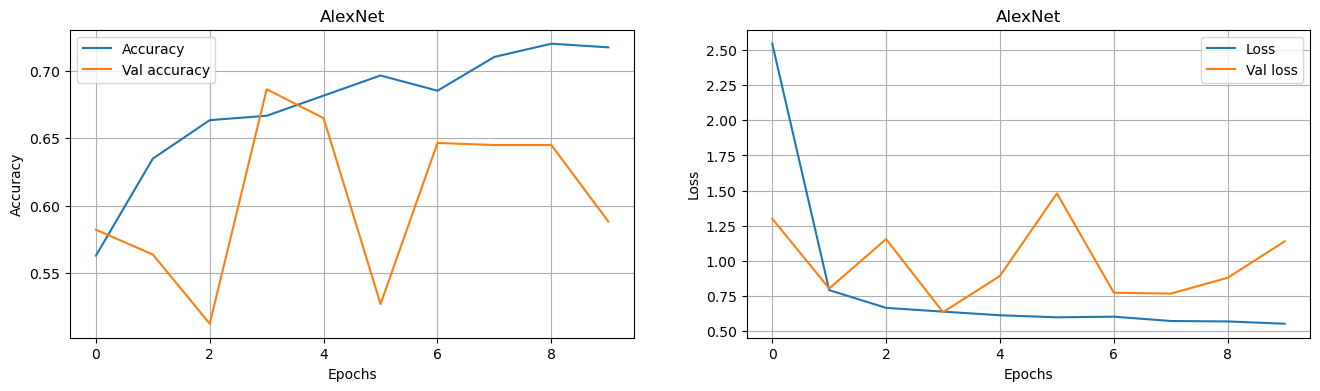

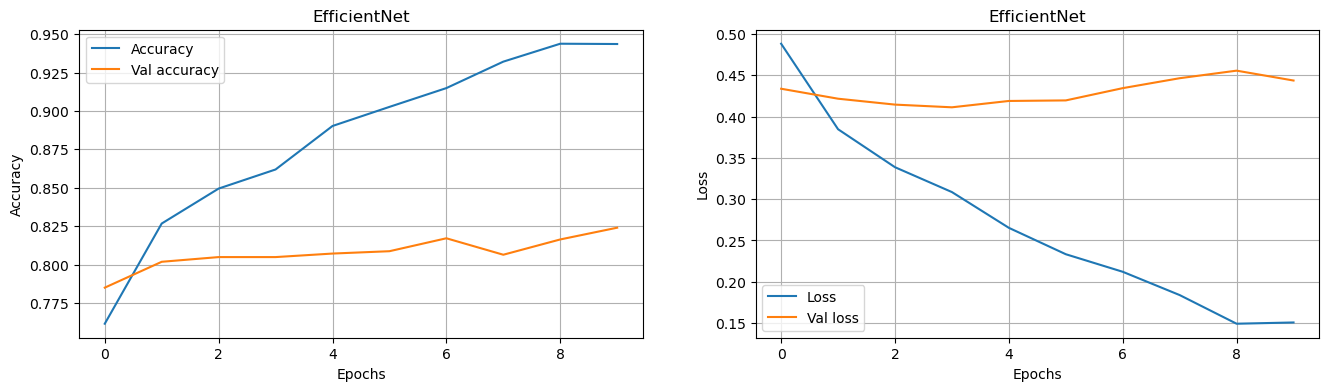

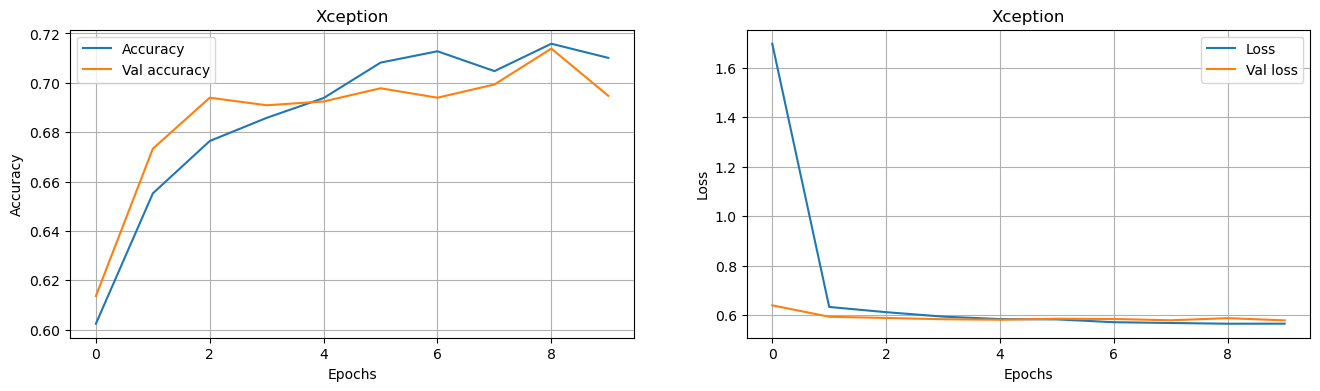

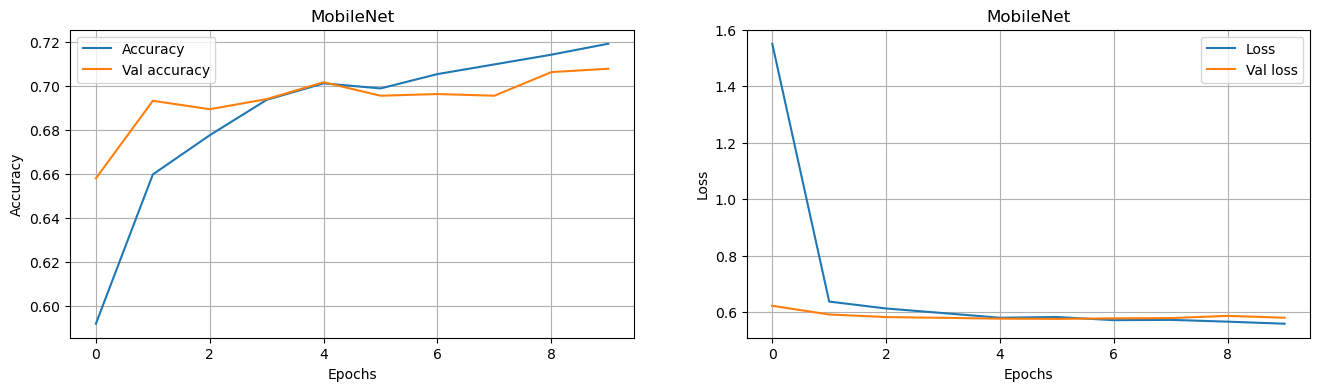

In [59]:
import matplotlib.pyplot as plt

models = [alex_hist,effnet_hist,xcept_hist,mob_hist]
model_name = ['AlexNet','EfficientNet','Xception','MobileNet']

for i,model in enumerate(models):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.plot(model.history['accuracy'],label='Accuracy')
    plt.plot(model.history['val_accuracy'],label='Val accuracy')
    plt.title(f"{model_name[i]}")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(model.history['loss'],label='Loss')
    plt.plot(model.history['val_loss'],label='Val loss')
    plt.title(f"{model_name[i]}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.savefig(f'plots/{model_name[i]}.png')
    plt.show()

In [52]:
print(f'AlexNet Training Time \t\t: {alexnet_time/60:.2f} Minutes')
print(f'EfficientNet Training Time \t: {effnet_time/60:.2f} Minutes')
print(f'XceptionNet Training Time \t: {xcept_time/60:.2f} Minutes')
print(f'MobileNet Training Time \t: {mob_dur/60:.2f} Minutes')

AlexNet Training Time 		: 9.82 Minutes
EfficientNet Training Time 	: 9.87 Minutes
XceptionNet Training Time 	: 9.89 Minutes
MobileNet Training Time 	: 9.97 Minutes
